## 0.1. Imports


# STEP 0

In [132]:
import os
import numpy                    as np
import pandas                   as pd
import seaborn                  as sns
import matplotlib.pyplot        as plt
from datetime                  import datetime

## 0.2. Funções de apoio

In [133]:
# ===================================================================
# Configura o notebook
def jupyter_settings():
    import warnings
    warnings.filterwarnings('ignore')
    %matplotlib inline

    # Tamanho e estilo dos gráficos
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [22, 9]
    plt.rcParams['font.size'] = 21

    # Configuração de exibição das linhas e colunas do pandas
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)

    # configuração do pandas para quantidade de casas decimais
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

    sns.set()

jupyter_settings()

# Imprime n gráficos do tipo boxplot lado a lado
def exibe_boxplot(data, col):
    indice = 1
    for coluna in data.columns:
        plt.subplot(1, col, indice)
        sns.boxplot(data[coluna]).set(title=coluna)
        indice += 1


# Imprime n gráficos do tipo countplot lado a lado
def exibe_countplot(data, col):
    indice = 1
    for coluna in data.columns:
        plt.subplot(1, col, indice)
        plt.xticks(rotation=90)
        sns.countplot(data=data, x=data[coluna]).set(title=coluna,  ylabel='Contagem', xlabel=None)
        indice += 1


def plota_ausentes(data, title, x_title, perc_minimo=0):
    """
    Plota uma tabela com a contagem de valores ausentes por coluna e um gráfico de
    barras com o percentual de ausentes por colunas caso existam dados ausentes,
    caso não, imprime o resultado de isna().sum()
    Params
    data: dataframe com os dados a serem plotados
    title: título do gráfico
    x_title: título do eixo x
    perc_minimo: percentual mínimo a ser plotado no gráfico
    """

    # Pega as colunas com dados ausentes
    colunas_com_nan = [col for col in data if data[col].isna().sum() > perc_minimo]

    # Plot do gráfico de barras com o percentual
    if len(colunas_com_nan) > 0:    # Se tiver colunas com dados faltantes
        ax = (  # Grafico                              
            data[colunas_com_nan]   # Dataframe a ser plotado no gráfico
            .isna() # Pegar valores faltantes
            .mean() # Pegar a média dos valores faltantes
            .sort_values(ascending=True)    # Ordenar os dados 
            .mul(100)   # multiplicar a média por 100 (percentual)
            .round(1)   # Arredondar as casas decimais para 1
            .plot(kind="barh")  # Tipo do gráfico (barras horizontais)
        )
        _ = ax.set_xlabel(x_title)  # Título do eixo x
        _ = ax.set_title(title) # Título do gráfico
        _ = ax.bar_label(ax.containers[0])  # Mostrar valores sobre as barras

        # Tabela da contagems dos dados faltantes
        print("Contagem de faltantes")
        print(data[colunas_com_nan].isna().sum().sort_values(ascending=True))
    else:   # Caso não exista dados faltantes imprime uma lista das colunas
        print('Contagem de faltantes')
        print(data.isna().sum())


def carrega_dados(caminho):
    lista_arquivos = os.listdir(caminho)
    lista_arquivos = [arquivo for arquivo in lista_arquivos if arquivo.endswith(".csv")]
    df_list = []

    for arquivo in lista_arquivos:
        caminho_arquivo = os.path.join(caminho, arquivo)
        # Tentar diferentes encodings
        try:
            df_temp = pd.read_csv(caminho_arquivo, sep=',', encoding='utf-8', parse_dates=['Data Accesso', 'Data Fine Contatto', 'Data Nascita'], dayfirst=True )
        except UnicodeDecodeError:
            try:
                df_temp = pd.read_csv(caminho_arquivo, sep=',', encoding='latin-1', parse_dates=['Data Accesso', 'Data Fine Contatto', 'Data Nascita'], dayfirst=True )
            except UnicodeDecodeError:
                df_temp = pd.read_csv(caminho_arquivo, sep=',', encoding='iso-8859-1', parse_dates=['Data Accesso', 'Data Fine Contatto', 'Data Nascita'], dayfirst=True )
        df_list.append(df_temp)

    df = pd.concat(df_list, ignore_index=True)
    df_unicos = df.drop_duplicates(keep='first')

    return df_unicos


## 0.3. Carregando os dados

In [134]:
tudo = "../dados/csv"
a2022 = "../dados/csv/2022"
a2023 = "../dados/csv/2023"
a2024 = "../dados/csv/2024"
        
ano_2022_raw = carrega_dados(a2022)
ano_2023_raw = carrega_dados(a2023)
ano_2024_raw = carrega_dados(a2024)

df_raw = pd.concat([ano_2022_raw, ano_2023_raw, ano_2024_raw], ignore_index=True)

# 1 - Entendimento dos dados


In [135]:
ano_2022 = ano_2022_raw.copy()
ano_2023 = ano_2023_raw.copy()
ano_2024 = ano_2024_raw.copy()
df = df_raw.copy()

In [136]:
df.head(3)

,Urgenza,Data Accesso,Data Fine Contatto,Struttura,Paziente,Modalità Dimissione,Problema Principale,Numero Scheda PS,Medico Dimettente,Struttura di Ricovero/Trasferimento,Et&agrave;,Fast Track,Operatore Triagista,Sessione Ticket,Data Nascita
0,3,2022-01-01,2022-01-01,DEA - PRONTO SOCCORSO P.O. CHIARI,MARINO FRANCESCO,Dimissione a domicilio,Febbre,2022000001,MARINI MARIA ELENA,NaN,43.00,NaN,CRESCINI SONIA,803877.00,1982-11-19
1,2,2022-01-01,2022-01-01,DEA - PRONTO SOCCORSO P.O. CHIARI,BRIOLA THOMAS,Dimissione a domicilio,Autolesionismo,2022000002,MARINI MARIA ELENA,NaN,47.00,NaN,MACALUSO LIBORIO FABIO,804837.00,1978-05-11
2,2,2022-01-01,2022-01-01,DEA - PRONTO SOCCORSO P.O. CHIARI,POMA LORENZO,Ricoverato,Dolore toracico,2022000003,POLONI ALBERTO,CARDIOLOGIA\rPRESIDIO OSPEDALIERO CHIARI,75.00,NaN,MACALUSO LIBORIO FABIO,803945.00,1950-09-29


## 1.1. Renomear as colunas

In [137]:
df.columns

Index(['Urgenza', 'Data Accesso', 'Data Fine Contatto', 'Struttura',
       'Paziente', 'Modalità Dimissione', 'Problema Principale',
       'Numero Scheda PS', 'Medico Dimettente',
       'Struttura di Ricovero/Trasferimento', 'Et&agrave;', 'Fast Track',
       'Operatore Triagista', 'Sessione Ticket', 'Data Nascita'],
      dtype='object')

## 1.2. Volumetria dos dados

In [138]:
# Conferindo a volumetria
print(f"Quantidade de colunas:  {df.shape[1]}")
print(f"Quantidade de linhas:   {df.shape[0]}")
print(f"Cartões PS únicos:      {df['Numero Scheda PS'].nunique()}")
print(f"Quantidade de pazientes:{df['Paziente'].nunique()}")
print(f"Diferença pacientes por atendimento: {df.shape[0] - df['Numero Scheda PS'].nunique()}")

Quantidade de colunas:  15
Quantidade de linhas:   160011
Cartões PS únicos:      159815
Quantidade de pazientes:82136
Diferença pacientes por atendimento: 196


## 1.3. Tipos dos dados

In [139]:
df.dtypes

Urgenza                                         int64
Data Accesso                           datetime64[ns]
Data Fine Contatto                     datetime64[ns]
Struttura                                      object
Paziente                                       object
Modalità Dimissione                            object
Problema Principale                            object
Numero Scheda PS                                int64
Medico Dimettente                              object
Struttura di Ricovero/Trasferimento            object
Et&agrave;                                    float64
Fast Track                                    float64
Operatore Triagista                            object
Sessione Ticket                               float64
Data Nascita                           datetime64[ns]
dtype: object

## 1.4. alterando o tipo dos dados

In [140]:
df['Sessione Ticket'] = df['Sessione Ticket'].astype('Int64')
df['Numero Scheda PS'] = df['Numero Scheda PS'].astype('str') 
# df['Data Accesso'] = pd.to_datetime(df['Data Accesso'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
# df['Data Fine Contatto'] = pd.to_datetime(df['Data Fine Contatto'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
# df['Data Nascita'] = pd.to_datetime(df['Data Nascita'], format='%d/%m/%Y %H:%M:%S', errors='coerce')


## 1.5. Verificando dados faltantes


Contagem de faltantes
Et&agrave;                                  1
Data Nascita                                1
Problema Principale                         6
Sessione Ticket                          3955
Struttura di Ricovero/Trasferimento    142101
Fast Track                             160011
dtype: int64


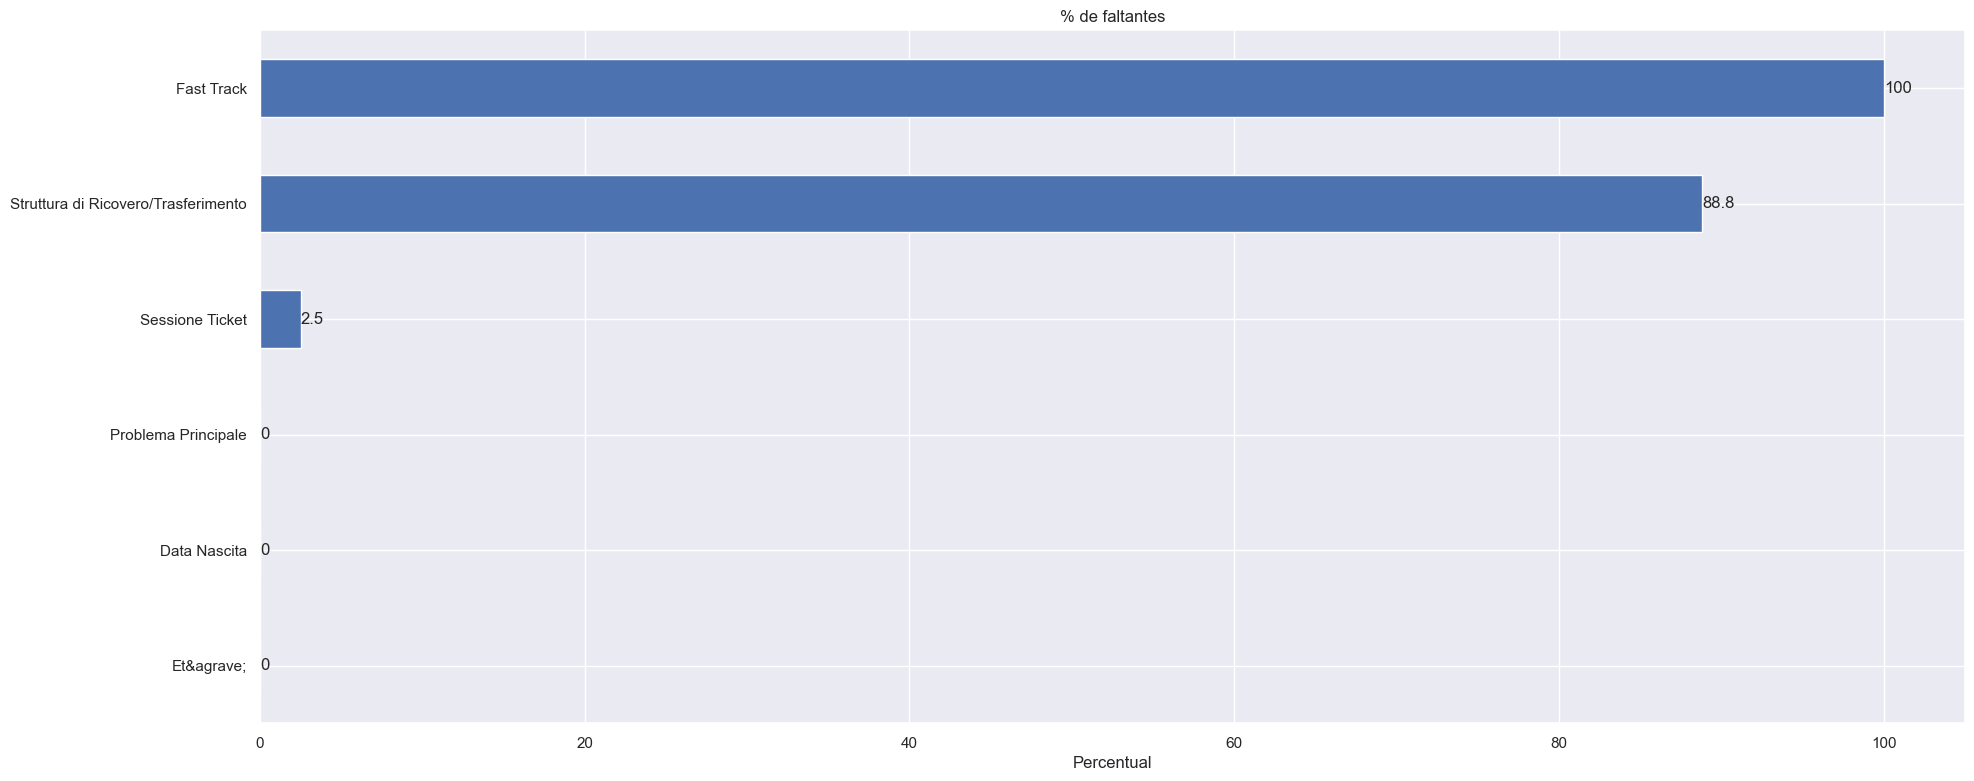

In [141]:
plota_ausentes(df, '% de faltantes', 'Percentual')

In [142]:
df.drop(
    columns=[
        "Fast Track",
        "Struttura",
        "Struttura di Ricovero/Trasferimento",
        "Sessione Ticket",
    ],
    inplace=True,
)

df.dropna(inplace=True)

In [143]:
plota_ausentes(df, '% de faltantes', 'Percentual')

Contagem de faltantes
Urgenza                0
Data Accesso           0
Data Fine Contatto     0
Paziente               0
Modalità Dimissione    0
Problema Principale    0
Numero Scheda PS       0
Medico Dimettente      0
Et&agrave;             0
Operatore Triagista    0
Data Nascita           0
dtype: int64


## 1.7. Estatística Descritiva


In [144]:
# Separando os atributos entre numéricos e categóricos
numericos = df.select_dtypes(exclude=['object'])

categoricos = df.select_dtypes(include=['object'])

### 1.7.1 Atributos Numéricos

In [145]:
numericos.describe().T

,count,mean,min,25%,50%,75%,max,std
Urgenza,160004.00,3.26,1.00,3.00,3.00,4.00,7.00,0.84
Data Accesso,160004,2023-07-16 01:20:43.678907392,2022-01-01 00:00:00,2022-10-24 00:00:00,2023-07-18 00:00:00,2024-04-12 00:00:00,2024-12-31 00:00:00,NaN
Data Fine Contatto,160004,2023-07-16 03:48:32.417189376,2022-01-01 00:00:00,2022-10-24 00:00:00,2023-07-18 00:00:00,2024-04-12 00:00:00,2025-01-01 00:00:00,NaN
Et&agrave;,160004.00,46.99,0.00,26.00,47.00,68.00,125.00,26.04
Data Nascita,160004,1978-05-30 11:41:42.747431328,1900-01-01 00:00:00,1956-11-28 00:00:00,1978-05-31 00:00:00,1999-08-14 00:00:00,2024-12-22 00:00:00,NaN


### 1.7.2 Atributos Categóricos

In [146]:
categoricos.apply(lambda x: x.unique().shape[0]).sort_values(ascending=False)

Numero Scheda PS       159808
Paziente                82135
Medico Dimettente          90
Operatore Triagista        88
Problema Principale        32
Modalità Dimissione        10
dtype: int64

## 1.8 Filtros

### 1.8.1. Filtros de alteração

### 1.8.2. Filtros de exclusão

In [199]:
def subcategoria(dframe):
    # Criar uma coluna chamada 'Sottogruppo Pazienti' com os seguintes subgrupos:
    # < 4 atendimentos (Common user),
    # 4–5 atendimentos (Frequent User),
    # 6–9 atendimentos (High user),
    # ≥10 atendimentos (Heavy users)

    # Primeiro, contar quantos atendimentos cada Paziente teve
    contagem_por_paciente = df.groupby("Paziente").size()

    # Criar um dicionário mapeando cada Paziente para sua categoria
    def categoriza_paciente(quantidade):
        if quantidade < 4:
            return "Common user"
        elif quantidade <= 5:
            return "Frequent User"
        elif quantidade <= 9:
            return "High User"
        else:
            return "Heavy User"

    # Mapear cada paciente para sua categoria
    mapa_categorias = contagem_por_paciente.apply(categoriza_paciente)
    dframe["Sottogruppo Pazienti"] = dframe["Paziente"].map(mapa_categorias)

    return dframe

def filtra_pacientes(dataframe):
    # Excluir pacientes com data de nascimento inválida
    dataframe = dataframe[dataframe["Data Nascita"] >= pd.Timestamp("1900-01-03")]

    # Calcular a idade com base na data Data Accesso e Data Nascita
    dataframe["Età"] = dataframe.apply(
        lambda row: (int((row["Data Accesso"] - row["Data Nascita"]).days / 365.25)),
        axis=1,
    )

    # Excluir pacientes com nomes específicos
    exclusão_nome = [
        "KAUR AMANDEEP",
        "KAUR HARPREET",
        "EL YAQOUTI MAJDA",
        "KAUR MANDEEP",
        "GUGA INDRIT",
        "SINGH SUKHWINDER",
        "BAHYOUNE ABDERRAHIM",
        "CITTASISS CENTO",
        "SABRI AHMED",
        "MUHAMMAD ZAHOOR",
        "KAUR MANPREET",
        "KAUR SANDEEP",
        "SINGH KARTAR",
        "SINGH TARSEM",
        "CITTASISS SEICENTOVENTI",
        "PROVA RICOVERODUE",
        "DISHA FIKE",
        "SINGH AMANDEEP",
        "KAUR BALJIT",
        "KAUR PARAMJIT",
        "KAUR MANDEEP",
        "KAUR AMANDEEP",
        "SINGH KARTAR",
        "SINGH TARSEM",
    ]
    dataframe = dataframe[~dataframe["Paziente"].isin(exclusão_nome)]
    
    # Excluir pacientes com modalidades de alta específicas
    exclusão_modalidade = [
        "Il paziente abbandona il PS prima della visita medica",
        "Sintomi o disturbi ostetrico-ginecologici",
        "Sintomi o disturbi ostetrico-ginecologici",
        "Inserito per errore",
    ]

    dataframe = dataframe[~dataframe["Modalità Dimissione"].isin(exclusão_modalidade)]
    dataframe = dataframe[~dataframe["Problema Principale"].isin(exclusão_modalidade)]

    # Categorizando Urgenza
    urgenza = {
        1: "Rosso",
        2: "Arancione",
        3: "Verde",
        4: "Bianco",       
    }
    dataframe["Categoria Urgenza"] = dataframe["Urgenza"].map(urgenza)
    
    # Filtrar pacientes maiores que 14 anos
    dataframe = dataframe[dataframe["Età"] > 14]

    # Excluir cartões PS repetidos
    dataframe = dataframe.drop_duplicates(subset=["Numero Scheda PS"], keep='first')
    
    return dataframe


def aplica_filtros(dataframe):
    aux = subcategoria(dataframe)
    aux = filtra_pacientes(aux)
    return aux


# Adicionar a coluna no dataframe original
df = aplica_filtros(df)
ano_2022 = aplica_filtros(ano_2022)
ano_2023 = aplica_filtros(ano_2023)
ano_2024 = aplica_filtros(ano_2024)

In [200]:
df.head(3)

,Urgenza,Data Accesso,Data Fine Contatto,Paziente,Modalità Dimissione,Problema Principale,Numero Scheda PS,Medico Dimettente,Et&agrave;,Operatore Triagista,Data Nascita,Sottogruppo Pazienti,Idade,Categoria Urgenza,Dia_Semana,settimana,Mes_Ano,Mes_Ano_It,Faixa_Etaria,Età
0,3,2022-01-01,2022-01-01,MARINO FRANCESCO,Dimissione a domicilio,Febbre,2022000001,MARINI MARIA ELENA,43.00,CRESCINI SONIA,1982-11-19,Common user,39,Verde,Saturday,Sabato,2022-01,Gennaio/2022,15-44 anni,39
1,2,2022-01-01,2022-01-01,BRIOLA THOMAS,Dimissione a domicilio,Autolesionismo,2022000002,MARINI MARIA ELENA,47.00,MACALUSO LIBORIO FABIO,1978-05-11,Common user,43,Arancione,Saturday,Sabato,2022-01,Gennaio/2022,15-44 anni,43
2,2,2022-01-01,2022-01-01,POMA LORENZO,Ricoverato,Dolore toracico,2022000003,POLONI ALBERTO,75.00,MACALUSO LIBORIO FABIO,1950-09-29,Common user,71,Arancione,Saturday,Sabato,2022-01,Gennaio/2022,> 64 anni,71


In [201]:
# Verificar a distribuição das categorias criadas
print("Distribuição de ATENDIMENTOS por categoria:")
print(df["Sottogruppo Pazienti"].value_counts().sort_index())
print("\n" + "=" * 80)


print("Distribuição de PACIENTES ÚNICOS por categoria:")
pacientes_unicos_por_categoria = (
    df.groupby("Sottogruppo Pazienti")["Numero Scheda PS"].nunique().sort_index()
)
print(pacientes_unicos_por_categoria)
print("\n" + "=" * 80)
print(f"Total de pacientes únicos: {df['Numero Scheda PS'].nunique()}")
print(f"Total de atendimentos: {len(df)}")

Distribuição de ATENDIMENTOS por categoria:
Sottogruppo Pazienti
Common user      83361
Frequent User    18836
Heavy User        6474
High User        12726
Name: count, dtype: int64

Distribuição de PACIENTES ÚNICOS por categoria:
Sottogruppo Pazienti
Common user      83361
Frequent User    18836
Heavy User        6474
High User        12726
Name: Numero Scheda PS, dtype: int64

Total de pacientes únicos: 121397
Total de atendimentos: 121397


In [202]:
# Conferindo a volumetria
print("Números totais da base")
print(f"Atendimentos:           {df.shape[0]}")
print(f"Pazientes:              {df['Paziente'].nunique()}")
print(f"Cartões PS únicos:      {df['Numero Scheda PS'].nunique()}")
print(f"Cartões PS repetidos:   {df.shape[0] - df['Numero Scheda PS'].nunique()}")

Números totais da base
Atendimentos:           121397
Pazientes:              64576
Cartões PS únicos:      121397
Cartões PS repetidos:   0


Dados anteriores:

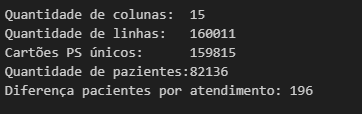

# 2 - Análise exploratória dos dados

## 2.1. Análise Univariada

### Verificando a variância das variáveis numéricas

## 2.2. Análise Bivariada

### Lista dos pacientes com mais atendimentos por período

,Ricorrenza
Paziente,
GUERRINI FRANCA,68
PERI GINA,66
BARESI NATALE,40
PRANDINI LAURA SIMONETTA,40
NICOLAE STRUGURICA,36
VILLA VIVIANA,36
NOCELLA CECILIA,33
MARCHETTI GIOVANNI,30
BONETTI MARIA DIOMIRA,30


<Figure size 1400x800 with 0 Axes>

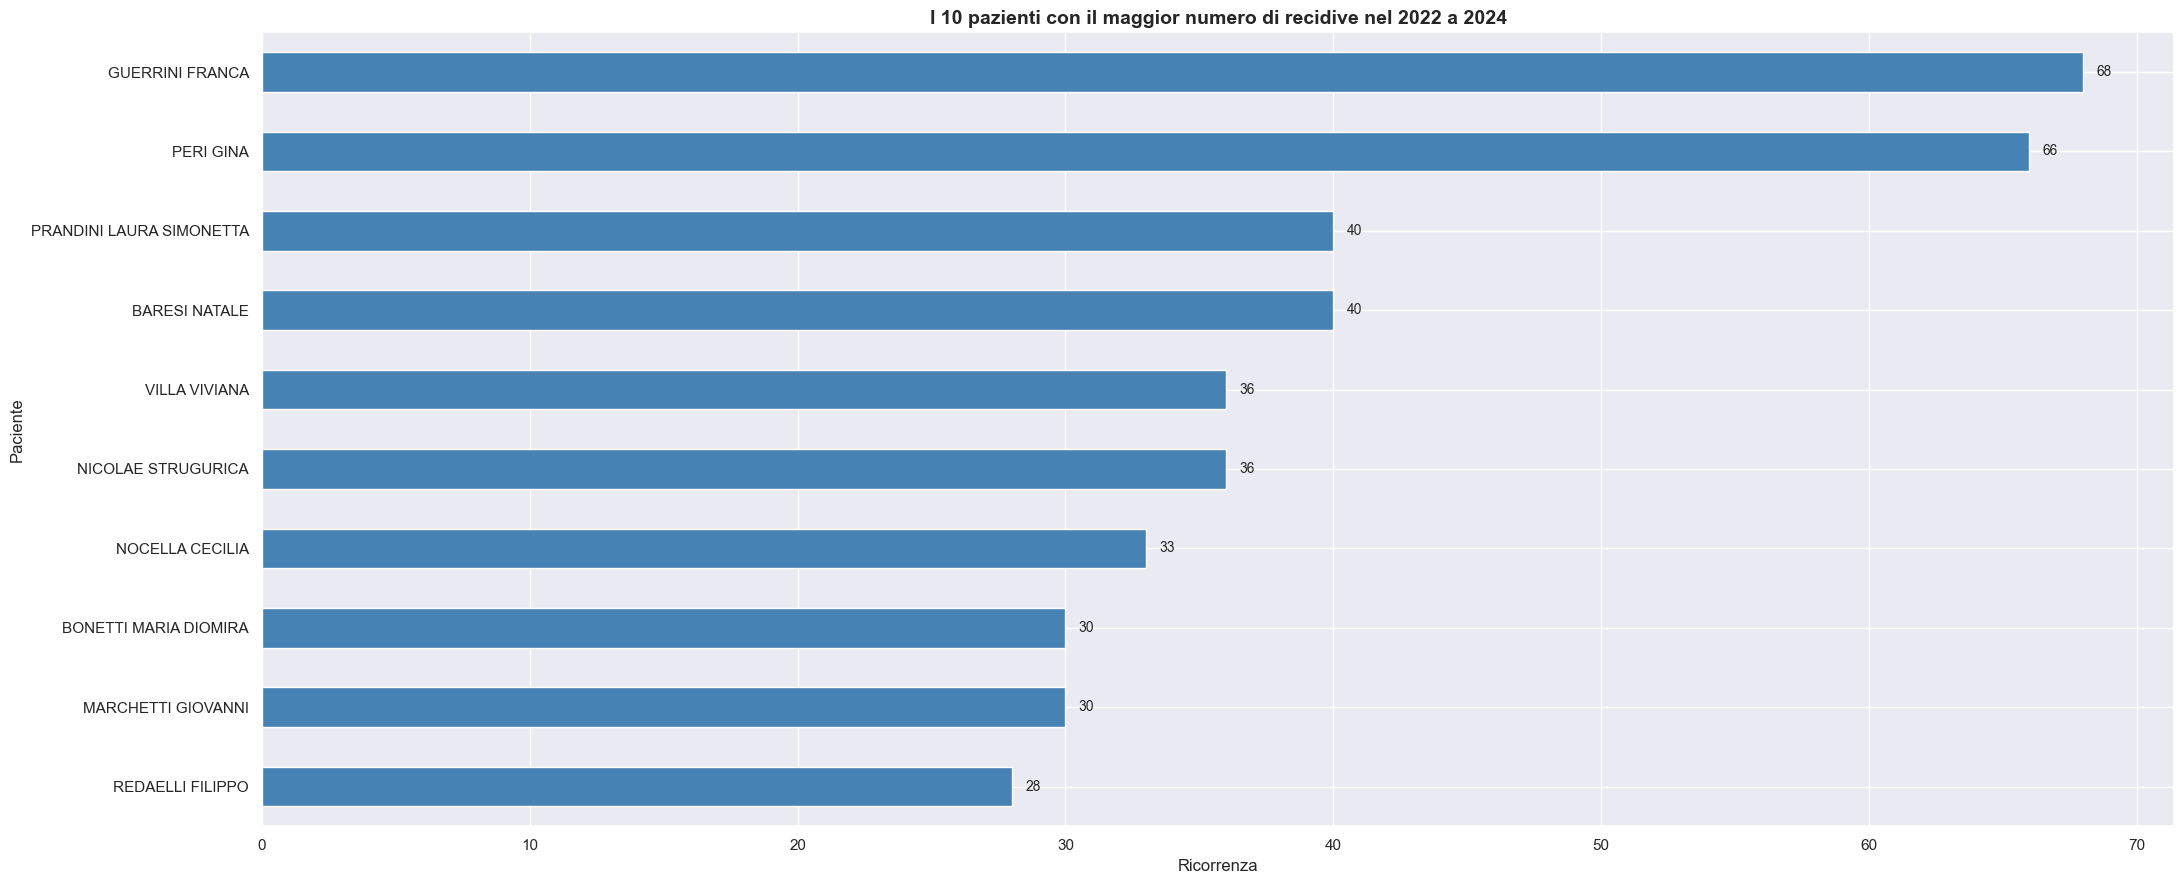

In [151]:
def agrupa(dataframe, top_n=10):
    # Quais os nomes dos 10 pacientes que mais comparecerem ao PS e quantas vezes?
    agrupado = dataframe[['Paziente', 'Numero Scheda PS']].groupby(['Paziente']).count().sort_values(by='Numero Scheda PS', ascending=False).head(top_n)
    agrupado.rename(columns={'Numero Scheda PS': 'Ricorrenza'}, inplace=True)
    
    display(agrupado)
    return agrupado

def gera_graficos_agrupados(dataframe, titulo_periodo, top_n=10):
    # Gráfico de barras - Top 10 pacientes com mais visitas ao PS
    plt.figure(figsize=(14, 8))
    ax = dataframe.sort_values(by='Ricorrenza', ascending=True).plot(kind='barh', legend=False, color='steelblue')
    ax.set_xlabel('Ricorrenza', fontsize=12)
    ax.set_ylabel('Paciente', fontsize=12)

    ax.set_title(f'I {top_n} pazienti con il maggior numero di recidive nel ' + titulo_periodo, fontsize=14, fontweight='bold')

    # Adicionar valores nas barras
    for i, v in enumerate(dataframe.sort_values(by='Ricorrenza', ascending=True)['Ricorrenza']):
        ax.text(v + 0.5, i, str(v), va='center', fontsize=10)

    plt.tight_layout()
    plt.show();

def plota_mais_frequentes(dataframe, titulo, top_n=10):
    agrupado = agrupa(dataframe, top_n)
    gera_graficos_agrupados(agrupado, titulo, top_n)

plota_mais_frequentes(df, '2022 a 2024', top_n=10)

In [197]:
# Quais os nomes dos 10 pacientes que mais comparecerem ao PS e quantas vezes?
agrupado = df[['Paziente', 'Numero Scheda PS']].groupby(['Paziente']).count().sort_values(by='Numero Scheda PS', ascending=False).head(20)
agrupado.rename(columns={'Numero Scheda PS': 'Ricorrenza'}, inplace=True)

periodo = "2022 a 2024"
agrupado

,Ricorrenza
Paziente,
GUERRINI FRANCA,68
PERI GINA,66
BARESI NATALE,40
PRANDINI LAURA SIMONETTA,40
NICOLAE STRUGURICA,36
VILLA VIVIANA,36
NOCELLA CECILIA,33
MARCHETTI GIOVANNI,30
BONETTI MARIA DIOMIRA,30


<Figure size 1400x800 with 0 Axes>

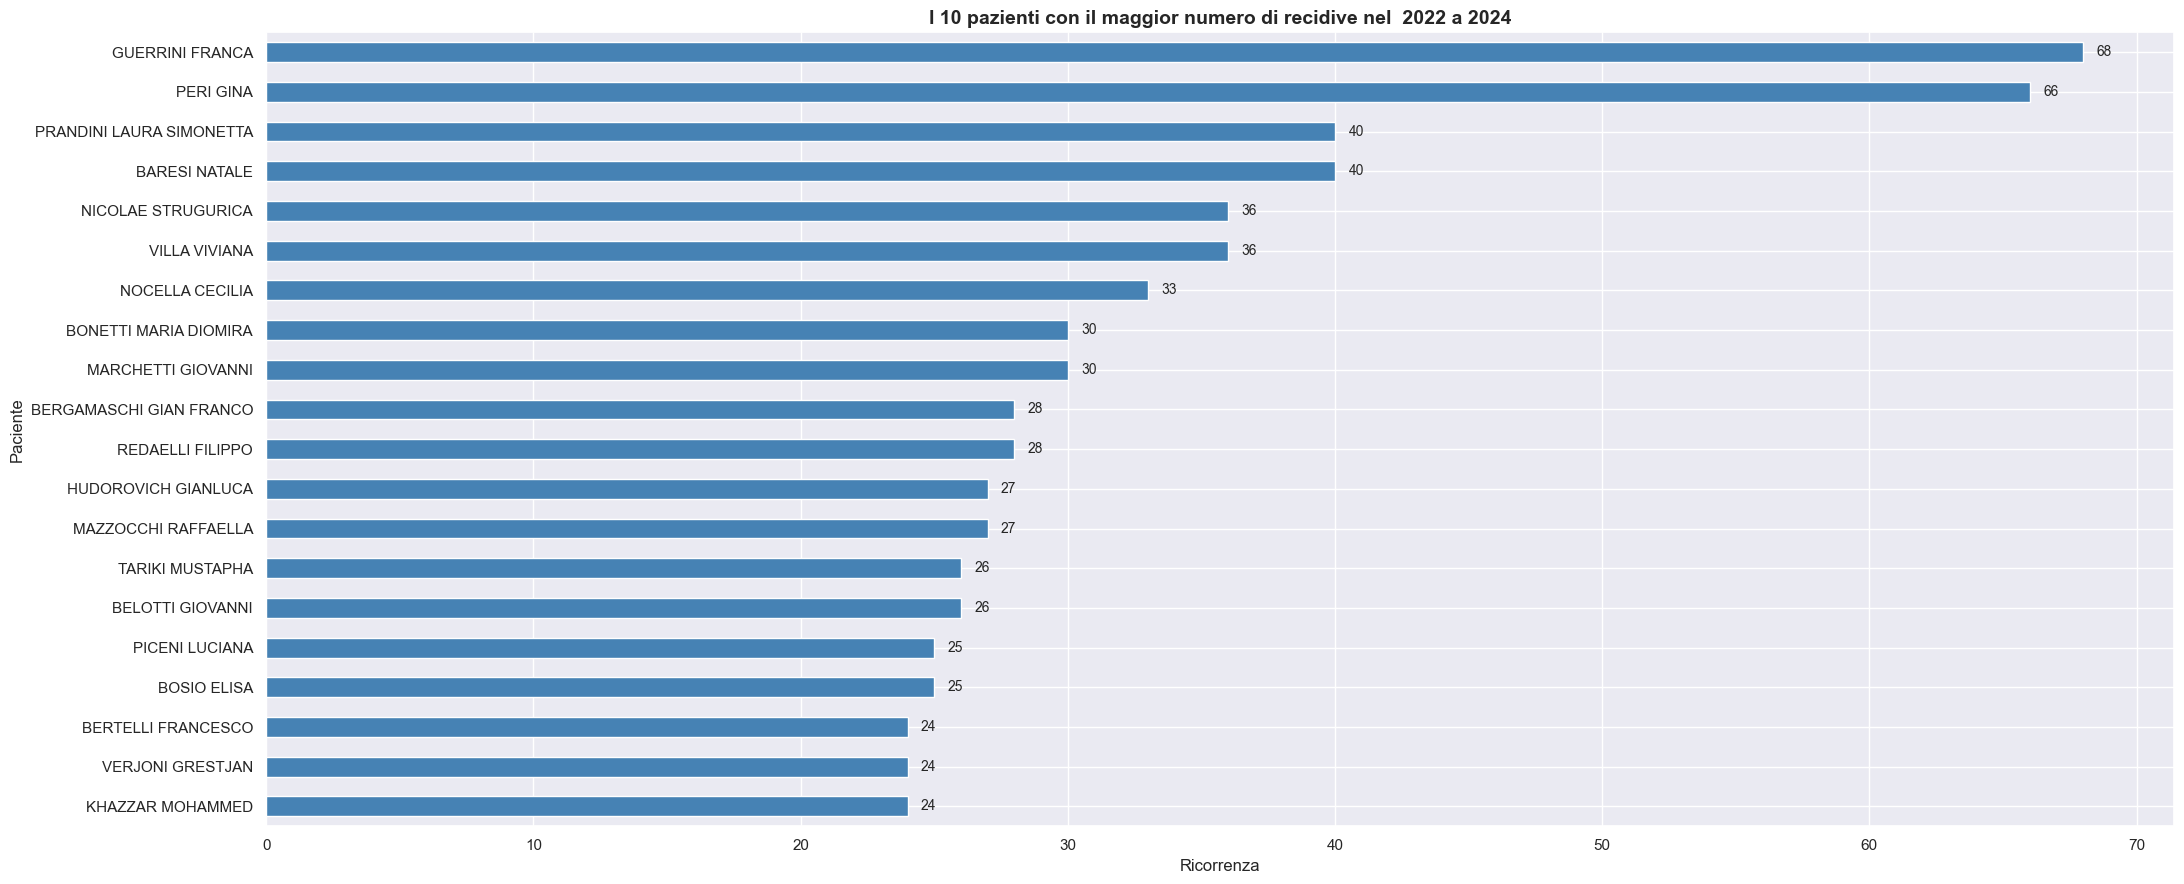

In [198]:
# Gráfico de barras - Top 10 pacientes com mais visitas ao PS
plt.figure(figsize=(14, 8))
ax = agrupado.sort_values(by='Ricorrenza', ascending=True).plot(kind='barh', legend=False, color='steelblue')
ax.set_xlabel('Ricorrenza', fontsize=12)
ax.set_ylabel('Paciente', fontsize=12)

ax.set_title('I 10 pazienti con il maggior numero di recidive nel  ' + periodo, fontsize=14, fontweight='bold')

# Adicionar valores nas barras
for i, v in enumerate(agrupado.sort_values(by='Ricorrenza', ascending=True)['Ricorrenza']):
    ax.text(v + 0.5, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show();

### Lista dos pacientes com mais atendimentos (nome e idade)

In [204]:
# Calcular a idade dos pacientes a partir da data de nascimento
from datetime import datetime

# Agrupar por paciente e contar visitas, mantendo a idade
pacientes_info = (
    df[['Paziente', 'Numero Scheda PS', 'Età']]
    .groupby(['Paziente', 'Età'])
    .count()
    .reset_index()
    .sort_values(by='Numero Scheda PS', ascending=False)
    .head(20)
)

# Renomear colunas para melhor visualização
pacientes_info.rename(
    columns={
        'Paziente': 'Paziente',
        'Numero Scheda PS': 'Ricorrenza',
        'Età': 'Età (anni)'
    }, 
    inplace=True
)

# Resetar o índice para exibição mais limpa
pacientes_info.reset_index(drop=True, inplace=True)
pacientes_info.index = pacientes_info.index + 1  # Começar índice em 1

print(f"Top 10 Pacientes com Mais Atendimentos no PS - {periodo}")
print("=" * 80)
pacientes_info

Top 10 Pacientes com Mais Atendimentos no PS - 2022 a 2024


,Paziente,Età (anni),Ricorrenza
1,GUERRINI FRANCA,75,35
2,PERI GINA,88,24
3,VERJONI GRESTJAN,35,23
4,NOCELLA CECILIA,59,22
5,PERI GINA,89,22
6,MAZZOCCHI RAFFAELLA,48,20
7,GUERRINI FRANCA,76,20
8,BERGAMASCHI GIAN FRANCO,70,19
9,BONETTI MARIA DIOMIRA,75,16
10,VILLA VIVIANA,43,16


### Análise de atendimentos por dia da semana

In [208]:
# Converter a coluna de data de entrada para datetime
df["Data Accesso"] = pd.to_datetime(df["Data Accesso"], errors="coerce")

# Criar coluna com o dia da semana
df["Dia_Semana"] = df["Data Accesso"].dt.day_name()

# Mapear os nomes em inglês para italiano
mapeamento_dias = {
    "Monday": "Lunedi",
    "Tuesday": "Martedi",
    "Wednesday": "Mercoledi",
    "Thursday": "Giovedi",
    "Friday": "Venerdi",
    "Saturday": "Sabato",
    "Sunday": "Domenica",
}
df["Settimana"] = df["Dia_Semana"].map(mapeamento_dias)

# Contar atendimentos por dia da semana
atendimentos_por_dia = df["Settimana"].value_counts()

# Ordenar pelos dias da semana
ordem_dias = [
    "Lunedi",
    "Martedi",
    "Mercoledi",
    "Giovedi",
    "Venerdi",
    "Sabato",
    "Domenica",
]
atendimentos_por_dia = atendimentos_por_dia.reindex(ordem_dias)

print(f"Distribuzione delle visite ospedaliere per giorno della settimana - {periodo}")
print("=" * 80)
atendimentos_por_dia

Distribuzione delle visite ospedaliere per giorno della settimana - 2022 a 2024


Settimana
Lunedi       19740
Martedi      18015
Mercoledi    17447
Giovedi      17406
Venerdi      17727
Sabato       15767
Domenica     15295
Name: count, dtype: int64

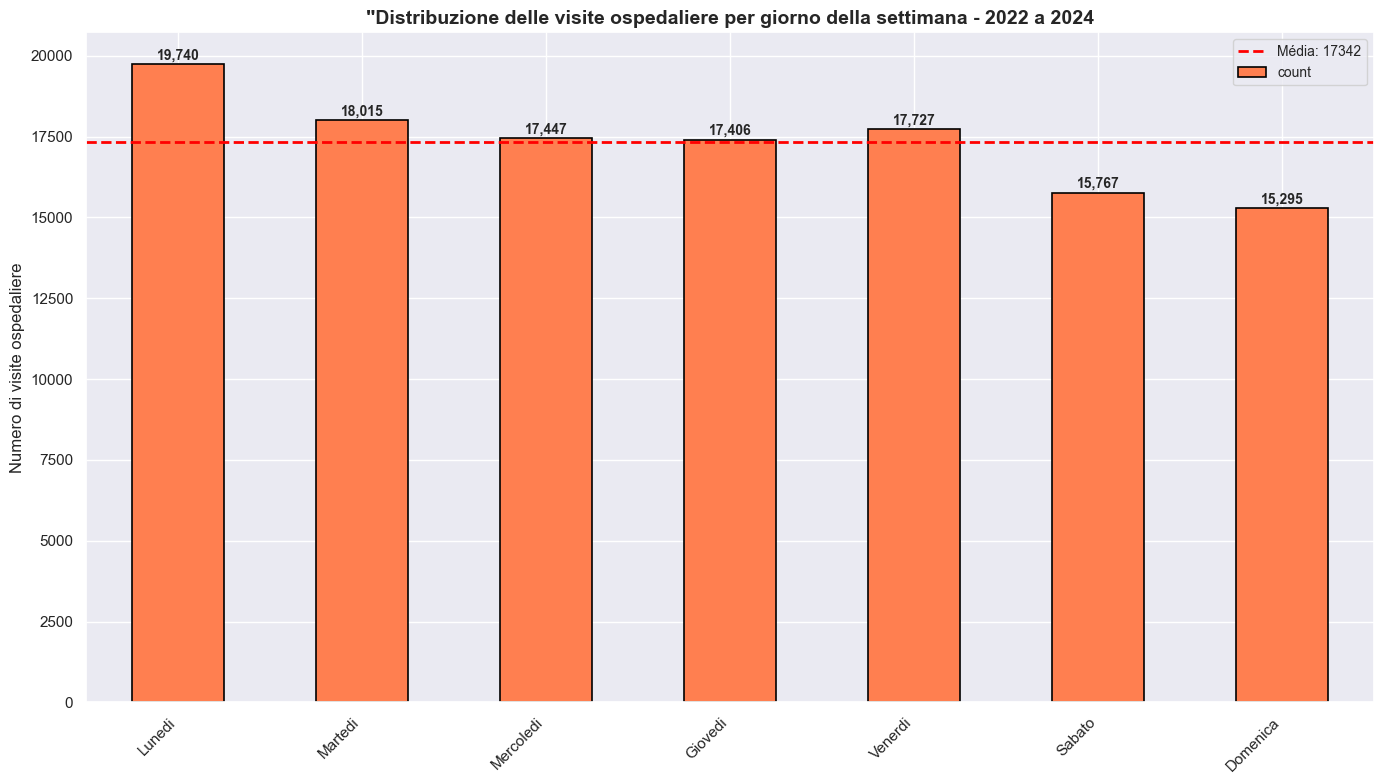

In [252]:
# Gráfico de barras - Atendimentos por dia da semana
plt.figure(figsize=(14, 8))
ax = atendimentos_por_dia.plot(kind='bar', color='coral', edgecolor='black', linewidth=1.2)
ax.set_xlabel(None)
ax.set_ylabel('Numero di visite ospedaliere', fontsize=12)
ax.set_title(f'"Distribuzione delle visite ospedaliere per giorno della settimana - {periodo}', 
             fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adicionar valores nas barras
for i, v in enumerate(atendimentos_por_dia):
    ax.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adicionar linha de média
media_atendimentos = atendimentos_por_dia.mean()
ax.axhline(y=media_atendimentos, color='red', linestyle='--', linewidth=2, 
           label=f'Média: {media_atendimentos:.0f}')
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

### Análise dos 10 principais problemas de saúde

In [ ]:
# Contar os principais problemas de saúde
principais_problemas = df['Problemi Principale'].value_counts().head(10)

print(f"I 10 principali problemi di salute - {periodo}")
print("=" * 80)
principais_problemas

I 10 principali problemi di salute - 2022 a 2024


Problema Principale
Altri sintomi o disturbi                    36305
Trauma                                      26796
Dolore addominale                           11483
Dolore toracico                              7308
Sintomi o disturbi urologici                 5997
Dispnea                                      5253
Febbre                                       4948
Altri sintomi sistema nervoso                4749
Sintomi o disturbi oculistici                4582
Sintomi o disturbi otorinolaringoiatrici     3379
Name: count, dtype: int64

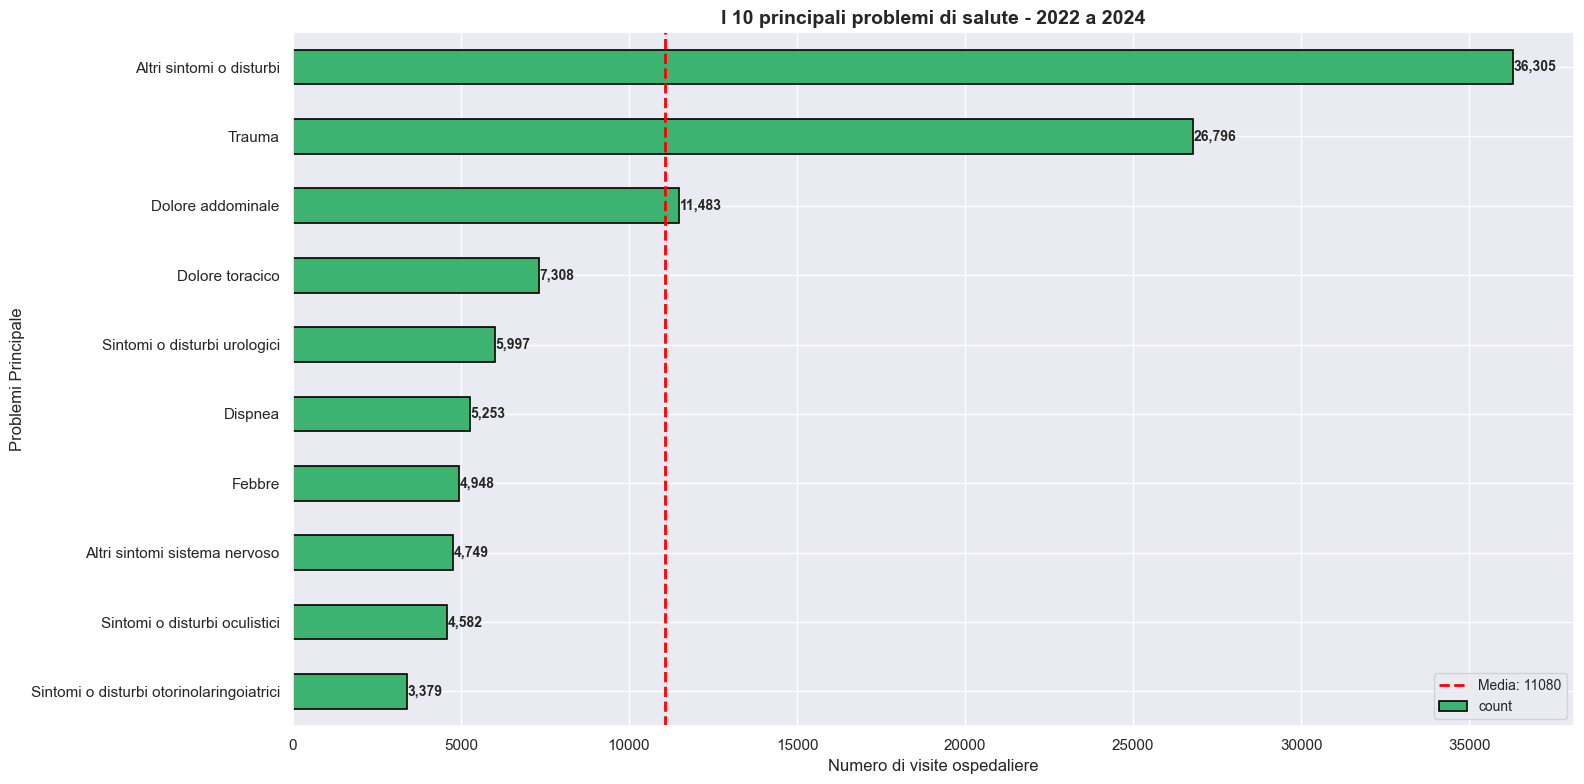

In [255]:
# Gráfico de barras - Top 10 principais problemas
plt.figure(figsize=(16, 8))
ax = principais_problemas.sort_values(ascending=True).plot(
    kind='barh', 
    color='mediumseagreen', 
    edgecolor='black', 
    linewidth=1.2
)
ax.set_xlabel('Numero di visite ospedaliere', fontsize=12)
ax.set_ylabel('Problemi Principale', fontsize=12)
ax.set_title(f'I 10 principali problemi di salute - {periodo}', 
             fontsize=14, fontweight='bold')

# Adicionar valores nas barras
for i, v in enumerate(principais_problemas.sort_values(ascending=True)):
    ax.text(v + 20, i, f'{v:,}', va='center', fontsize=10, fontweight='bold')

# Adicionar linha de média
media_problemas = principais_problemas.mean()
ax.axvline(x=media_problemas, color='red', linestyle='--', linewidth=2, 
           label=f'Media: {media_problemas:.0f}')
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

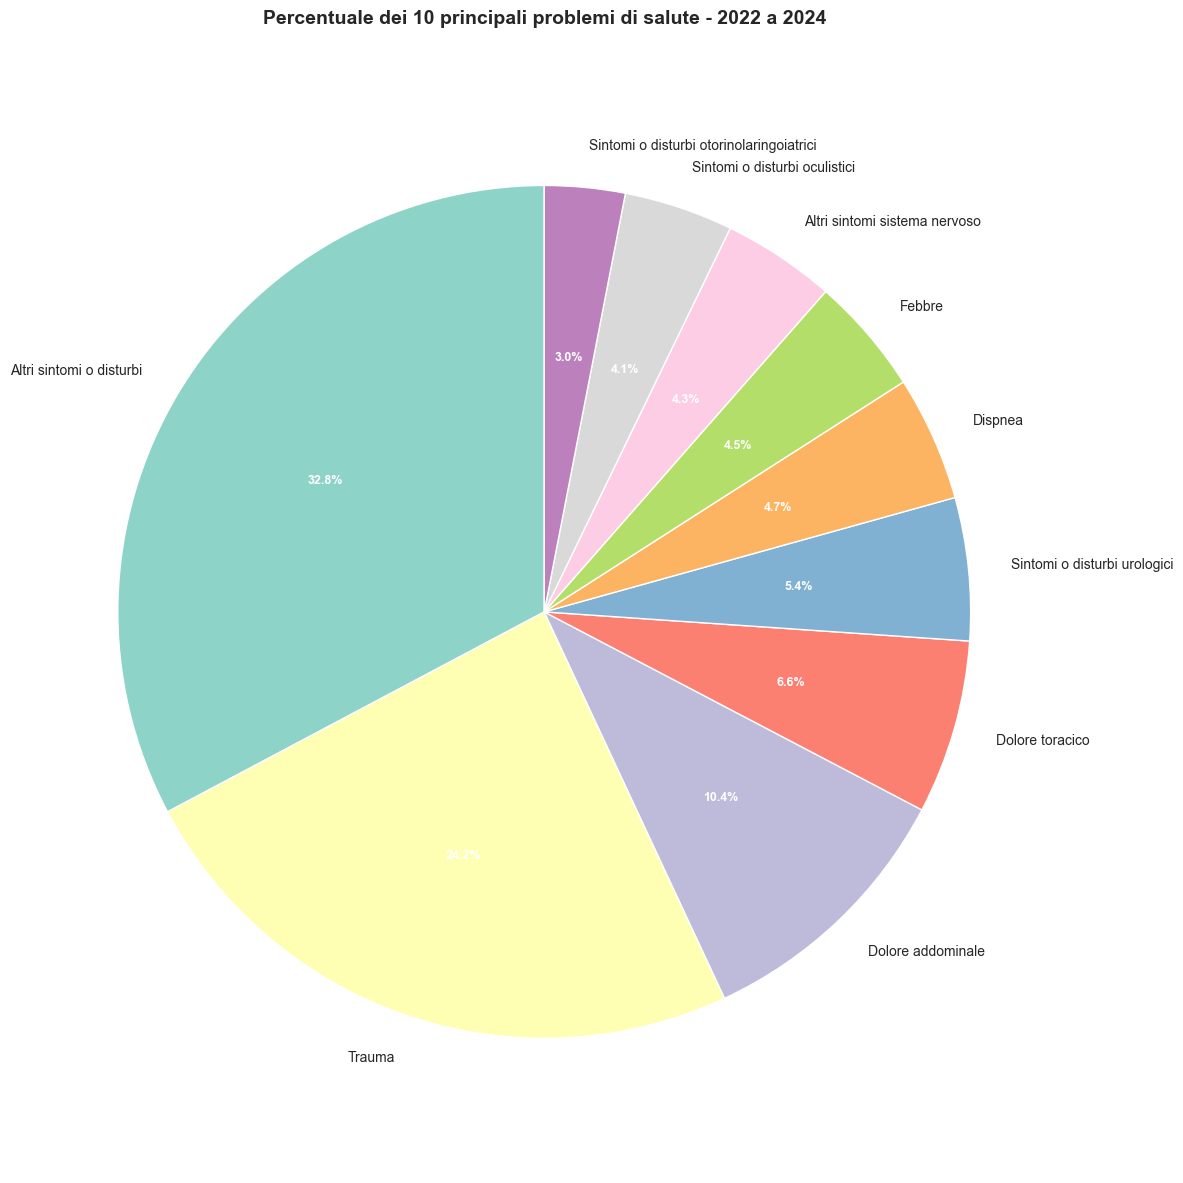

In [256]:
# Gráfico de pizza - Proporção dos 10 principais problemas
plt.figure(figsize=(12, 12))

# Criar o gráfico de pizza
colors = plt.cm.Set3(range(len(principais_problemas)))
wedges, texts, autotexts = plt.pie(
    principais_problemas, 
    labels=principais_problemas.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10}
)

# Melhorar a legibilidade dos percentuais
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

plt.title(f'Percentuale dei 10 principali problemi di salute - {periodo}', 
          fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Análise de atendimentos por mês

In [257]:
# Criar coluna com o mês e ano
df['Mese_anno'] = df['Data Accesso'].dt.to_period('M')

# Contar atendimentos por mês
atendimentos_por_mes = df['Mese_anno'].value_counts().sort_index()

# Converter o período de volta para string para melhor visualização
atendimentos_por_mes.index = atendimentos_por_mes.index.astype(str)

# Meses em italiano
mes_ano = {
    '2022-01': 'Gennaio/2022',
    '2022-02': 'Febbraio/2022',
    '2022-03': 'Marzo/2022',
    '2022-04': 'Aprile/2022',
    '2022-05': 'Maggio/2022',
    '2022-06': 'Giugno/2022',
    '2022-07': 'Luglio/2022',
    '2022-08': 'Agosto/2022',
    '2022-09': 'Settembre/2022',
    '2022-10': 'Ottobre/2022',
    '2022-11': 'Novembre/2022',
    '2022-12': 'Dicembre/2022',
    '2023-01': 'Gennaio/2023',
    '2023-02': 'Febbraio/2023',
    '2023-03': 'Marzo/2023',
    '2023-04': 'Aprile/2023',
    '2023-05': 'Maggio/2023',
    '2023-06': 'Giugno/2023',
    '2023-07': 'Luglio/2023',
    '2023-08': 'Agosto/2023',
    '2023-09': 'Settembre/2023',
    '2023-10': 'Ottobre/2023',
    '2023-11': 'Novembre/2023',
    '2023-12': 'Dicembre/2023',
    '2024-01': 'Gennaio/2024',
    '2024-02': 'Febbraio/2024',
    '2024-03': 'Marzo/2024',
    '2024-04': 'Aprile/2024',
    '2024-05': 'Maggio/2024',
    '2024-06': 'Giugno/2024',
    '2024-07': 'Luglio/2024',
    '2024-08': 'Agosto/2024',
    '2024-09': 'Settembre/2024',
    '2024-10': 'Ottobre/2024',
    '2024-11': 'Novembre/2024',
    '2024-12': 'Dicembre/2024',    
    }

df['Mese_anno_It'] = df['Mese_anno'].astype(str).map(mes_ano)
df.head()

print(f"Distribuzione delle visite ospedaliere per mese - {periodo}")
print("=" * 80)
atendimentos_por_mes.head(10)

Distribuzione delle visite ospedaliere per mese - 2022 a 2024


Mese_anno
2022-01    2768
2022-02    2721
2022-03    3231
2022-04    3278
2022-05    3499
2022-06    3446
2022-07    3407
2022-08    3133
2022-09    3289
2022-10    3435
Name: count, dtype: int64

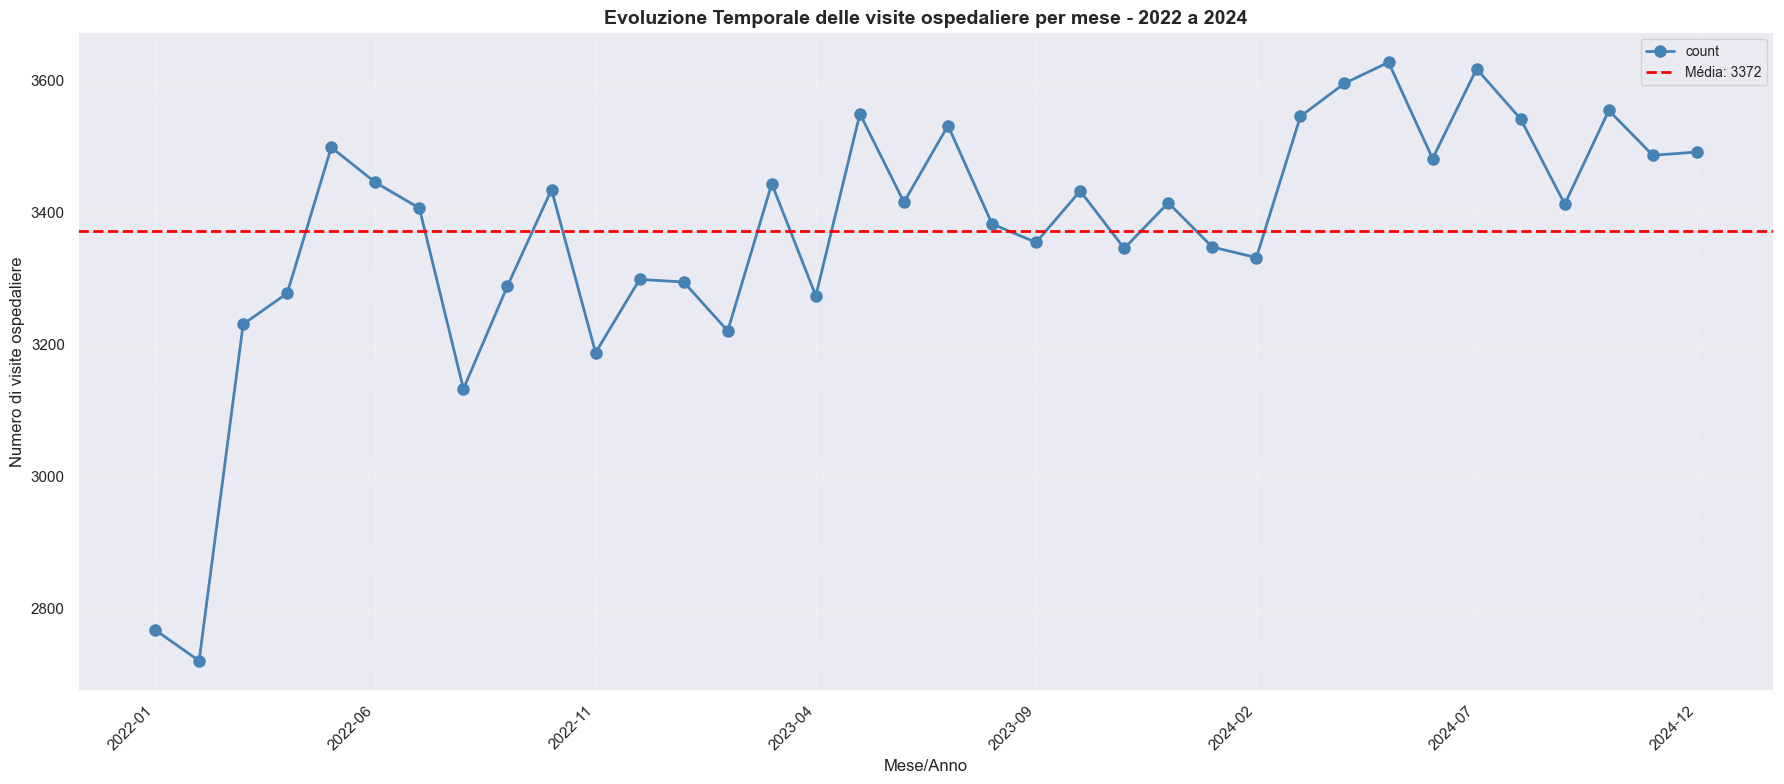

In [ ]:
# Gráfico de linha - Atendimentos por mês
plt.figure(figsize=(18, 8))
ax = atendimentos_por_mes.plot(kind='line', marker='o', linewidth=2, markersize=8, color='steelblue')
ax.set_xlabel('Mese/Anno', fontsize=12)
ax.set_ylabel('Numero di visite ospedaliere', fontsize=12)
ax.set_title(f'Evoluzione Temporale delle visite ospedaliere per mese - {periodo}', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')

# Rotacionar labels do eixo x
plt.xticks(rotation=45, ha='right')

# Adicionar linha de média
media_mensal = atendimentos_por_mes.mean()
ax.axhline(y=media_mensal, color='red', linestyle='--', linewidth=2, 
           label=f'Media: {media_mensal:.0f}')
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

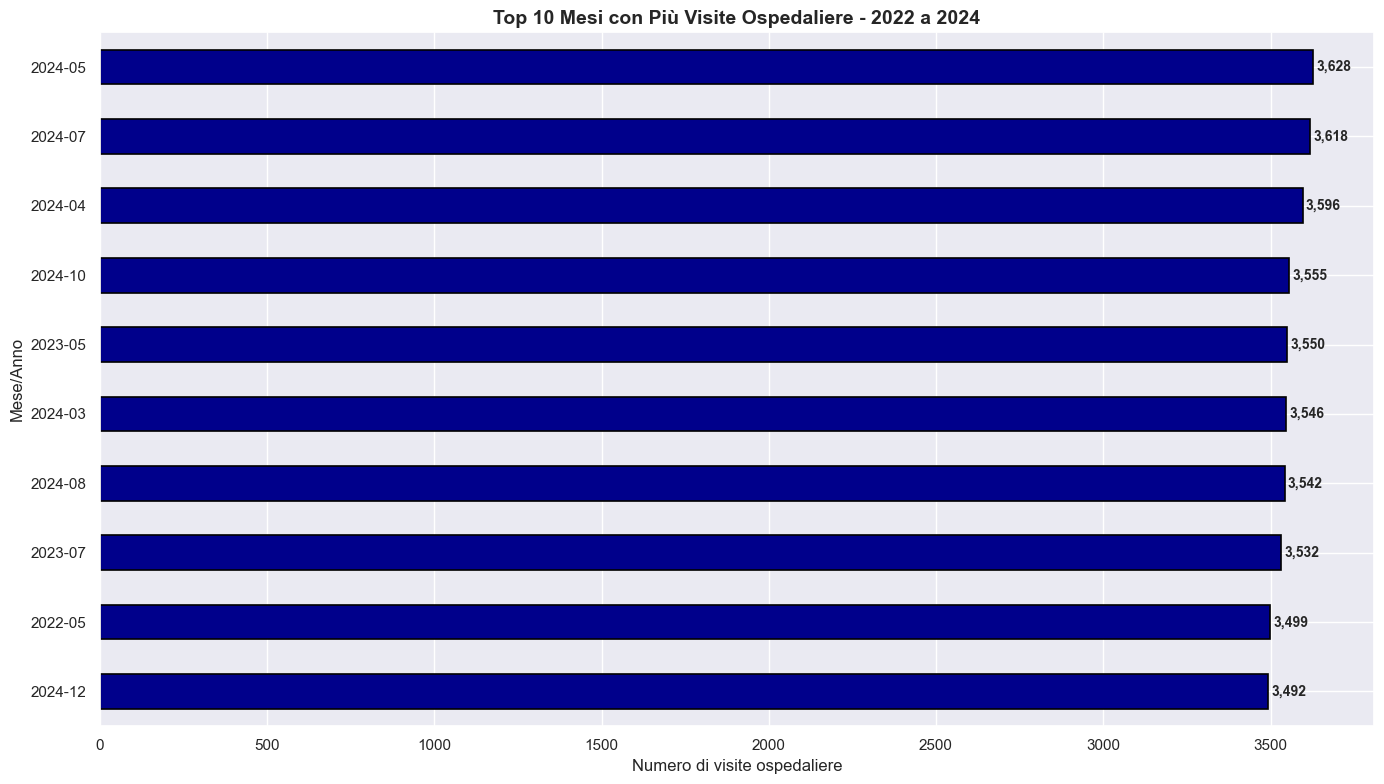

In [259]:
# Top 10 meses com mais atendimentos
top_10_meses = atendimentos_por_mes.nlargest(10)

# Gráfico de barras - Top 10 meses
plt.figure(figsize=(14, 8))
ax = top_10_meses.sort_values(ascending=True).plot(
    kind='barh', 
    color='darkblue', 
    edgecolor='black', 
    linewidth=1.2
)
ax.set_xlabel('Numero di visite ospedaliere', fontsize=12)
ax.set_ylabel('Mese/Anno', fontsize=12)
ax.set_title(f'Top 10 Mesi con Più Visite Ospedaliere - {periodo}', 
             fontsize=14, fontweight='bold')

# Adicionar valores nas barras
for i, v in enumerate(top_10_meses.sort_values(ascending=True)):
    ax.text(v + 10, i, f'{v:,}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### Análise de categorias de usuários (Sottogruppo Pazienti)

In [216]:
pacientes_unicos = df[['Paziente', 'Sottogruppo Pazienti']]
pacientes_unicos.drop_duplicates(inplace=True)
pacientes_unicos.shape

(64576, 2)

In [261]:
# Limpa o dataset para ficar apenas os pacientes únicos
pacientes_unicos = df[['Paziente', 'Sottogruppo Pazienti']]
pacientes_unicos.drop_duplicates(inplace=True)

# Contar pacientes por categoria de subgrupo
categorias_usuarios = pacientes_unicos['Sottogruppo Pazienti'].value_counts()

# Ordenar pelas categorias definidas
ordem_categorias = ['Common user', 'Frequent User', 'High User', 'Heavy User']
categorias_usuarios = categorias_usuarios.reindex(ordem_categorias)

# Calcular percentuais
percentuais = (categorias_usuarios / categorias_usuarios.sum() * 100).round(2)

print(f"Distribuzione dei pazienti per sottocategoria - {periodo}")
print("=" * 90)
print("\n📊 CONTEGGIO ASSOLUTO:")
print(categorias_usuarios)
print("\n📈 PERCENTUALE PER CATEGORIA:")
for cat, valor in percentuais.items():
    print(f"{cat:20s}: {valor:>6.2f}%")
print("\n" + "=" * 90)
print(f"TOTALE PAZIENTI: {categorias_usuarios.sum():,}")

Distribuzione dei pazienti per sottocategoria - 2022 a 2024

📊 CONTEGGIO ASSOLUTO:
Sottogruppo Pazienti
Common user      57912
Frequent User     4345
High User         1843
Heavy User         476
Name: count, dtype: int64

📈 PERCENTUALE PER CATEGORIA:
Common user         :  89.68%
Frequent User       :   6.73%
High User           :   2.85%
Heavy User          :   0.74%

TOTALE PAZIENTI: 64,576


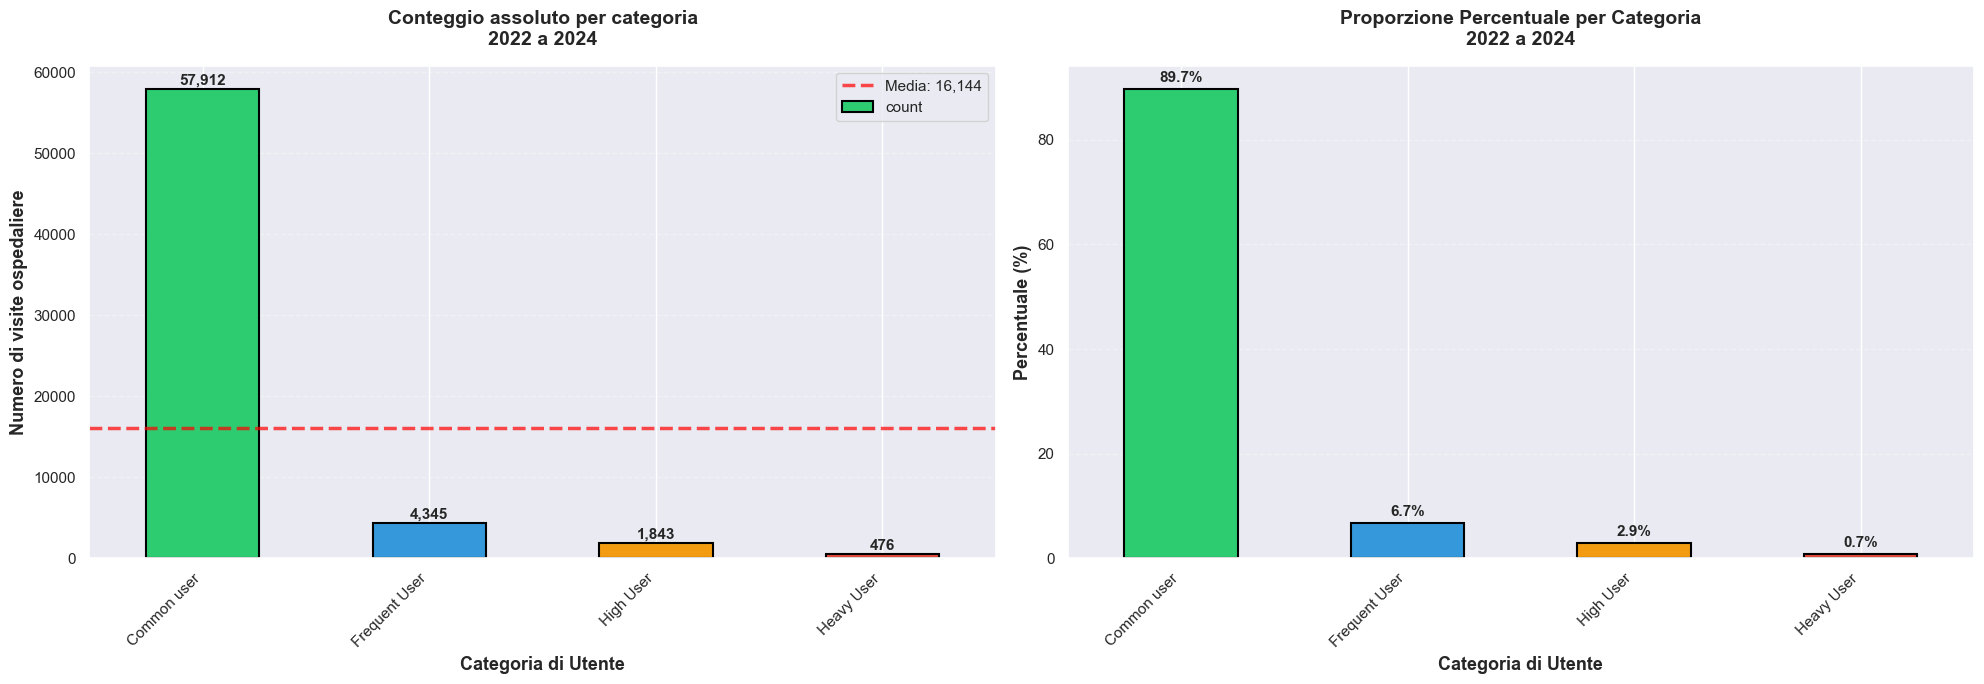

In [262]:
# Gráfico de barras comparativo - Contagem vs Percentual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Gráfico 1: Contagem absoluta
colors_gradient = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
categorias_usuarios.plot(kind='bar', color=colors_gradient, edgecolor='black', linewidth=1.5, ax=ax1)
ax1.set_xlabel('Categoria di Utente', fontsize=13, fontweight='bold')
ax1.set_ylabel('Numero di visite ospedaliere', fontsize=13, fontweight='bold')
ax1.set_title(f'Conteggio assoluto per categoria\n{periodo}', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=11)

# Adicionar valores nas barras
for i, v in enumerate(categorias_usuarios):
    ax1.text(i, v + 200, f'{v:,}', ha='center', va='bottom', 
             fontsize=11, fontweight='bold')

# Linha de média
media_cat = categorias_usuarios.mean()
ax1.axhline(y=media_cat, color='red', linestyle='--', linewidth=2.5, 
            label=f'Media: {media_cat:,.0f}', alpha=0.7)
ax1.legend(fontsize=11, loc='upper right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Gráfico 2: Percentual
percentuais.plot(kind='bar', color=colors_gradient, edgecolor='black', linewidth=1.5, ax=ax2)
ax2.set_xlabel('Categoria di Utente', fontsize=13, fontweight='bold')
ax2.set_ylabel('Percentuale (%)', fontsize=13, fontweight='bold')
ax2.set_title(f'Proporzione Percentuale per Categoria\n{periodo}', 
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=11)

# Adicionar valores nas barras
for i, v in enumerate(percentuais):
    ax2.text(i, v + 0.8, f'{v:.1f}%', ha='center', va='bottom', 
             fontsize=11, fontweight='bold')

ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

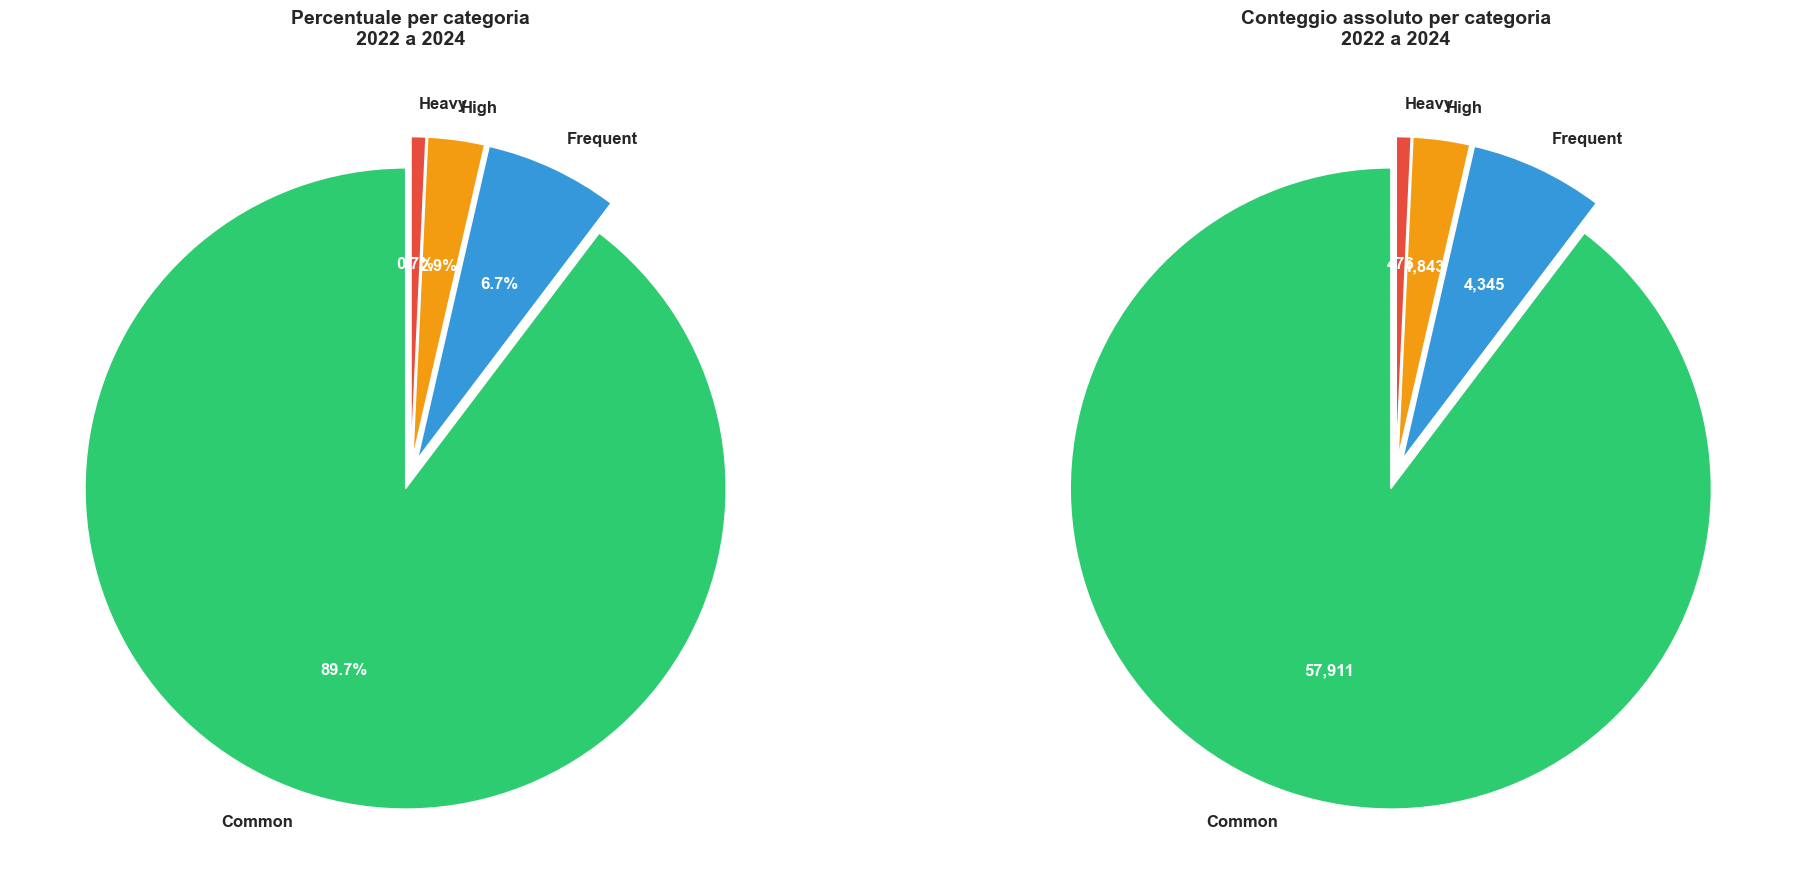

In [263]:
# Gráficos de pizza - Comparação visual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))

# Pizza 1: Percentuais
colors_pie = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
wedges, texts, autotexts = ax1.pie(
    categorias_usuarios,
    labels=['Common', 'Frequent', 'High', 'Heavy'], # TODO ALTERAÇÃO PARA NÃO TRUNCAR AS LABELS  - labels=ordem_subgrupos,
    # labels=categorias_usuarios.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_pie,
    textprops={'fontsize': 12, 'weight': 'bold'},
    explode=(0.05, 0.05, 0.05, 0.05)
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

ax1.set_title(f'Percentuale per categoria\n{periodo}', 
              fontsize=14, fontweight='bold', pad=20)

# Pizza 2: Valores absolutos
wedges2, texts2, autotexts2 = ax2.pie(
    categorias_usuarios, 
    labels=['Common', 'Frequent', 'High', 'Heavy'], # TODO ALTERAÇÃO PARA NÃO TRUNCAR AS LABELS  - labels=ordem_subgrupos,
    # labels=categorias_usuarios.index,
    autopct=lambda pct: f'{int(pct/100 * categorias_usuarios.sum()):,}',
    startangle=90,
    colors=colors_pie,
    textprops={'fontsize': 12, 'weight': 'bold'},
    explode=(0.05, 0.05, 0.05, 0.05)
)

for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

ax2.set_title(f'Conteggio assoluto per categoria\n{periodo}', 
              fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

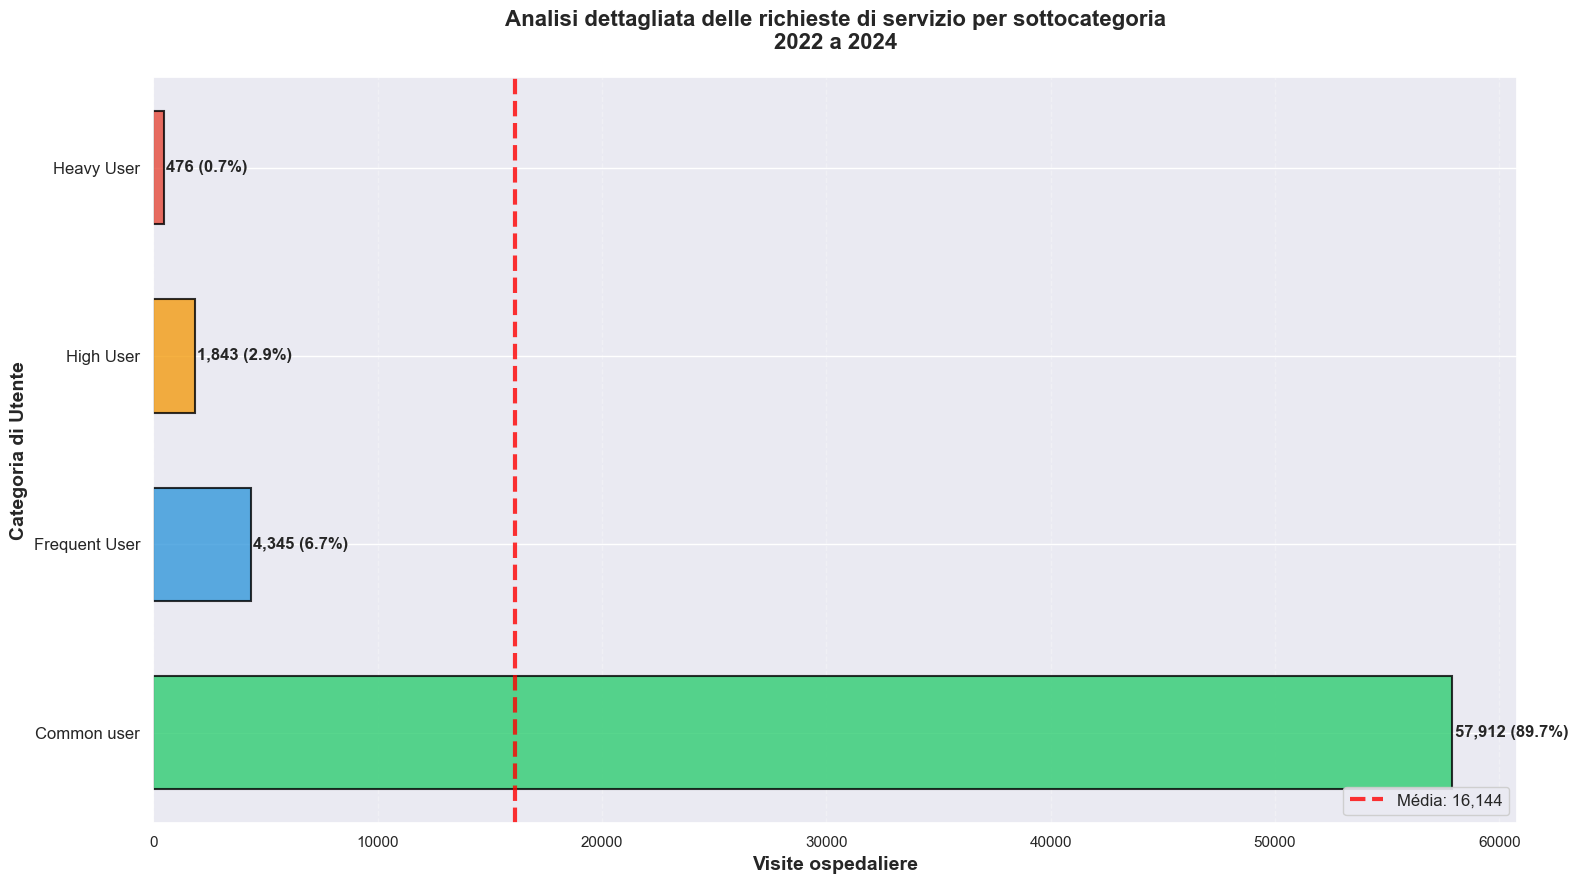

In [265]:
# Gráfico de barras horizontais com métricas completas
plt.figure(figsize=(16, 9))
y_pos = np.arange(len(categorias_usuarios))

# Criar barras horizontais
bars = plt.barh(y_pos, categorias_usuarios.values, 
                color=colors_gradient, edgecolor='black', linewidth=1.5, height=0.6)

# Customizar eixos
plt.xlabel('Visite ospedaliere', fontsize=14, fontweight='bold')
plt.ylabel('Categoria di Utente', fontsize=14, fontweight='bold')
plt.title(f'Analisi dettagliata delle richieste di servizio per sottocategoria\n{periodo}', 
          fontsize=16, fontweight='bold', pad=20)
plt.yticks(y_pos, categorias_usuarios.index, fontsize=12)

# Adicionar valores, percentuais e informações extras nas barras
for i, (v, p) in enumerate(zip(categorias_usuarios.values, percentuais.values)):
    # Valor absoluto e percentual
    plt.text(v + 100, i, f'{v:,} ({p:.1f}%)', 
             va='center', fontsize=12, fontweight='bold')
    
    # Barra colorida por categoria
    bars[i].set_alpha(0.8)

# Adicionar linha de média
plt.axvline(x=media_cat, color='red', linestyle='--', linewidth=3, 
            label=f'Média: {media_cat:,.0f}', alpha=0.8)

# Adicionar grade e legenda
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.legend(fontsize=12, loc='lower right', framealpha=0.9)

plt.tight_layout()
plt.show()

In [266]:
# Tabela resumo estatístico detalhada
resumo_categorias = pd.DataFrame({
    'Categoria': categorias_usuarios.index,
    'Contagem': categorias_usuarios.values,
    'Percentual (%)': percentuais.values,
    'Acumulado': categorias_usuarios.cumsum().values,
    'Perc. Acumulado (%)': percentuais.cumsum().round(2).values
})

print(f"\n{'='*100}")
print(f"{'RIEPILOGO STATISTICO DETTAGLIATO - SOTTOCATEGORIE':^100}")
print(f"{'Periodo: ' + periodo:^100}")
print(f"{'='*100}\n")
print(resumo_categorias.to_string(index=False))
print(f"\n{'='*100}")
print(f"📊 TOTALE VISITE OSPEDALIERE: {categorias_usuarios.sum():,}")
print(f"📈 NUMERO DI CATEGORIE: {len(categorias_usuarios)}")
print(f"📉 MEDIA PER CATEGORIA: {media_cat:,.2f}")
print(f"📌 DEVIAZIONE STANDARD: {categorias_usuarios.std():,.2f}")
print(f"{'='*100}\n")

# Exibir insights
print("💡 INSIGHTS:")
categoria_maior = categorias_usuarios.idxmax()
categoria_menor = categorias_usuarios.idxmin()
print(f"   • Categoria con PIÙ visite: {categoria_maior} ({categorias_usuarios.max():,} - {percentuais.max():.1f}%)")
print(f"   • Categoria con MENO visite: {categoria_menor} ({categorias_usuarios.min():,} - {percentuais.min():.1f}%)")
print(f"   • Differenza tra maggiore e minore: {categorias_usuarios.max() - categorias_usuarios.min():,} visite")
print(f"{'='*100}")


                         RIEPILOGO STATISTICO DETTAGLIATO - SOTTOCATEGORIE                          
                                        Periodo: 2022 a 2024                                        

    Categoria  Contagem  Percentual (%)  Acumulado  Perc. Acumulado (%)
  Common user     57912           89.68      57912                89.68
Frequent User      4345            6.73      62257                96.41
    High User      1843            2.85      64100                99.26
   Heavy User       476            0.74      64576               100.00

📊 TOTALE VISITE OSPEDALIERE: 64,576
📈 NUMERO DI CATEGORIE: 4
📉 MEDIA PER CATEGORIA: 16,144.00
📌 DEVIAZIONE STANDARD: 27,891.38

💡 INSIGHTS:
   • Categoria con PIÙ visite: Common user (57,912 - 89.7%)
   • Categoria con MENO visite: Heavy User (476 - 0.7%)
   • Differenza tra maggiore e minore: 57,436 visite


## 2.3. Top 15 Pacientes Mais Frequentes por Subgrupo de Usuário

In [222]:
# Função para obter top pacientes por subgrupo
def organiza(dataframe, subgrupo):
    """
    Retorna os top N pacientes mais frequentes de um subgrupo específico
    """
    # Filtrar por subgrupo
    df_subgrupo = dataframe[dataframe['Sottogruppo Pazienti'] == subgrupo]
    
    # Agrupar por paciente e contar visitas
    top_pacientes = (
        df_subgrupo[['Paziente', 'Numero Scheda PS']]
        .groupby('Paziente')
        .count()
        .sort_values(by='Numero Scheda PS', ascending=False)
        .reset_index()
    )
    
    # Renomear coluna
    top_pacientes.rename(columns={'Numero Scheda PS': 'Ricorrenza'}, inplace=True)
    top_pacientes['Sottogruppo Pazienti'] = subgrupo
    
    return top_pacientes

subs = ['Common user', 'Frequent User', 'High User', 'Heavy User']
data = []

for sub in subs:
    top_pacientes_sub = organiza(ano_2024, sub)
    data.append(top_pacientes_sub)

subcategorias = pd.concat(data, ignore_index=True)
subcategorias.tail(2)

,Paziente,Ricorrenza,Sottogruppo Pazienti
28951,VEZZOLI CATERINA,1,Heavy User
28952,ZERBINI MARIO,1,Heavy User


In [223]:
subcategorias.sample(3)
subcategorias.to_excel('pacientes_por_subgrupo_2024.xlsx', index=False)

In [224]:
# Função para obter top pacientes por subgrupo
def obter_top_pacientes_por_subgrupo(dataframe, subgrupo, top_n=15):
    """
    Retorna os top N pacientes mais frequentes de um subgrupo específico
    """
    # Filtrar por subgrupo
    df_subgrupo = dataframe[dataframe['Sottogruppo Pazienti'] == subgrupo]
    
    # Agrupar por paciente e contar visitas
    top_pacientes = (
        df_subgrupo[['Paziente', 'Numero Scheda PS']]
        .groupby('Paziente')
        .count()
        .sort_values(by='Numero Scheda PS', ascending=False)
        .head(top_n)
    )
    
    # Renomear coluna
    top_pacientes.rename(columns={'Numero Scheda PS': 'Ricorrenza'}, inplace=True)
    
    return top_pacientes

# Gerar tabelas para cada subgrupo
subgrupos = ['Common user', 'Frequent User', 'High User', 'Heavy User']

for subgrupo in subgrupos:
    top_pacientes = obter_top_pacientes_por_subgrupo(df, subgrupo, top_n=15)
    
    print("\n" + "="*80)
    print(f"TOP 15 PACIENTES - {subgrupo.upper()}")
    print("="*80)
    display(top_pacientes)


TOP 15 PACIENTES - COMMON USER


,Ricorrenza
Paziente,
ZYKOLLARI INA,3
ZULQURNAIN ZULQURNAIN,3
ZUELLI SILVIA,3
ZUCCHINELLI ALESSANDRO,3
ZUCCHI MICHAEL,3
ZUCCHETTI VALERIA,3
ZUCCHETTI PAOLO,3
ZUCCHETTI MARIO,3
ZUCCHETTI GIAMBATTISTA,3



TOP 15 PACIENTES - FREQUENT USER


,Ricorrenza
Paziente,
ABBARILATI ELIDE,5
ABETE GIUSEPPE,5
ABENI SOFIA,5
ABENI SANDRINA,5
ABENI LELIA,5
ABDELLATIF MOUEZ,5
ZINI VANNA LUCIA,5
ZINI MARIO,5
ADEMI ARDIT,5



TOP 15 PACIENTES - HIGH USER


,Ricorrenza
Paziente,
ZAMBUTO LILIUCCIA,9
ZAPPELLA LUCIANO,9
ZANOTTI PAOLA,9
MARCANDELLI CATERINA,9
MARCHETTI GIOVANNA,9
DELFINI INES,9
RUBAGOTTI BATTISTA,9
RUBAGOTTI FRANCESCO,9
FACCHETTI FRANCESCA,9



TOP 15 PACIENTES - HEAVY USER


,Ricorrenza
Paziente,
GUERRINI FRANCA,68
PERI GINA,66
PRANDINI LAURA SIMONETTA,40
BARESI NATALE,40
NICOLAE STRUGURICA,36
VILLA VIVIANA,36
NOCELLA CECILIA,33
MARCHETTI GIOVANNI,30
BONETTI MARIA DIOMIRA,30


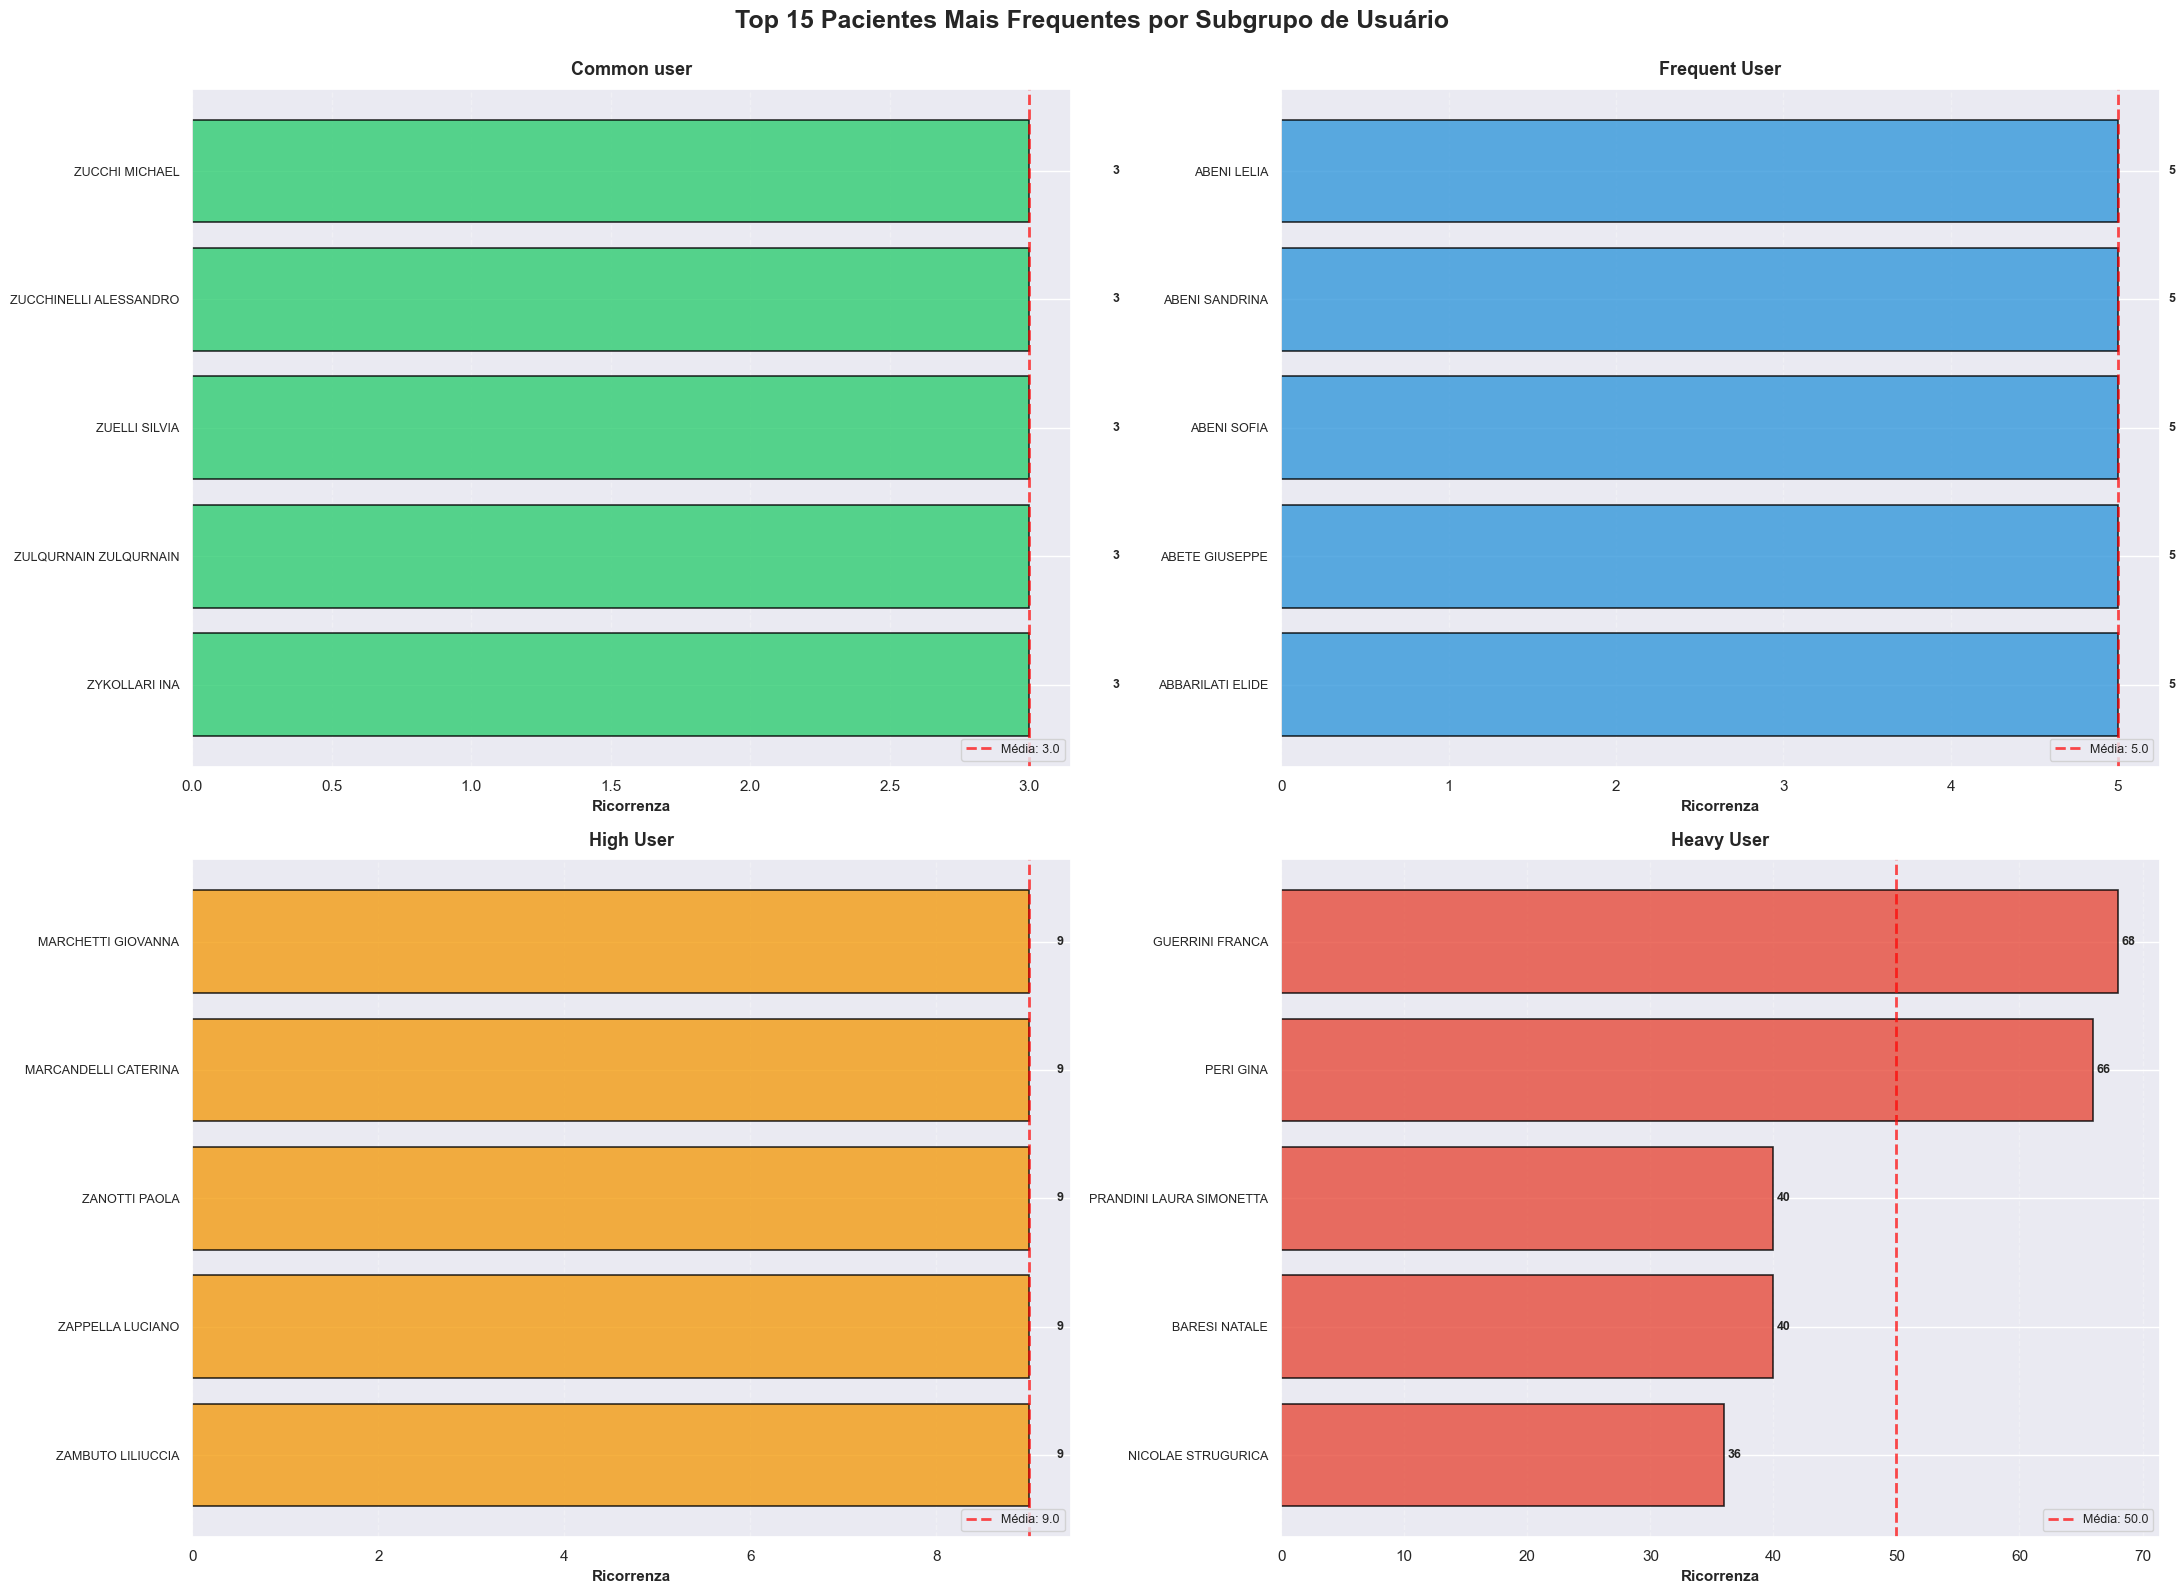

In [268]:
# Criar visualização em grid com 4 gráficos (um para cada subgrupo)
fig, axes = plt.subplots(2, 2, figsize=(22, 16))
fig.suptitle('Top 15 Pacientes Mais Frequentes por Subgrupo de Usuário', 
             fontsize=18, fontweight='bold', y=0.995)

cores_subgrupos = {
    'Common user': '#2ecc71',
    'Frequent User': '#3498db',
    'High User': '#f39c12',
    'Heavy User': '#e74c3c'
}

posicoes = [(0, 0), (0, 1), (1, 0), (1, 1)]

for idx, (subgrupo, pos) in enumerate(zip(subgrupos, posicoes)):
    ax = axes[pos[0], pos[1]]
    
    # Obter dados
    top_pacientes = obter_top_pacientes_por_subgrupo(df, subgrupo, top_n=5)
    
    # Criar gráfico de barras horizontais
    top_pacientes_ordenado = top_pacientes.sort_values(by='Ricorrenza', ascending=True)
    
    bars = ax.barh(
        range(len(top_pacientes_ordenado)), 
        top_pacientes_ordenado['Ricorrenza'],
        color=cores_subgrupos[subgrupo],
        edgecolor='black',
        linewidth=1.2,
        alpha=0.8
    )
    
    # Configurar eixos
    ax.set_yticks(range(len(top_pacientes_ordenado)))
    ax.set_yticklabels(top_pacientes_ordenado.index, fontsize=9)
    ax.set_xlabel('Ricorrenza', fontsize=11, fontweight='bold')
    ax.set_title(f'{subgrupo}', fontsize=13, fontweight='bold', pad=10)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Adicionar valores nas barras
    for i, v in enumerate(top_pacientes_ordenado['Ricorrenza']):
        ax.text(v + 0.3, i, str(v), va='center', fontsize=9, fontweight='bold')
    
    # Adicionar linha de média
    media = top_pacientes['Ricorrenza'].mean()
    ax.axvline(x=media, color='red', linestyle='--', linewidth=2, 
               label=f'Média: {media:.1f}', alpha=0.7)
    ax.legend(fontsize=9, loc='lower right')

plt.tight_layout()
plt.show()

In [226]:
# Criar tabela comparativa consolidada
print("\n" + "="*100)
print("TABELA COMPARATIVA - TOP 5 PACIENTES POR SUBGRUPO")
print("="*100 + "\n")

tabela_comparativa = pd.DataFrame()

for subgrupo in subgrupos:
    top_pacientes = obter_top_pacientes_por_subgrupo(df, subgrupo, top_n=5)
    top_pacientes_reset = top_pacientes.reset_index()
    top_pacientes_reset['Subgrupo'] = subgrupo
    top_pacientes_reset['Posição'] = range(1, len(top_pacientes_reset) + 1)
    
    # Reorganizar colunas
    top_pacientes_reset = top_pacientes_reset[['Posição', 'Subgrupo', 'Paziente', 'Ricorrenza']]
    
    tabela_comparativa = pd.concat([tabela_comparativa, top_pacientes_reset], ignore_index=True)

display(tabela_comparativa)


TABELA COMPARATIVA - TOP 5 PACIENTES POR SUBGRUPO



,Posição,Subgrupo,Paziente,Ricorrenza
0,1,Common user,ZYKOLLARI INA,3
1,2,Common user,ZULQURNAIN ZULQURNAIN,3
2,3,Common user,ZUELLI SILVIA,3
3,4,Common user,ZUCCHINELLI ALESSANDRO,3
4,5,Common user,ZUCCHI MICHAEL,3
5,1,Frequent User,ABBARILATI ELIDE,5
6,2,Frequent User,ABETE GIUSEPPE,5
7,3,Frequent User,ABENI SOFIA,5
8,4,Frequent User,ABENI SANDRINA,5
9,5,Frequent User,ABENI LELIA,5


In [270]:
# Estatísticas resumidas por subgrupo
print("\n" + "="*100)
print("Statistiche riassuntive per sottogruppo")
print("="*100)

estatisticas_resumo = pd.DataFrame()

for subgrupo in subgrupos:
    top_pacientes = obter_top_pacientes_por_subgrupo(df, subgrupo, top_n=15)
    
    stats = {
        'sottogruppo': subgrupo,
        'Totale Pazienti': len(top_pacientes),
        'Totale Visite': top_pacientes['Ricorrenza'].sum(),
        'MMedia Visite': top_pacientes['Ricorrenza'].mean(),
        'Mediana Visite': top_pacientes['Ricorrenza'].median(),
        'MMin Visite': top_pacientes['Ricorrenza'].min(),
        'MMax Visite': top_pacientes['Ricorrenza'].max(),
        'Deviazione Standard': top_pacientes['Ricorrenza'].std()
    }
    
    estatisticas_resumo = pd.concat([estatisticas_resumo, pd.DataFrame([stats])], ignore_index=True)

# Formatar a tabela
estatisticas_resumo_formatada = estatisticas_resumo.copy()
estatisticas_resumo_formatada['Totale Visite'] = estatisticas_resumo_formatada['Totale Visite'].apply(lambda x: f'{x:,.0f}')
estatisticas_resumo_formatada['MMedia Visite'] = estatisticas_resumo_formatada['MMedia Visite'].apply(lambda x: f'{x:.2f}')
estatisticas_resumo_formatada['Mediana Visite'] = estatisticas_resumo_formatada['Mediana Visite'].apply(lambda x: f'{x:.1f}')
estatisticas_resumo_formatada['Deviazione Standard'] = estatisticas_resumo_formatada['Deviazione Standard'].apply(lambda x: f'{x:.2f}')

display(estatisticas_resumo_formatada)


Statistiche riassuntive per sottogruppo


,sottogruppo,Totale Pazienti,Totale Visite,MMedia Visite,Mediana Visite,MMin Visite,MMax Visite,Deviazione Standard
0,Common user,15,45,3.00,3.0,3,3,0.00
1,Frequent User,15,75,5.00,5.0,5,5,0.00
2,High User,15,135,9.00,9.0,9,9,0.00
3,Heavy User,15,541,36.07,30.0,26,68,13.43


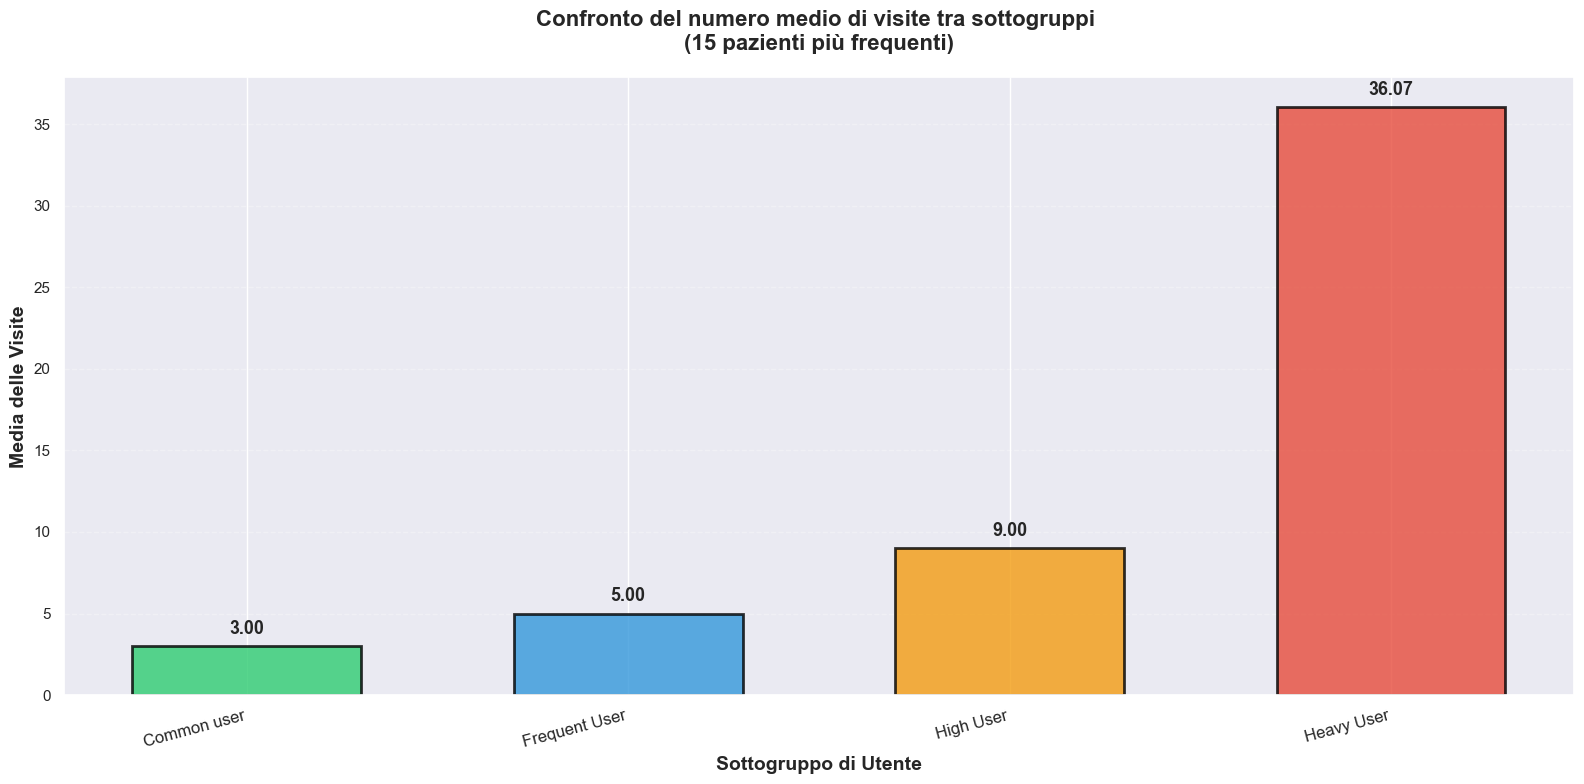


📊 INSIGHTS:
• Sottogruppo con MEDIA PIÙ ALTA: Heavy User (36.07 Visite)
• Sottogruppo con MEDIA PIÙ BASSA: Common user (3.00 Visite)
• Differenza tra la media più alta e quella più bassa: 33.07 Visite


In [273]:
# Gráfico de barras comparativo - Média de visitas por subgrupo (Top 15)
plt.figure(figsize=(16, 8))

medias_por_subgrupo = []
for subgrupo in subgrupos:
    top_pacientes = obter_top_pacientes_por_subgrupo(df, subgrupo, top_n=15)
    medias_por_subgrupo.append(top_pacientes['Ricorrenza'].mean())

x_pos = np.arange(len(subgrupos))
bars = plt.bar(x_pos, medias_por_subgrupo, 
               color=[cores_subgrupos[s] for s in subgrupos],
               edgecolor='black', linewidth=2, alpha=0.8, width=0.6)

plt.xlabel('Sottogruppo di Utente', fontsize=14, fontweight='bold')
plt.ylabel('Media delle Visite', fontsize=14, fontweight='bold')
plt.title('Confronto del numero medio di visite tra sottogruppi \n(15 pazienti più frequenti)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(x_pos, subgrupos, fontsize=12, rotation=15, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Adicionar valores nas barras
for i, (bar, valor) in enumerate(zip(bars, medias_por_subgrupo)):
    plt.text(bar.get_x() + bar.get_width()/2, valor + 0.5, 
             f'{valor:.2f}', ha='center', va='bottom', 
             fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("📊 INSIGHTS:")
print("="*80)
print(f"• Sottogruppo con MEDIA PIÙ ALTA: {subgrupos[np.argmax(medias_por_subgrupo)]} ({max(medias_por_subgrupo):.2f} Visite)")
print(f"• Sottogruppo con MEDIA PIÙ BASSA: {subgrupos[np.argmin(medias_por_subgrupo)]} ({min(medias_por_subgrupo):.2f} Visite)")
print(f"• Differenza tra la media più alta e quella più bassa: {max(medias_por_subgrupo) - min(medias_por_subgrupo):.2f} Visite")
print("="*80)

# 3 - Caracterização Detalhada dos Subgrupos de Usuários

## 3.1. Caracterização por Faixas Etárias

In [275]:
# Criar faixas etárias
def categoriza_idade(idade):
    if pd.isna(idade):
        return 'Não informado'
    elif idade >= 15 and idade <= 44:
        return '15-44 anni'
    elif idade >= 45 and idade <= 64:
        return '45-64 anni'
    elif idade > 64:
        return '> 64 anni'
    else:
        return 'Outro'

# Aplicar a categorização ao dataframe
df["Fascia d'età"] = df['Idade'].apply(categoriza_idade)

# Verificar a distribuição geral
print("Distribuzione Generale delle Fasce d'Età")
print("=" * 80)
display(df["Fascia d'età"].value_counts().sort_index())
print("\n")

Distribuzione Generale delle Fasce d'Età


Fascia d'età
15-44 anni    43941
45-64 anni    35706
> 64 anni     41750
Name: count, dtype: int64

In [278]:
# Análise de faixas etárias por subgrupo
faixas_por_subgrupo = pd.crosstab(df['Sottogruppo Pazienti'], df["Fascia d'età"], normalize='index') * 100

# Ordem das faixas etárias
ordem_faixas = ['15-44 anni', '45-64 anni', '> 64 anni']
faixas_por_subgrupo = faixas_por_subgrupo[ordem_faixas]

# Ordem dos subgrupos
ordem_subgrupos = ['Common user', 'Frequent User', 'High User', 'Heavy User']
faixas_por_subgrupo = faixas_por_subgrupo.reindex(ordem_subgrupos)

print("\nDistribuzione percentuale dei gruppi di età per sottogruppo di utenti")
print("=" * 80)
print(faixas_por_subgrupo.round(2))
print("\n")


Distribuzione percentuale dei gruppi di età per sottogruppo di utenti
Fascia d'età          15-44 anni  45-64 anni  > 64 anni
Sottogruppo Pazienti                                   
Common user                39.08       30.62      30.30
Frequent User              32.85       26.81      40.34
High User                  29.70       26.78      43.53
Heavy User                 21.61       26.60      51.79




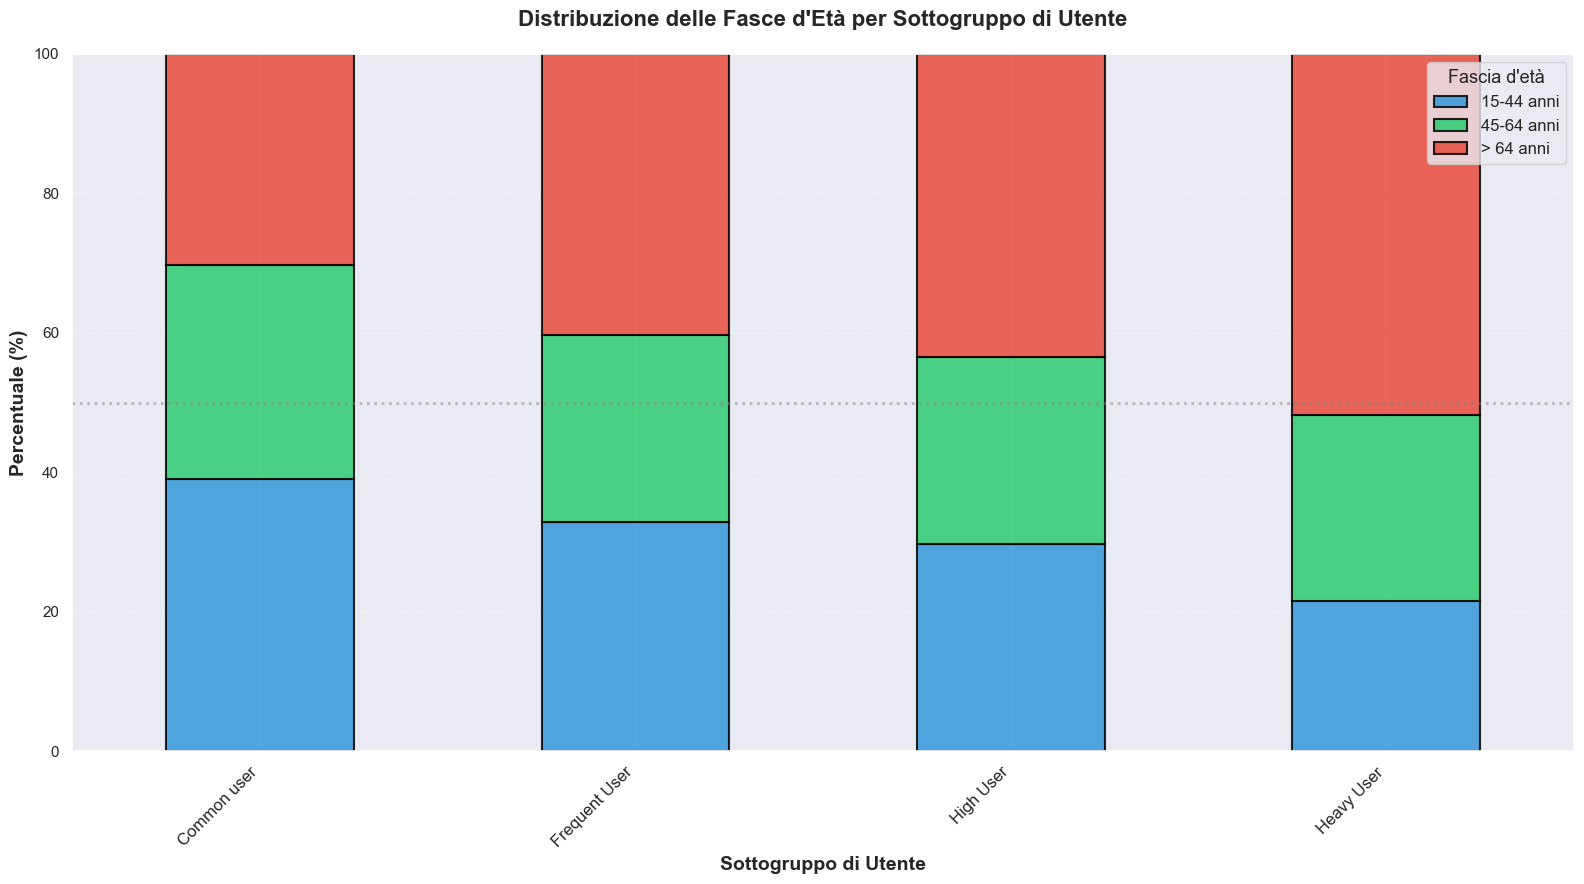

In [279]:
# Gráfico de barras empilhadas - Distribuição de faixas etárias por subgrupo
fig, ax = plt.subplots(figsize=(16, 9))

cores_faixas = ['#3498db', '#2ecc71', '#e74c3c']
faixas_por_subgrupo.plot(kind='bar', stacked=True, color=cores_faixas, 
                          edgecolor='black', linewidth=1.5, ax=ax, alpha=0.85)

ax.set_xlabel('Sottogruppo di Utente', fontsize=14, fontweight='bold')
ax.set_ylabel('Percentuale (%)', fontsize=14, fontweight='bold')
ax.set_title("Distribuzione delle Fasce d'Età per Sottogruppo di Utente", 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.legend(title='Fascia d\'età', fontsize=12, title_fontsize=13, loc='upper right')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, 100)

# Adicionar linha de referência
ax.axhline(y=50, color='gray', linestyle=':', linewidth=2, alpha=0.5)

plt.tight_layout()
plt.show()

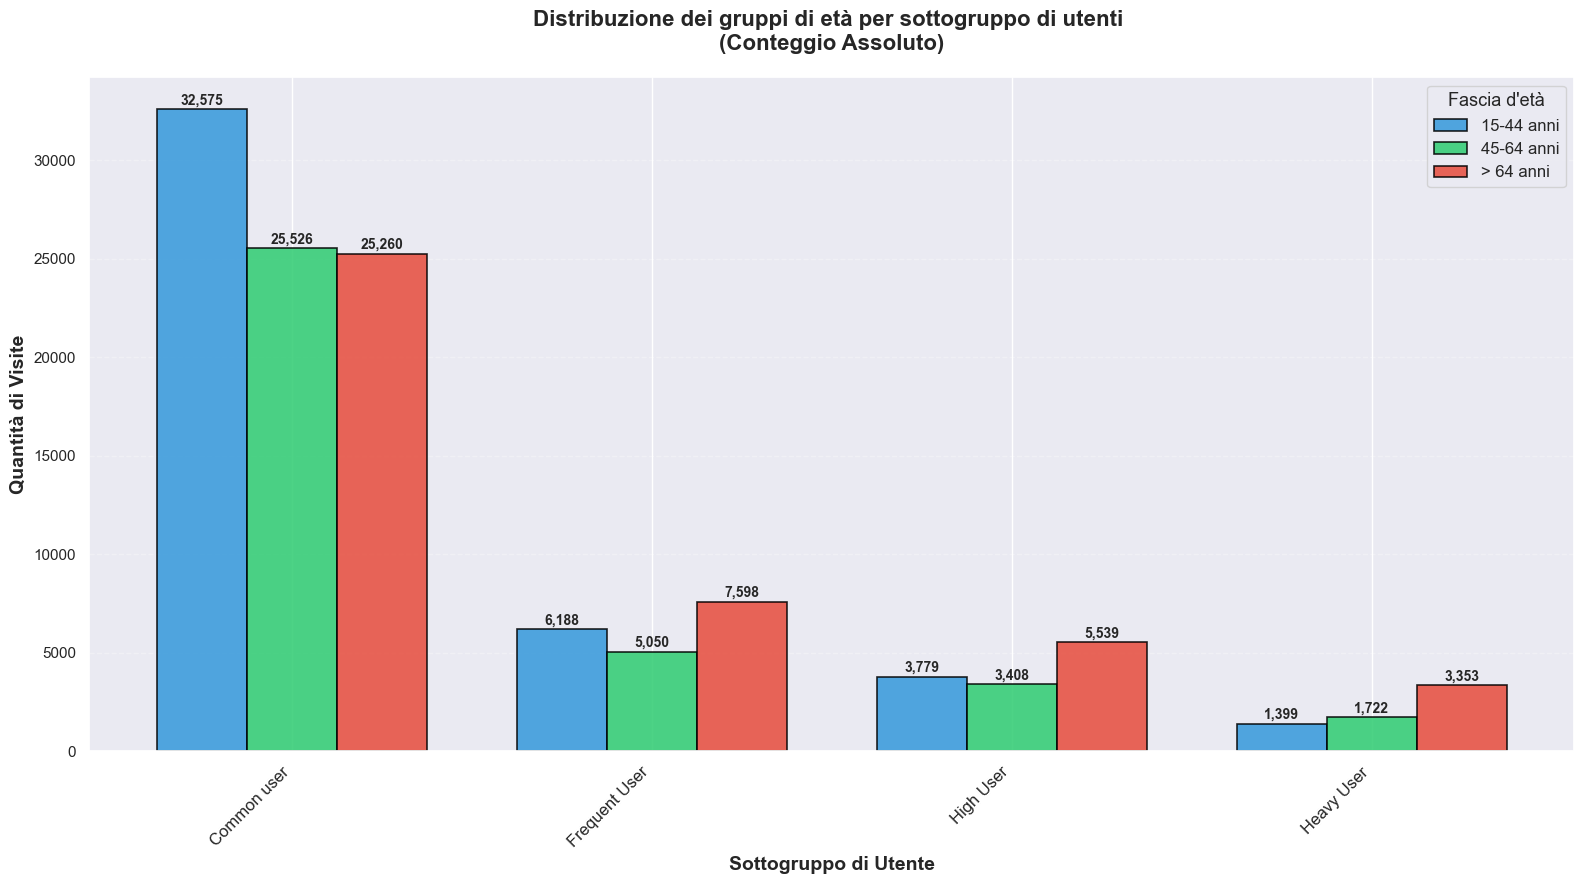

In [282]:
# Gráfico de barras agrupadas - Contagem absoluta
faixas_contagem = pd.crosstab(df['Sottogruppo Pazienti'], df['Faixa_Etaria'])
faixas_contagem = faixas_contagem[ordem_faixas]
faixas_contagem = faixas_contagem.reindex(ordem_subgrupos)

fig, ax = plt.subplots(figsize=(16, 9))

x_pos = np.arange(len(ordem_subgrupos))
width = 0.25

for i, faixa in enumerate(ordem_faixas):
    offset = width * (i - 1)
    bars = ax.bar(x_pos + offset, faixas_contagem[faixa], width, 
                   label=faixa, color=cores_faixas[i], 
                   edgecolor='black', linewidth=1.2, alpha=0.85)
    
    # Adicionar valores nas barras
    for j, v in enumerate(faixas_contagem[faixa]):
        if v > 0:
            ax.text(j + offset, v + 100, f'{v:,}', 
                   ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('Sottogruppo di Utente', fontsize=14, fontweight='bold')
ax.set_ylabel('Quantità di Visite', fontsize=14, fontweight='bold')
ax.set_title("Distribuzione dei gruppi di età per sottogruppo di utenti \n(Conteggio Assoluto)", 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(ordem_subgrupos, rotation=45, ha='right', fontsize=12)
ax.legend(title='Fascia d\'età', fontsize=12, title_fontsize=13, loc='upper right')
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

## 3.2. Idade Média por Subgrupo

In [284]:
# Calcular estatísticas de idade por subgrupo
idade_stats = df.groupby('Sottogruppo Pazienti')['Idade'].agg([
    ('Media', 'mean'),
    ('Mediana', 'median'),
    ('Deviazione Standard', 'std'),
    ('Minima', 'min'),
    ('Massima', 'max'),
    ('Conteggio', 'count')
]).round(2)

# Reordenar pelos subgrupos definidos
idade_stats = idade_stats.reindex(ordem_subgrupos)

print("Statistiche sull'età per sottogruppo di utenti")
print("=" * 90)
display(idade_stats)
print("\n")

Statistiche sull'età per sottogruppo di utenti


,Media,Mediana,Deviazione Standard,Minima,Massima,Conteggio
Sottogruppo Pazienti,,,,,,
Common user,51.70,51.00,21.25,15,105,83361
Frequent User,56.10,57.00,21.93,15,100,18836
High User,57.87,60.00,21.57,15,101,12726
Heavy User,62.92,67.00,19.81,15,99,6474


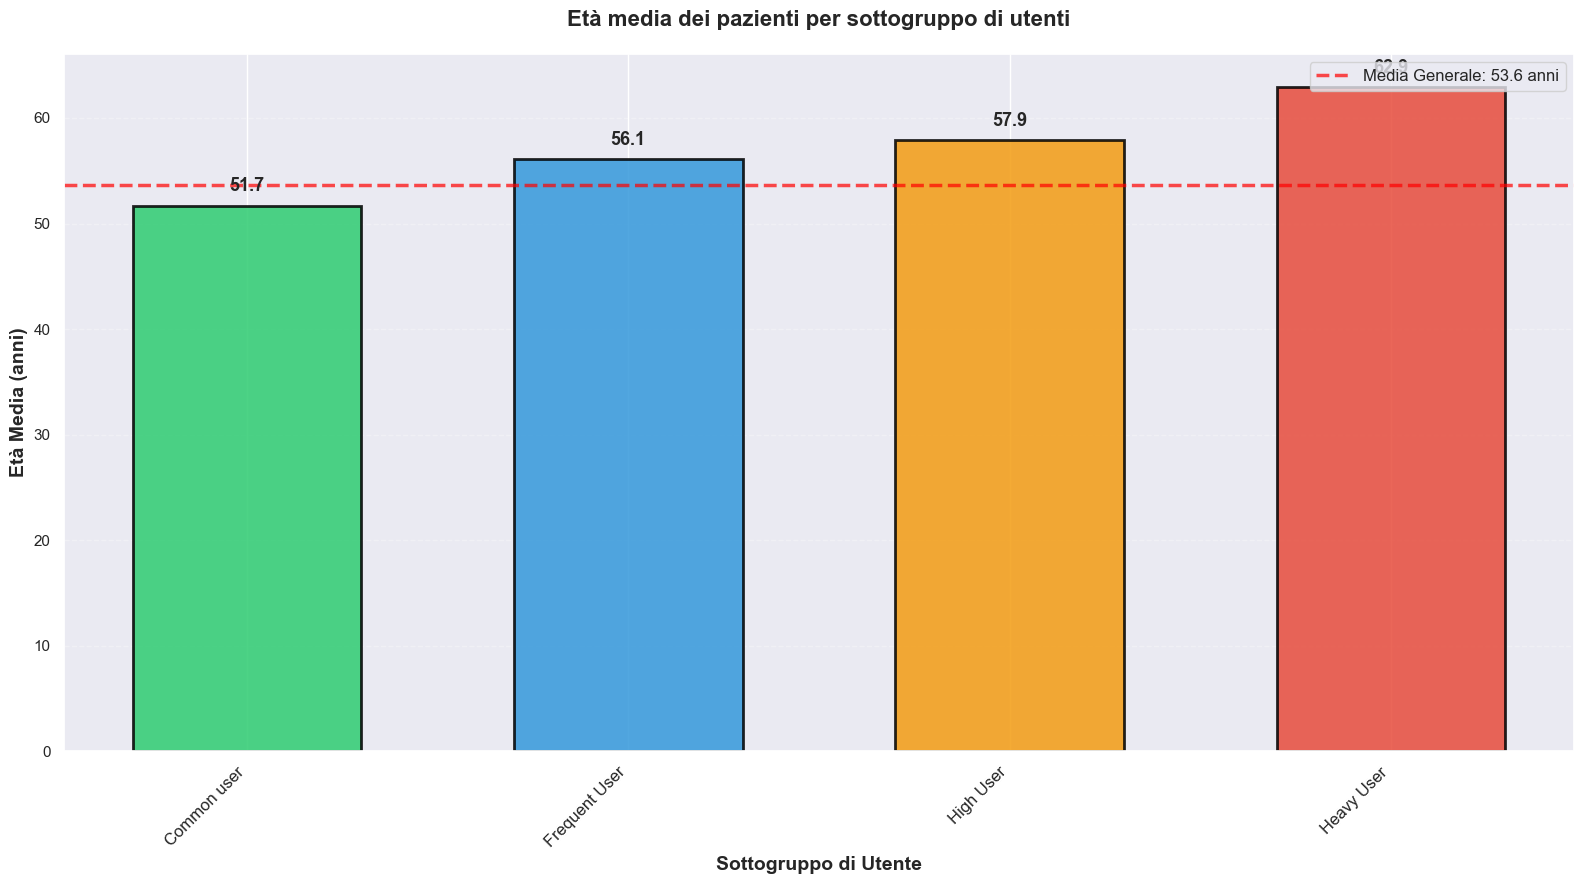


💡 INSIGHTS:
• Sottogruppo con età media MAGGIORE: Heavy User (62.9 anni)
• Sottogruppo con età media MINORE: Common user (51.7 anni)
• Differenza tra maggiore e minore: 11.2 anni
• Età media generale: 53.6 anni


In [287]:
# Gráfico de barras - Idade média por subgrupo
fig, ax = plt.subplots(figsize=(16, 9))

cores_idade = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
bars = ax.bar(range(len(ordem_subgrupos)), idade_stats['Media'], 
               color=cores_idade, edgecolor='black', linewidth=2, alpha=0.85, width=0.6)

ax.set_xlabel('Sottogruppo di Utente', fontsize=14, fontweight='bold')
ax.set_ylabel('Età Media (anni)', fontsize=14, fontweight='bold')
ax.set_title('Età media dei pazienti per sottogruppo di utenti', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(range(len(ordem_subgrupos)))
ax.set_xticklabels(ordem_subgrupos, rotation=45, ha='right', fontsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Adicionar valores nas barras
for i, (bar, valor) in enumerate(zip(bars, idade_stats['Media'])):
    ax.text(bar.get_x() + bar.get_width()/2, valor + 1, 
            f'{valor:.1f}', ha='center', va='bottom', 
            fontsize=13, fontweight='bold')

# Adicionar linha de média geral
media_geral = df['Età'].mean()
ax.axhline(y=media_geral, color='red', linestyle='--', linewidth=2.5, 
           label=f'Media Generale: {media_geral:.1f} anni', alpha=0.7)
ax.legend(fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()

# Insights
print("\n" + "="*90)
print("💡 INSIGHTS:")
print("="*90)
print(f"• Sottogruppo con età media MAGGIORE: {idade_stats['Media'].idxmax()} ({idade_stats['Media'].max():.1f} anni)")
print(f"• Sottogruppo con età media MINORE: {idade_stats['Media'].idxmin()} ({idade_stats['Media'].min():.1f} anni)")
print(f"• Differenza tra maggiore e minore: {idade_stats['Media'].max() - idade_stats['Media'].min():.1f} anni")
print(f"• Età media generale: {media_geral:.1f} anni")
print("="*90)

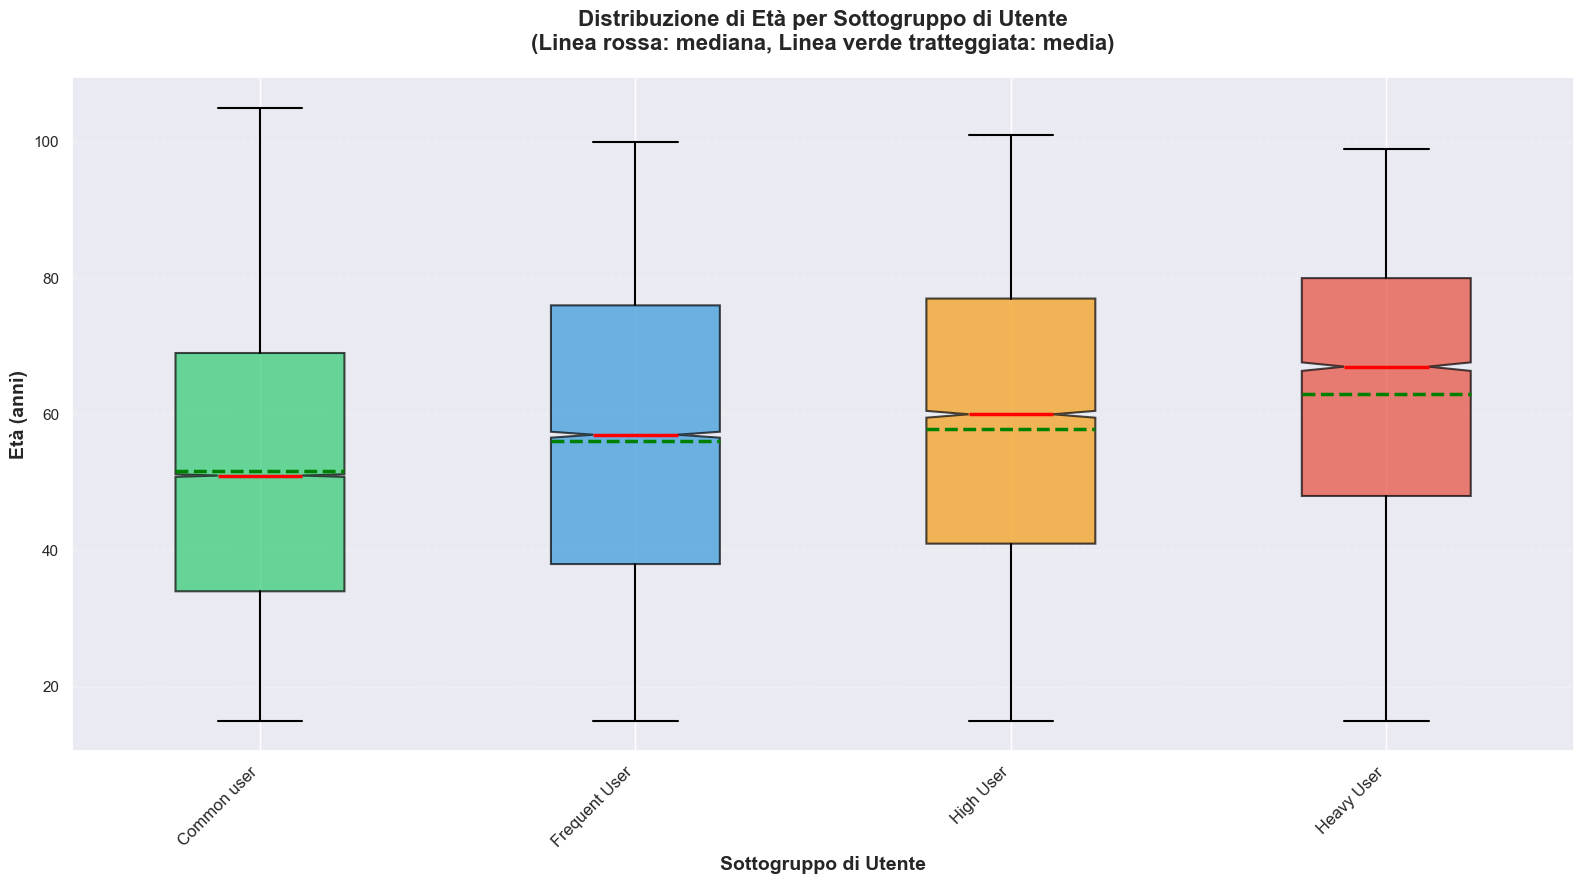

In [289]:
# Boxplot - Distribuição de idade por subgrupo
fig, ax = plt.subplots(figsize=(16, 9))

dados_boxplot = [df[df['Sottogruppo Pazienti'] == sub]['Idade'].dropna() for sub in ordem_subgrupos]

bp = ax.boxplot(dados_boxplot, labels=ordem_subgrupos, patch_artist=True,
                notch=True, showmeans=True, meanline=True,
                boxprops=dict(facecolor='lightblue', edgecolor='black', linewidth=1.5),
                whiskerprops=dict(color='black', linewidth=1.5),
                capprops=dict(color='black', linewidth=1.5),
                medianprops=dict(color='red', linewidth=2.5),
                meanprops=dict(color='green', linestyle='--', linewidth=2.5))

# Colorir cada boxplot com cor diferente
for patch, cor in zip(bp['boxes'], cores_idade):
    patch.set_facecolor(cor)
    patch.set_alpha(0.7)

ax.set_xlabel('Sottogruppo di Utente', fontsize=14, fontweight='bold')
ax.set_ylabel('Età (anni)', fontsize=14, fontweight='bold')
ax.set_title('Distribuzione di Età per Sottogruppo di Utente\n(Linea rossa: mediana, Linea verde tratteggiata: media)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticklabels(ordem_subgrupos, rotation=45, ha='right', fontsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

## 3.3. Caracterização por Modalità Dimissione

In [290]:
# Verificar as modalidades de dimissione disponíveis
print("Modalità di dimissione disponibili:")
print("=" * 80)
print(df['Modalità Dimissione'].value_counts())
print("\n")

Modalità di dimissione disponibili:
Modalità Dimissione
Dimissione a domicilio                                                                                  105334
Ricoverato                                                                                               12544
Trasferimento ad altro istituto                                                                           1733
Il paziente abbandona il PS in corso di accertamenti e/o prima della chiusura della cartella clinica       926
Rifiuta ricovero                                                                                           759
Deceduto in PS                                                                                              85
Dimissione a strutture ambulatoriali                                                                        14
Giunto cadavere                                                                                              2
Name: count, dtype: int64




In [291]:
# Análise de modalità dimissione por subgrupo (percentual)
dimissione_por_subgrupo = pd.crosstab(df['Sottogruppo Pazienti'], df['Modalità Dimissione'], 
                                       normalize='index') * 100

# Reordenar pelos subgrupos
dimissione_por_subgrupo = dimissione_por_subgrupo.reindex(ordem_subgrupos)

print("Distribuzione percentuale della Modalità Dimissione per Sottogruppo")
print("=" * 100)
display(dimissione_por_subgrupo.round(2))
print("\n")

Distribuzione percentuale della Modalità Dimissione per Sottogruppo


Modalità Dimissione,Deceduto in PS,Dimissione a domicilio,Dimissione a strutture ambulatoriali,Giunto cadavere,Il paziente abbandona il PS in corso di accertamenti e/o prima della chiusura della cartella clinica,Ricoverato,Rifiuta ricovero,Trasferimento ad altro istituto
Sottogruppo Pazienti,,,,,,,,
Common user,0.08,87.26,0.01,0.00,0.76,9.96,0.62,1.31
Frequent User,0.07,85.94,0.02,0.00,0.67,11.10,0.64,1.55
High User,0.02,85.36,0.02,0.00,0.83,11.38,0.61,1.78
Heavy User,0.03,85.65,0.00,0.00,0.90,10.86,0.73,1.84


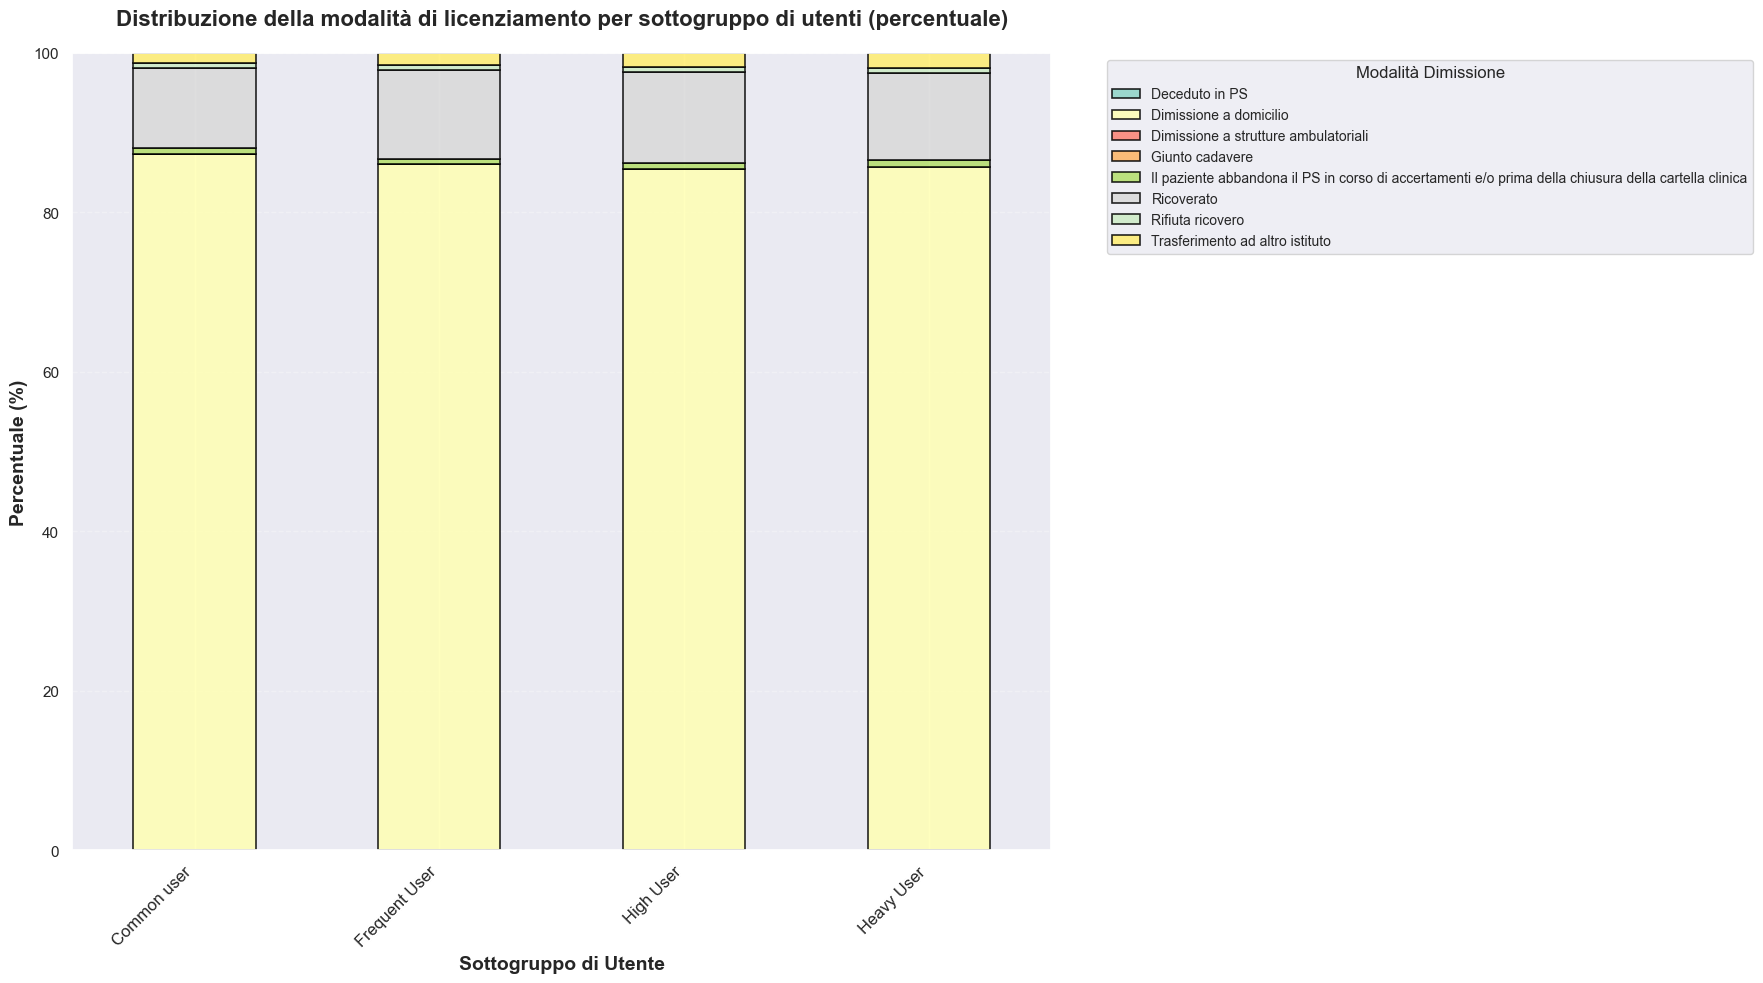

In [ ]:
# Gráfico de barras empilhadas - Modalità Dimissione por subgrupo
fig, ax = plt.subplots(figsize=(18, 10))

# Criar paleta de cores para as modalidades
num_modalidades = len(dimissione_por_subgrupo.columns)
cores_modalidades = plt.cm.Set3(np.linspace(0, 1, num_modalidades))

dimissione_por_subgrupo.plot(kind='bar', stacked=True, color=cores_modalidades, 
                               edgecolor='black', linewidth=1.2, ax=ax, alpha=0.85)

ax.set_xlabel('Sottogruppo di Utente', fontsize=14, fontweight='bold')
ax.set_ylabel('Percentuale (%)', fontsize=14, fontweight='bold')
ax.set_title('Distribuzione della modalità di dimissione per sottogruppo di utenti (percentuale)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.legend(title='Modalità Dimissione', fontsize=10, title_fontsize=12, 
          bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

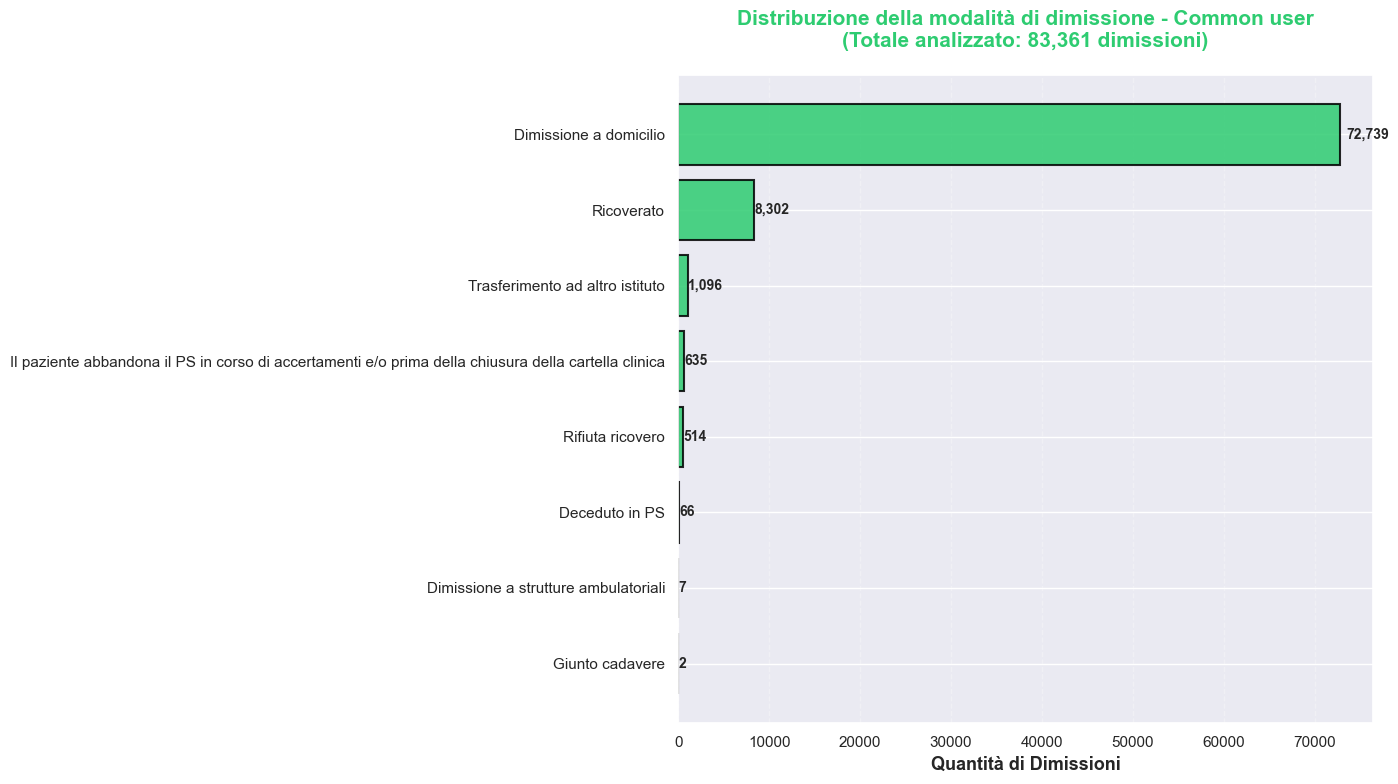

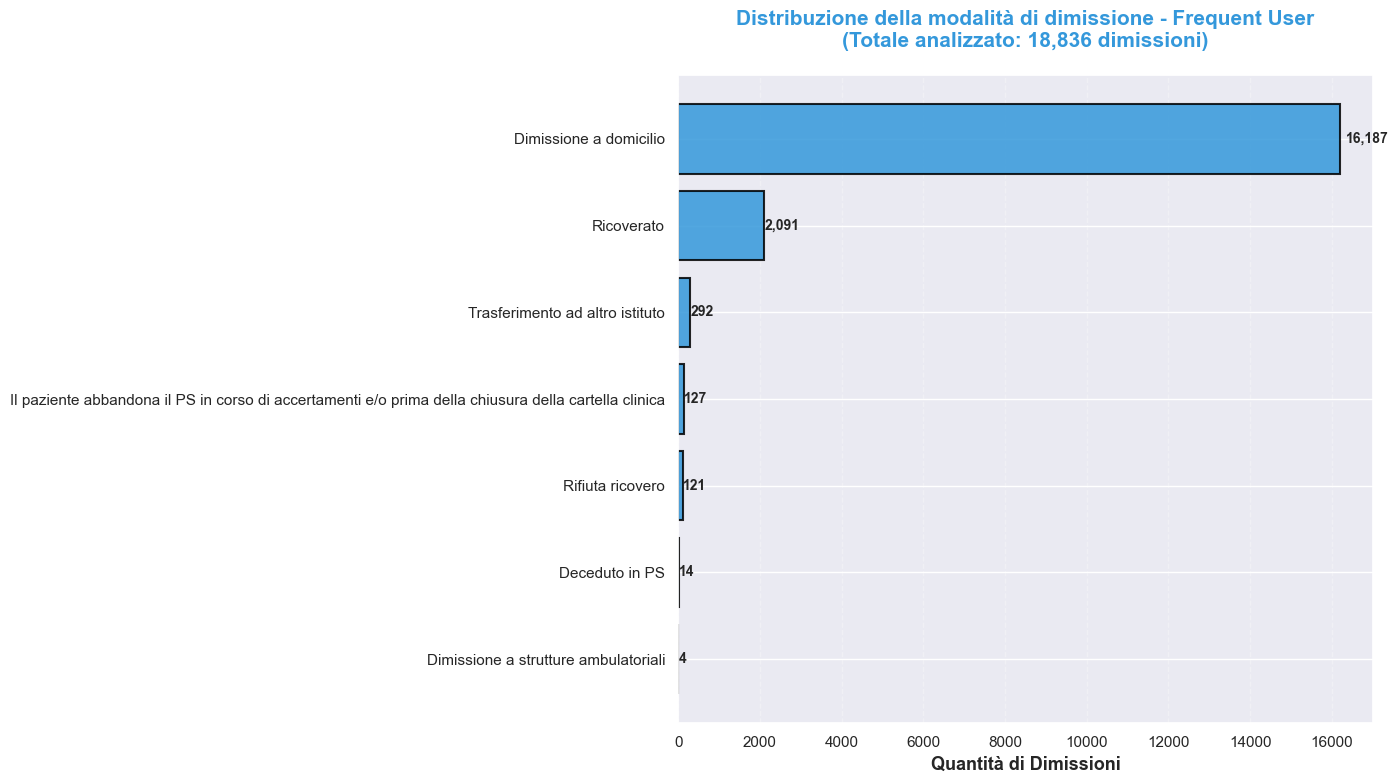

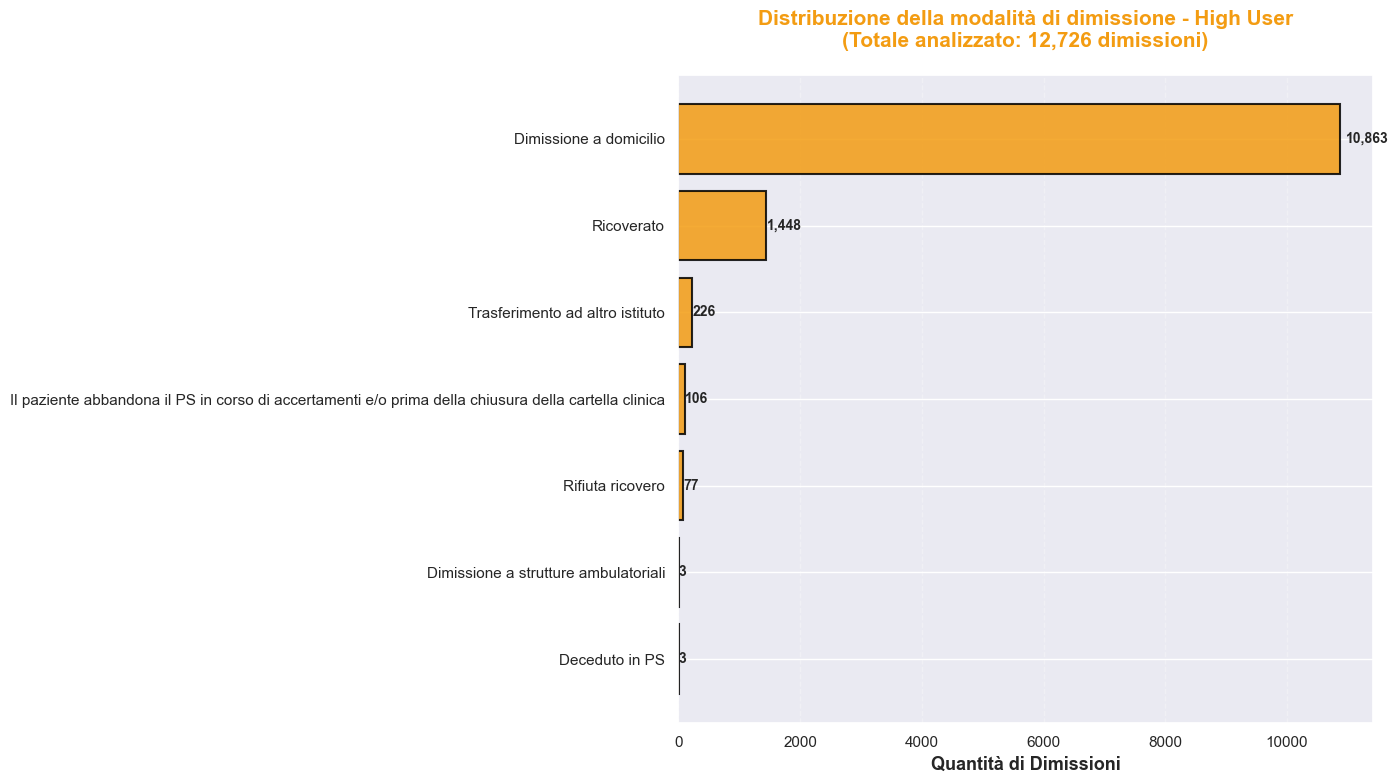

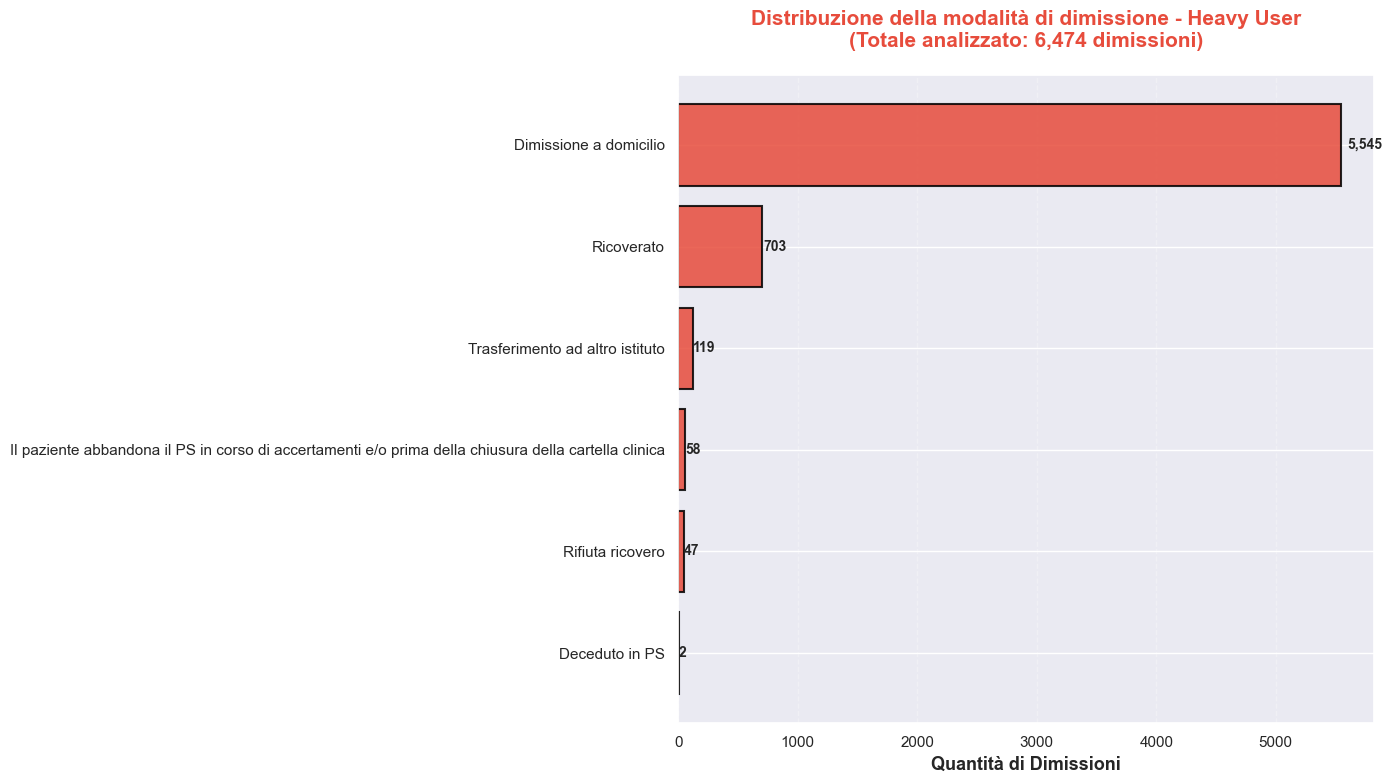

In [293]:
# Gráficos de barras horizontais por subgrupo - Modalità Dimissione (sem "Dimissione a domicilio")
cores_subgrupo_dim = {
    'Common user': '#2ecc71',
    'Frequent User': '#3498db',
    'High User': '#f39c12',
    'Heavy User': '#e74c3c'
}

# Criar gráficos individuais para cada subgrupo
for idx, subgrupo in enumerate(ordem_subgrupos):
    # Filtrar dados por subgrupo
    df_sub = df[df['Sottogruppo Pazienti'] == subgrupo]
    dimissione_counts = df_sub['Modalità Dimissione'].value_counts()
    
    # Remover "Dimissione a domicilio" para melhor visualização
    # dimissione_counts = dimissione_counts.drop('Dimissione a domicilio', errors='ignore')
    
    # Ordenar para melhor visualização
    dimissione_counts = dimissione_counts.sort_values(ascending=True)
    
    # Criar figura individual
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Criar gráfico de barras horizontais
    bars = ax.barh(range(len(dimissione_counts)), dimissione_counts.values,
                   color=cores_subgrupo_dim[subgrupo], edgecolor='black', 
                   linewidth=1.5, alpha=0.85)
    
    # Configurar eixos
    ax.set_yticks(range(len(dimissione_counts)))
    ax.set_yticklabels(dimissione_counts.index, fontsize=11)
    ax.set_xlabel('Quantità di Dimissioni', fontsize=13, fontweight='bold')
    ax.set_title(f'Distribuzione della modalità di dimissione - {subgrupo}\n(Totale analizzato: {dimissione_counts.sum():,} dimissioni)', 
                 fontsize=15, fontweight='bold', pad=20,
                 color=cores_subgrupo_dim[subgrupo])
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Adicionar valores nas barras
    for i, v in enumerate(dimissione_counts.values):
        ax.text(v + (v * 0.01), i, f'{v:,}', va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    print("\n" + "="*80 + "\n")  # Separador entre gráficos

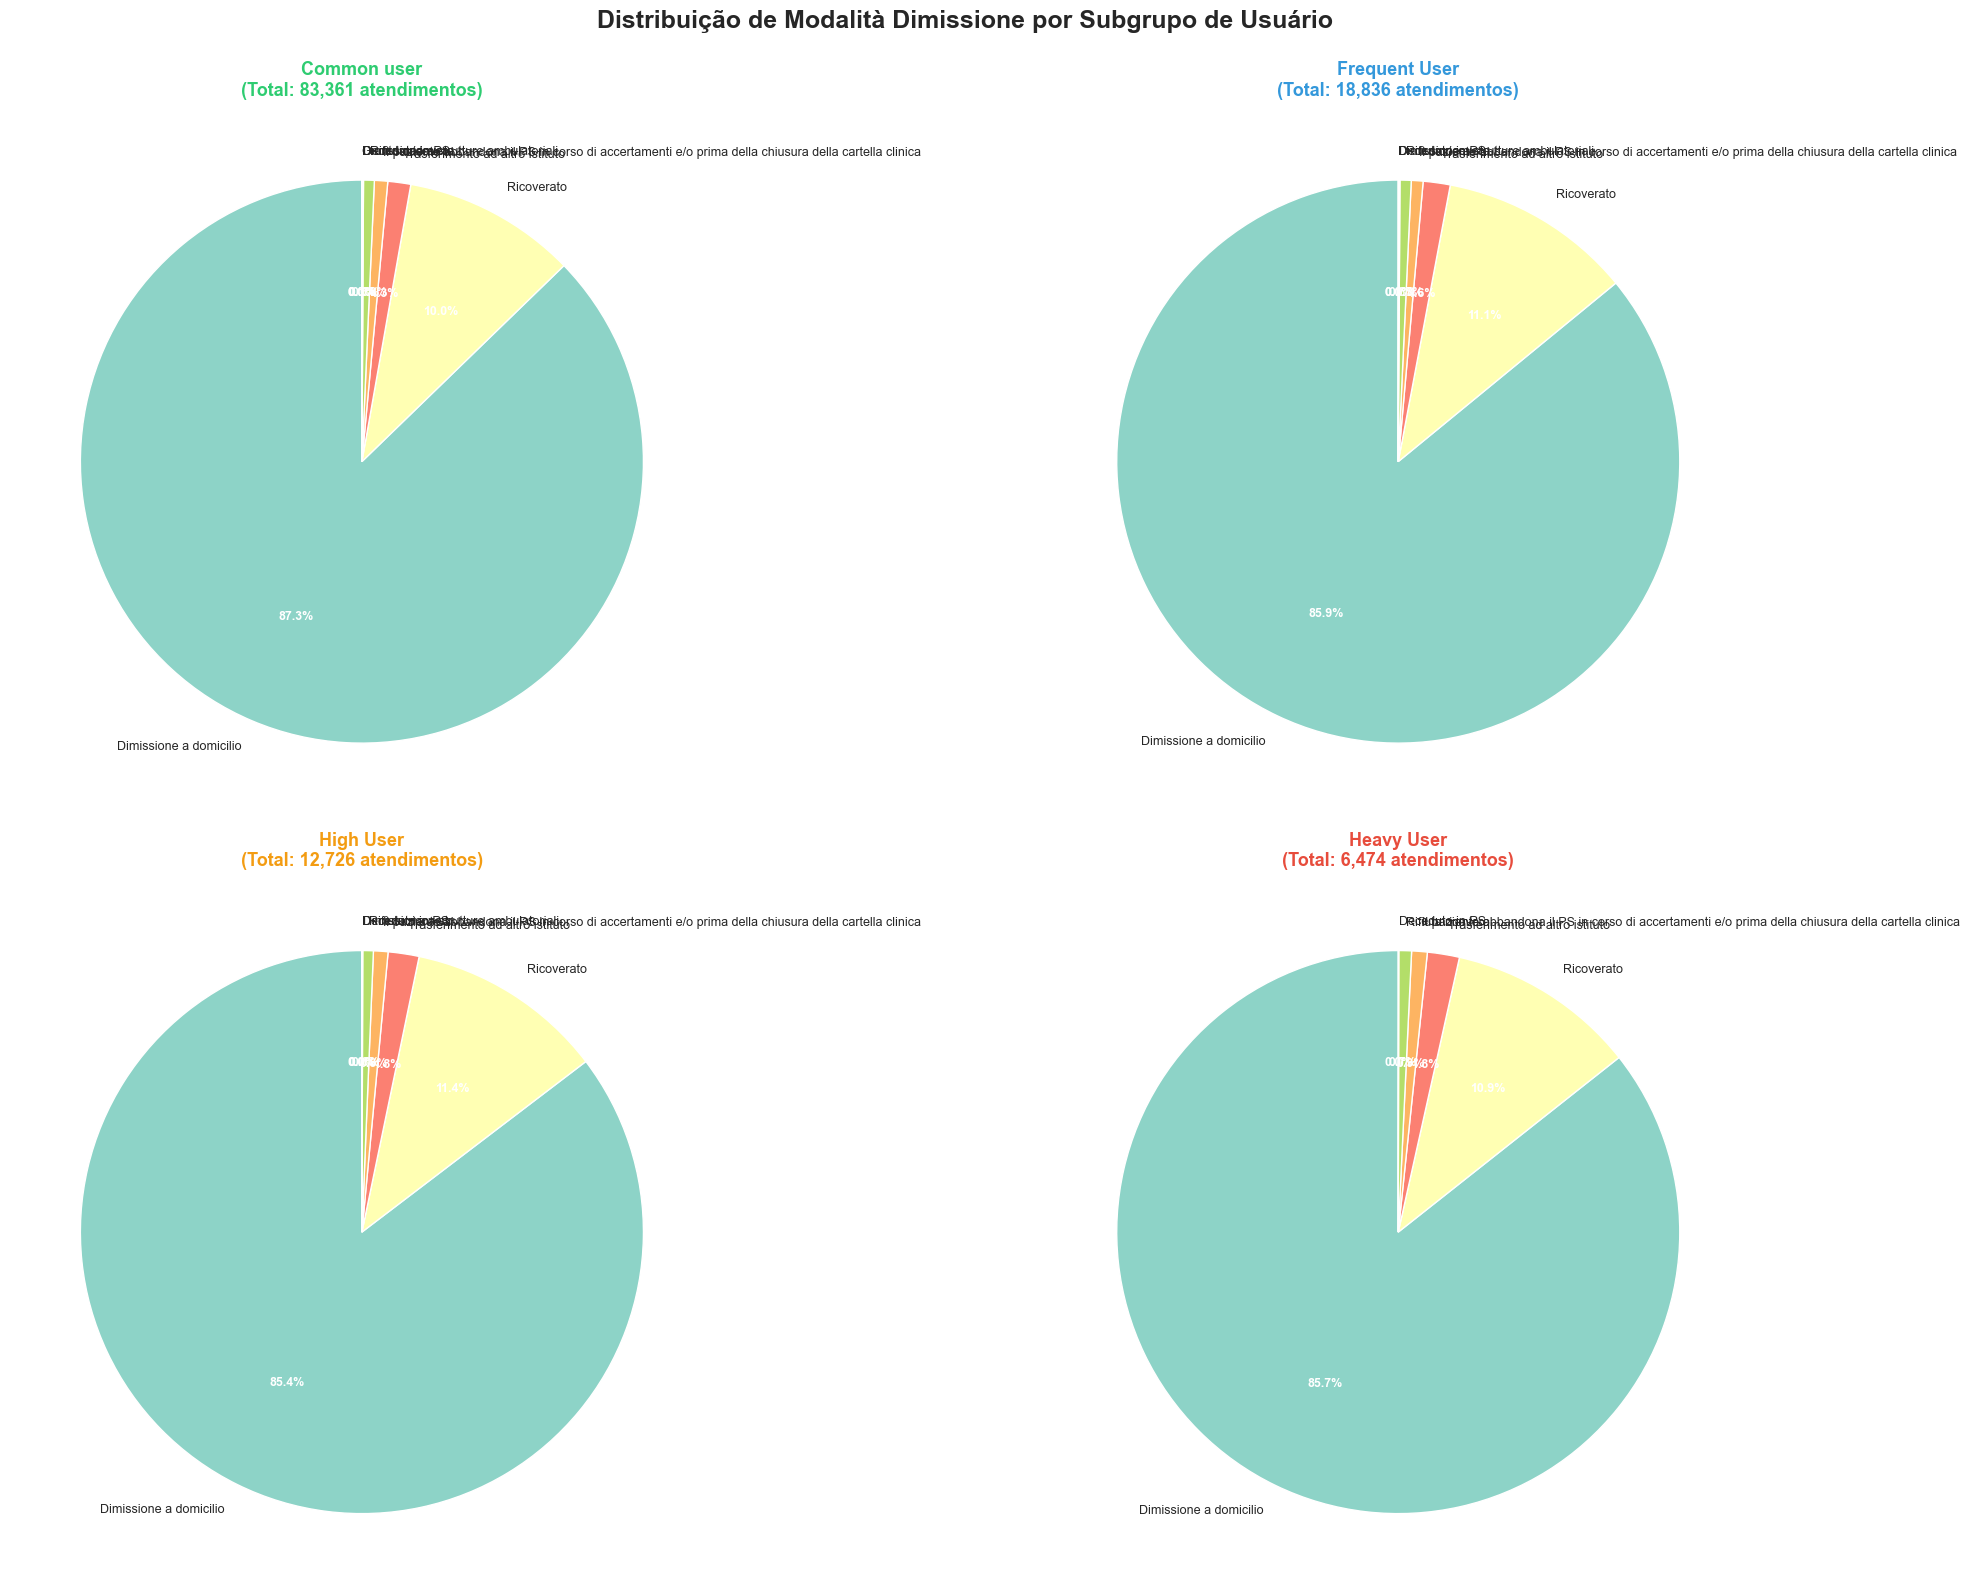

In [240]:
# Gráficos individuais por subgrupo - Modalità Dimissione
fig, axes = plt.subplots(2, 2, figsize=(22, 16))
fig.suptitle('Distribuição de Modalità Dimissione por Subgrupo de Usuário', 
             fontsize=18, fontweight='bold', y=0.995)

posicoes = [(0, 0), (0, 1), (1, 0), (1, 1)]
cores_subgrupo_dim = {
    'Common user': '#2ecc71',
    'Frequent User': '#3498db',
    'High User': '#f39c12',
    'Heavy User': '#e74c3c'
}

for idx, (subgrupo, pos) in enumerate(zip(ordem_subgrupos, posicoes)):
    ax = axes[pos[0], pos[1]]
    
    # Filtrar dados por subgrupo
    df_sub = df[df['Sottogruppo Pazienti'] == subgrupo]
    dimissione_counts = df_sub['Modalità Dimissione'].value_counts()
    # TODO RETIRAR "DIMISSIONE A DOMICILIO" DOS GRÁFICOS
    # dimissione_counts = dimissione_counts.drop('Dimissione a domicilio', errors='ignore')
    
    # Criar gráfico de pizza
    wedges, texts, autotexts = ax.pie(
        dimissione_counts.values, 
        labels=dimissione_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=cores_modalidades[:len(dimissione_counts)],
        textprops={'fontsize': 9}
    )
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(9)
    
    ax.set_title(f'{subgrupo}\n(Total: {len(df_sub):,} atendimentos)', 
                 fontsize=13, fontweight='bold', pad=10,
                 color=cores_subgrupo_dim[subgrupo])

plt.tight_layout()
plt.show()

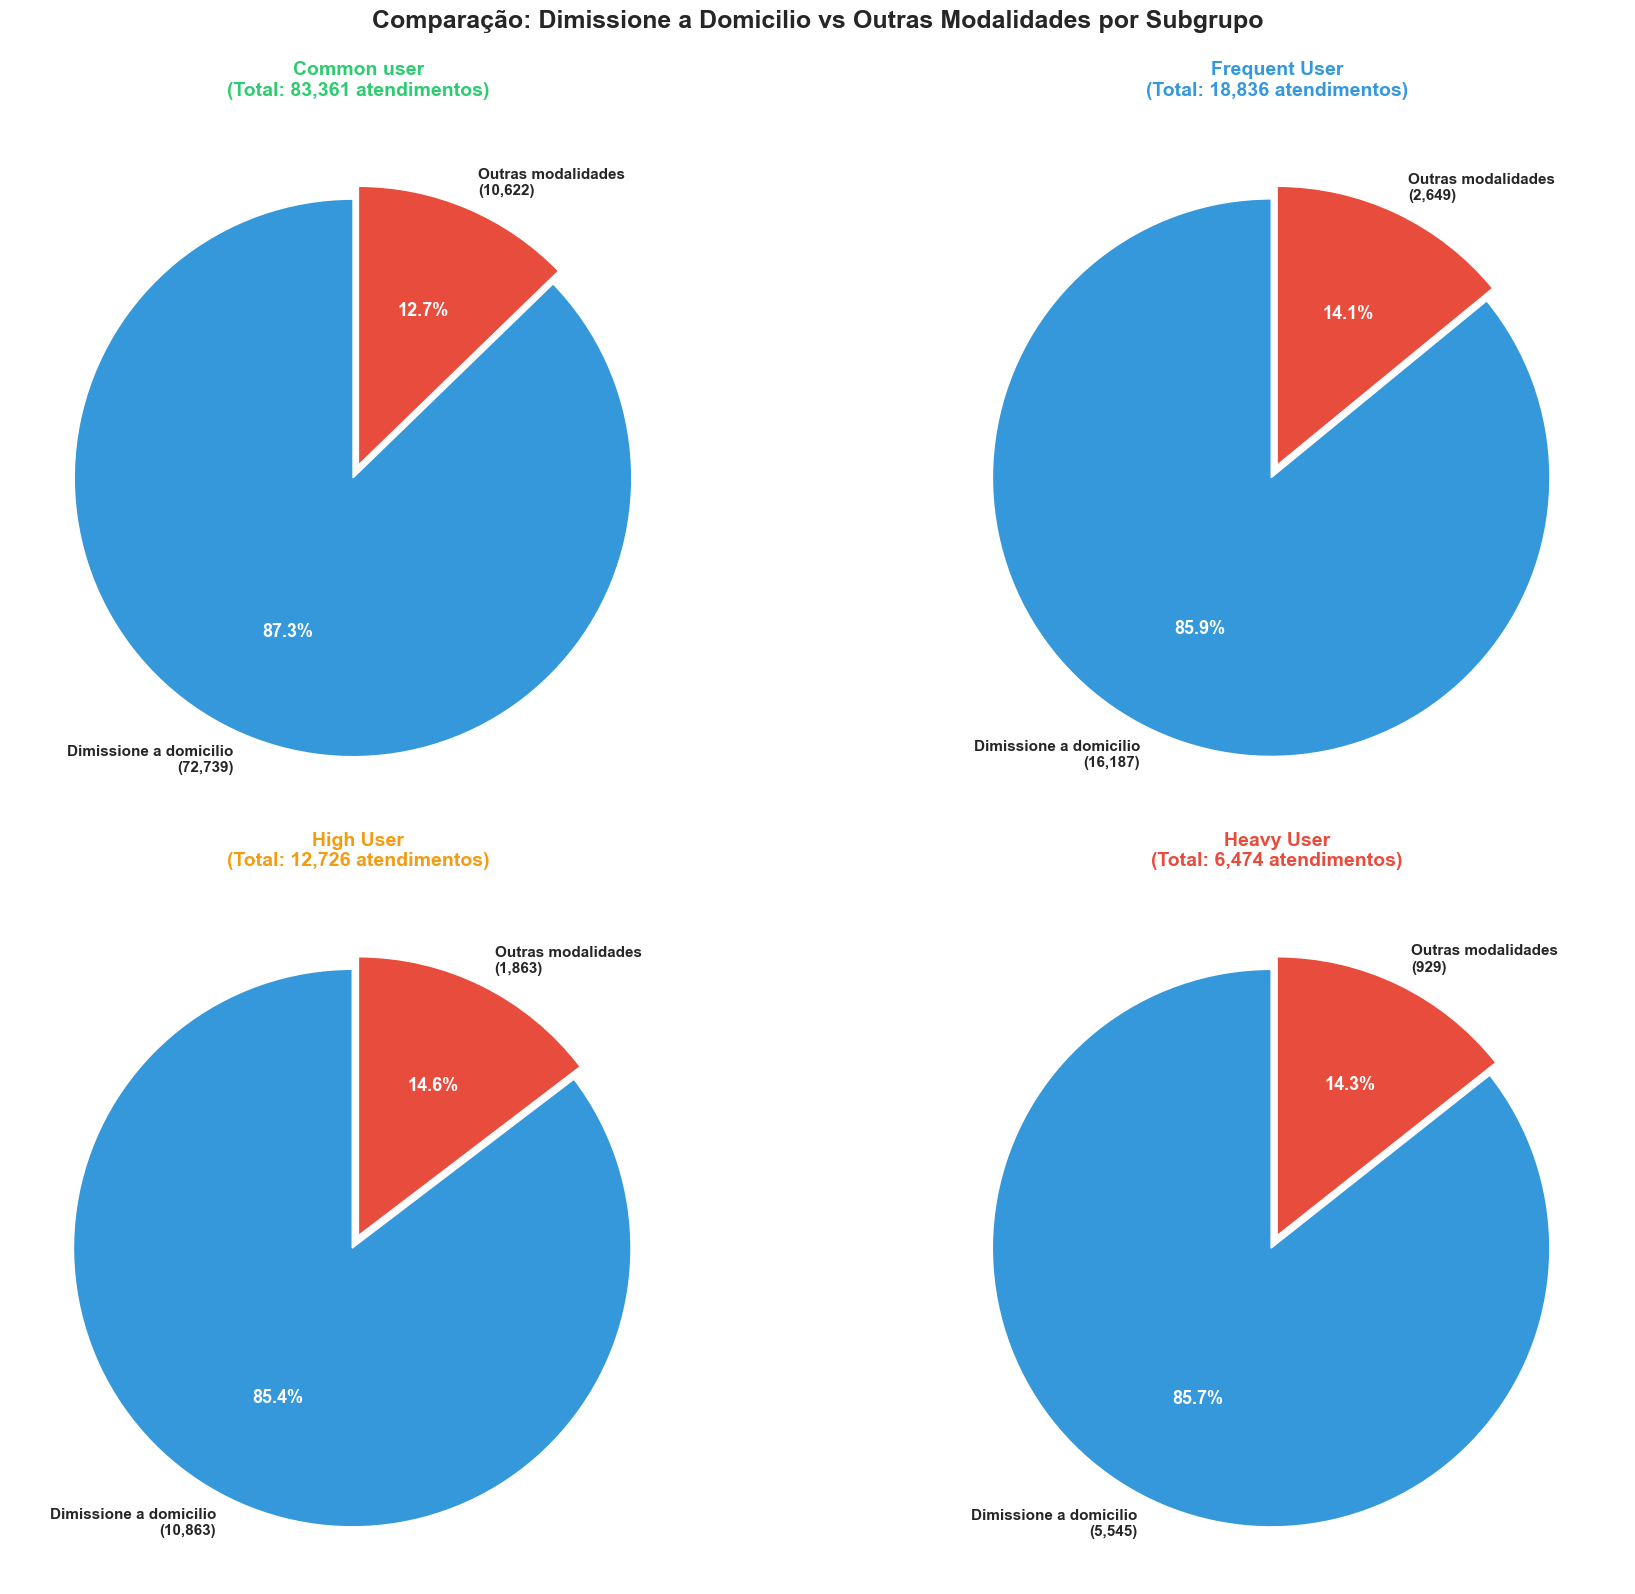


RESUMO: DIMISSIONE A DOMICILIO VS OUTRAS MODALIDADES


,Subgrupo,Dimissione a Domicilio,% Domicilio,Outras Modalidades,% Outras,Total
0,Common user,72739,87.3%,10622,12.7%,83361
1,Frequent User,16187,85.9%,2649,14.1%,18836
2,High User,10863,85.4%,1863,14.6%,12726
3,Heavy User,5545,85.7%,929,14.3%,6474


In [241]:
# Gráfico comparativo: "Dimissione a domicilio" vs "Outras categorias"
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Comparação: Dimissione a Domicilio vs Outras Modalidades por Subgrupo', 
             fontsize=18, fontweight='bold', y=0.995)

posicoes = [(0, 0), (0, 1), (1, 0), (1, 1)]

for idx, (subgrupo, pos) in enumerate(zip(ordem_subgrupos, posicoes)):
    ax = axes[pos[0], pos[1]]
    
    # Filtrar dados por subgrupo
    df_sub = df[df['Sottogruppo Pazienti'] == subgrupo]
    dimissione_counts = df_sub['Modalità Dimissione'].value_counts()
    
    # Separar "Dimissione a domicilio" das outras
    domicilio = dimissione_counts.get('Dimissione a domicilio', 0)
    outras = dimissione_counts.drop('Dimissione a domicilio', errors='ignore').sum()
    
    # Dados para o gráfico
    categorias = ['Dimissione a domicilio', 'Outras modalidades']
    valores = [domicilio, outras]
    cores = ['#3498db', '#e74c3c']
    
    # Criar gráfico de pizza
    wedges, texts, autotexts = ax.pie(
        valores, 
        labels=categorias,
        autopct='%1.1f%%',
        startangle=90,
        colors=cores,
        textprops={'fontsize': 12, 'weight': 'bold'},
        explode=(0.05, 0)
    )
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(13)
    
    # Adicionar contagens aos labels
    for i, (text, valor) in enumerate(zip(texts, valores)):
        text.set_text(f'{categorias[i]}\n({valor:,})')
        text.set_fontsize(11)
        text.set_fontweight('bold')
    
    ax.set_title(f'{subgrupo}\n(Total: {len(df_sub):,} atendimentos)', 
                 fontsize=14, fontweight='bold', pad=15,
                 color=cores_subgrupo_dim[subgrupo])

plt.tight_layout()
plt.show()

# Tabela resumo
print("\n" + "="*100)
print("RESUMO: DIMISSIONE A DOMICILIO VS OUTRAS MODALIDADES")
print("="*100)

resumo_domicilio = pd.DataFrame()

for subgrupo in ordem_subgrupos:
    df_sub = df[df['Sottogruppo Pazienti'] == subgrupo]
    dimissione_counts = df_sub['Modalità Dimissione'].value_counts()
    
    domicilio = dimissione_counts.get('Dimissione a domicilio', 0)
    outras = dimissione_counts.drop('Dimissione a domicilio', errors='ignore').sum()
    total = len(df_sub)
    
    temp_df = pd.DataFrame({
        'Subgrupo': [subgrupo],
        'Dimissione a Domicilio': [domicilio],
        '% Domicilio': [f"{(domicilio/total*100):.1f}%"],
        'Outras Modalidades': [outras],
        '% Outras': [f"{(outras/total*100):.1f}%"],
        'Total': [total]
    })
    
    resumo_domicilio = pd.concat([resumo_domicilio, temp_df], ignore_index=True)

display(resumo_domicilio)
print("="*100)

## 3.4. Caracterização por Problema Principale

In [242]:
# Top 10 problemas principais por subgrupo
print("TOP 10 PROBLEMAS PRINCIPAIS POR SUBGRUPO")
print("=" * 100)

for subgrupo in ordem_subgrupos:
    df_sub = df[df['Sottogruppo Pazienti'] == subgrupo]
    top_problemas = df_sub['Problema Principale'].value_counts().head(10)
    
    print(f"\n{subgrupo.upper()}")
    print("-" * 100)
    display(top_problemas)
    print()

TOP 10 PROBLEMAS PRINCIPAIS POR SUBGRUPO

COMMON USER
----------------------------------------------------------------------------------------------------


Problema Principale
Altri sintomi o disturbi                    24098
Trauma                                      20777
Dolore addominale                            7538
Dolore toracico                              4920
Sintomi o disturbi oculistici                3404
Febbre                                       3377
Sintomi o disturbi urologici                 3300
Altri sintomi sistema nervoso                3214
Dispnea                                      3163
Sintomi o disturbi otorinolaringoiatrici     2283
Name: count, dtype: int64



FREQUENT USER
----------------------------------------------------------------------------------------------------


Problema Principale
Altri sintomi o disturbi                    6105
Trauma                                      3275
Dolore addominale                           1867
Sintomi o disturbi urologici                1154
Dolore toracico                             1077
Dispnea                                      959
Febbre                                       786
Altri sintomi sistema nervoso                762
Sintomi o disturbi oculistici                639
Sintomi o disturbi otorinolaringoiatrici     604
Name: count, dtype: int64



HIGH USER
----------------------------------------------------------------------------------------------------


Problema Principale
Altri sintomi o disturbi                    4053
Trauma                                      1961
Dolore addominale                           1362
Sintomi o disturbi urologici                 873
Dolore toracico                              796
Dispnea                                      747
Febbre                                       533
Altri sintomi sistema nervoso                526
Sintomi o disturbi oculistici                394
Sintomi o disturbi otorinolaringoiatrici     365
Name: count, dtype: int64



HEAVY USER
----------------------------------------------------------------------------------------------------


Problema Principale
Altri sintomi o disturbi         2049
Trauma                            783
Dolore addominale                 716
Sintomi o disturbi urologici      670
Dolore toracico                   515
Dispnea                           384
Febbre                            252
Altri sintomi sistema nervoso     247
Sintomi o disturbi oculistici     145
Alterazioni del ritmo             130
Name: count, dtype: int64

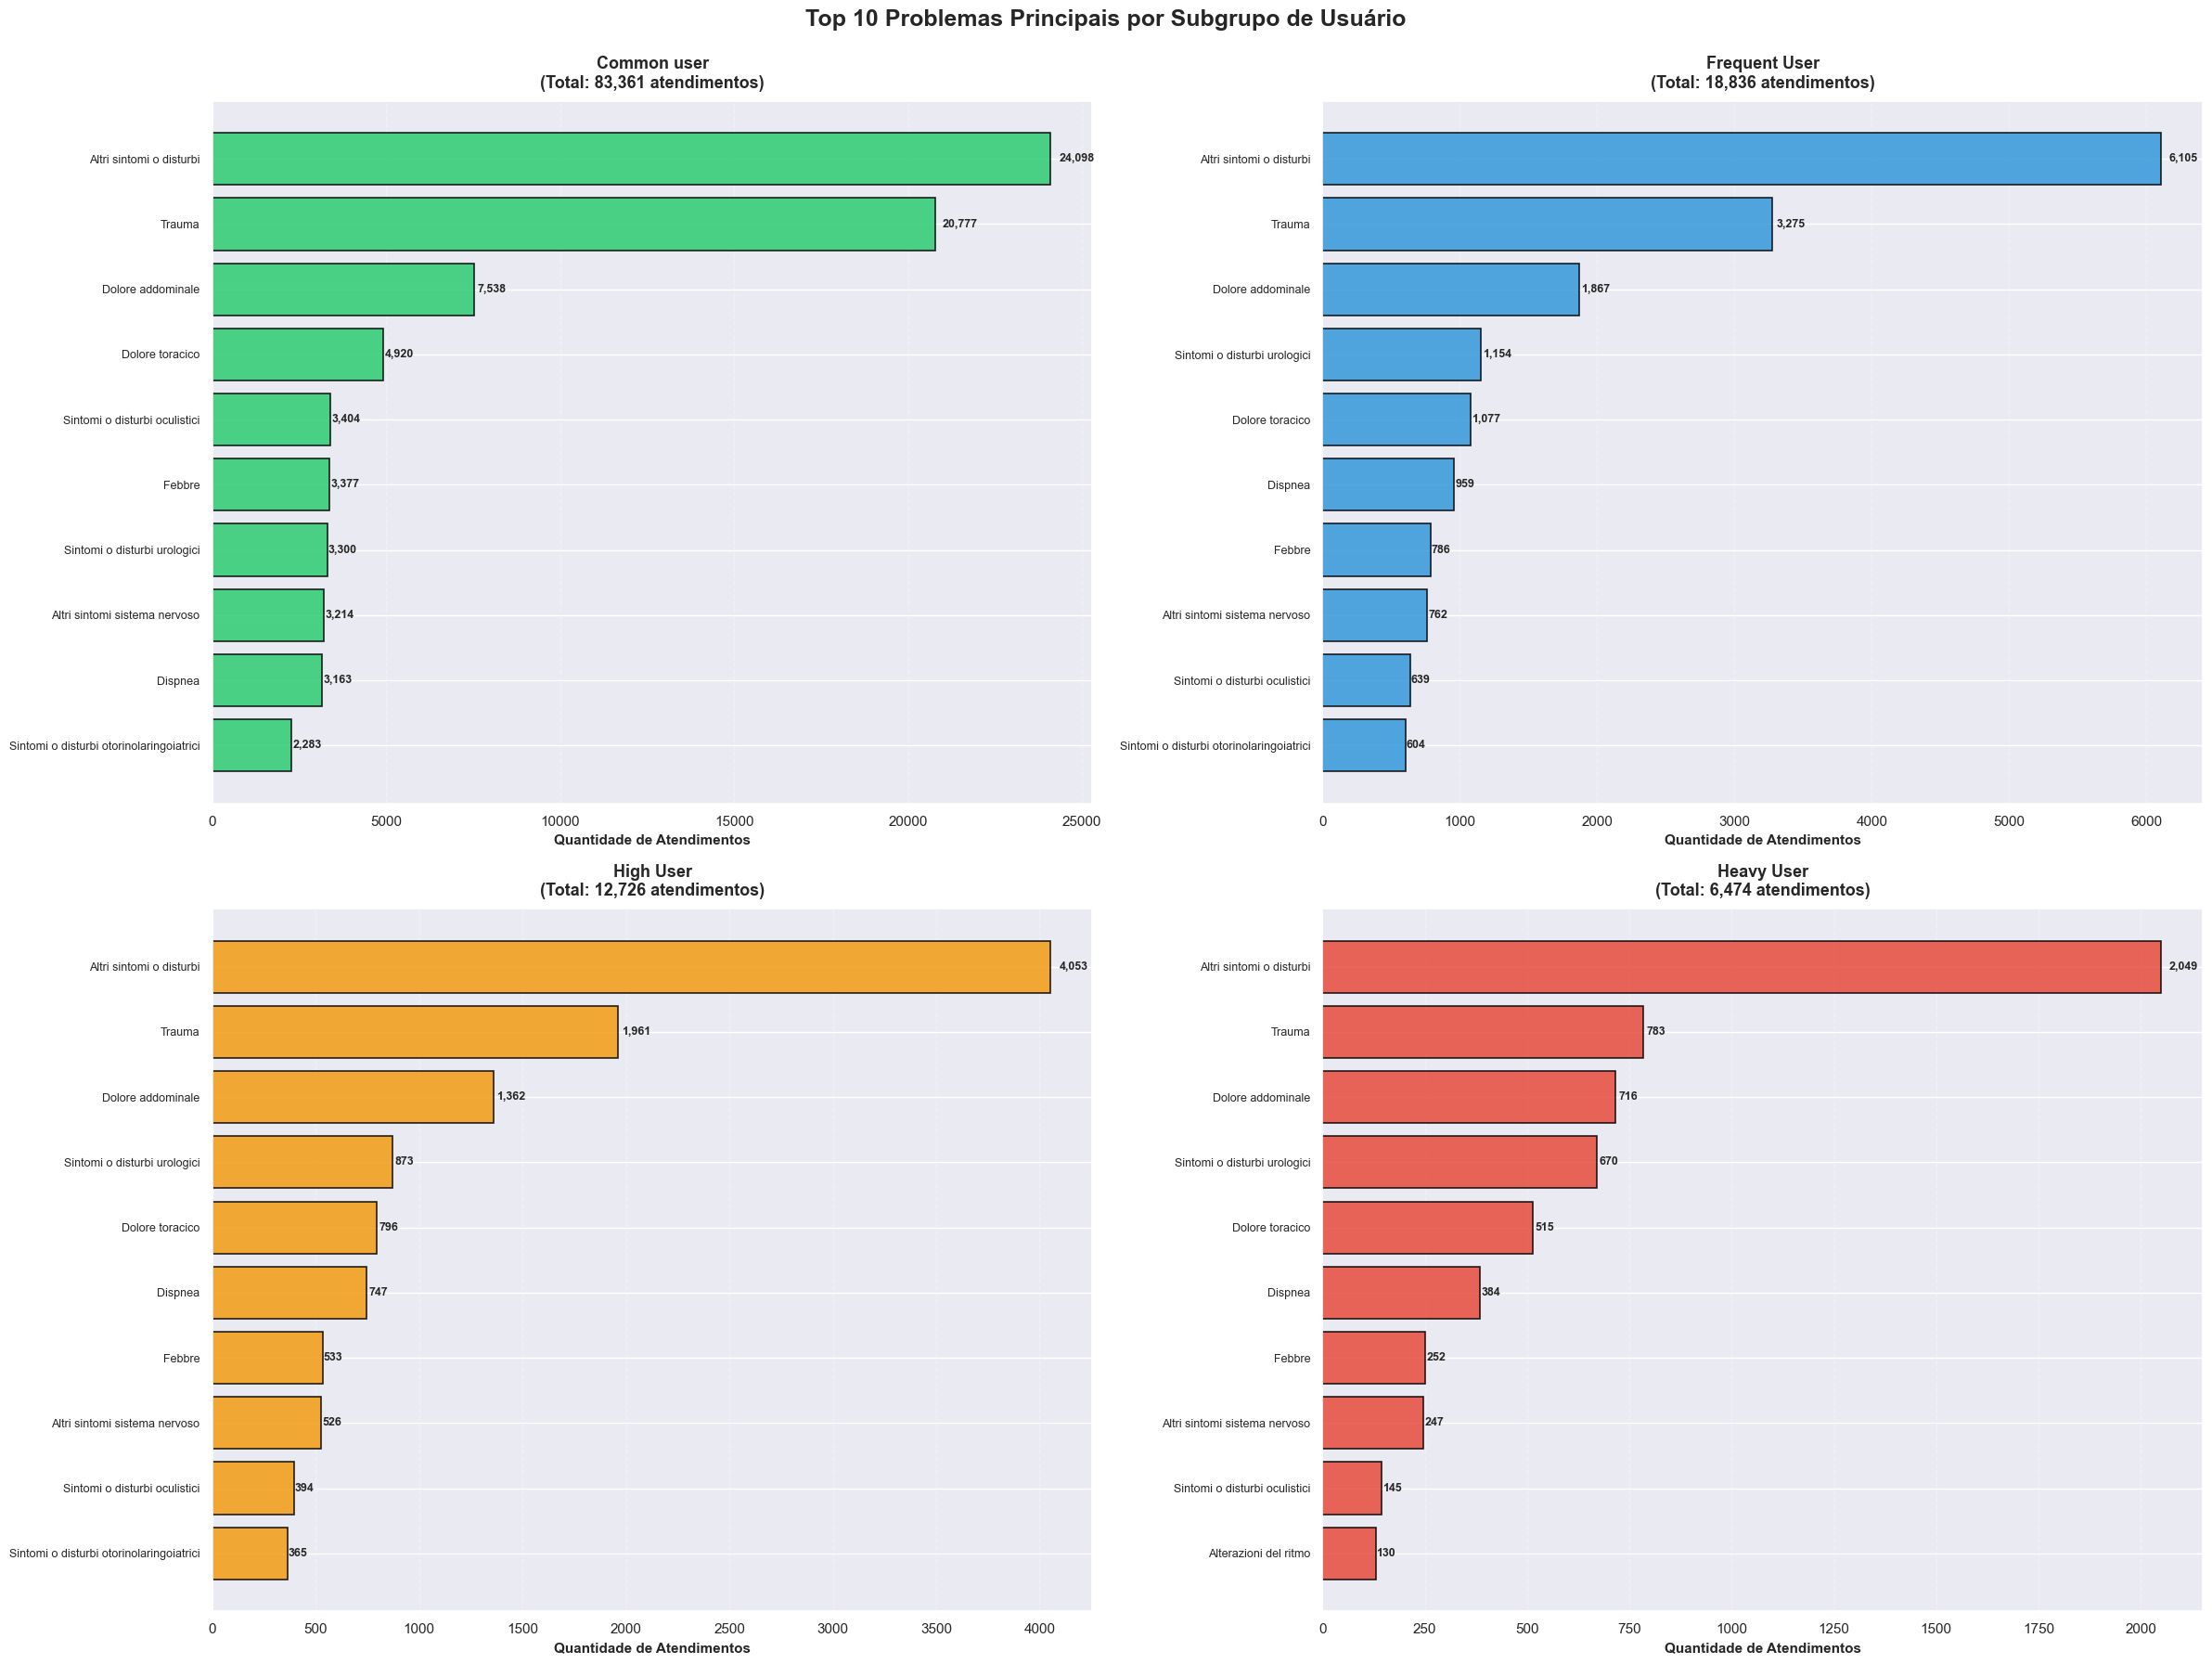

In [243]:
# Criar visualização em grid - Top 10 problemas por subgrupo
fig, axes = plt.subplots(2, 2, figsize=(24, 18))
fig.suptitle('Top 10 Problemas Principais por Subgrupo de Usuário', 
             fontsize=18, fontweight='bold', y=0.995)

cores_problemas = {
    'Common user': '#2ecc71',
    'Frequent User': '#3498db',
    'High User': '#f39c12',
    'Heavy User': '#e74c3c'
}

posicoes = [(0, 0), (0, 1), (1, 0), (1, 1)]

for idx, (subgrupo, pos) in enumerate(zip(ordem_subgrupos, posicoes)):
    ax = axes[pos[0], pos[1]]
    
    # Filtrar dados por subgrupo
    df_sub = df[df['Sottogruppo Pazienti'] == subgrupo]
    top_problemas = df_sub['Problema Principale'].value_counts().head(10).sort_values(ascending=True)
    
    # Criar gráfico de barras horizontais
    bars = ax.barh(
        range(len(top_problemas)), 
        top_problemas.values,
        color=cores_problemas[subgrupo],
        edgecolor='black',
        linewidth=1.2,
        alpha=0.85
    )
    
    # Configurar eixos
    ax.set_yticks(range(len(top_problemas)))
    ax.set_yticklabels(top_problemas.index, fontsize=9)
    ax.set_xlabel('Quantidade de Atendimentos', fontsize=11, fontweight='bold')
    ax.set_title(f'{subgrupo}\n(Total: {len(df_sub):,} atendimentos)', 
                 fontsize=13, fontweight='bold', pad=10)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Adicionar valores nas barras
    for i, v in enumerate(top_problemas.values):
        ax.text(v + (v * 0.01), i, f'{v:,}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [244]:
# Análise comparativa - Top 5 problemas entre subgrupos
print("\n" + "="*120)
print("ANÁLISE COMPARATIVA - TOP 5 PROBLEMAS POR SUBGRUPO")
print("="*120 + "\n")

tabela_comparativa_problemas = pd.DataFrame()

for subgrupo in ordem_subgrupos:
    df_sub = df[df['Sottogruppo Pazienti'] == subgrupo]
    top_problemas = df_sub['Problema Principale'].value_counts().head(5)
    
    # Calcular percentuais
    percentuais = (top_problemas / len(df_sub) * 100).round(2)
    
    # Criar DataFrame temporário
    temp_df = pd.DataFrame({
        'Subgrupo': subgrupo,
        'Posição': range(1, 6),
        'Problema': top_problemas.index,
        'Quantidade': top_problemas.values,
        'Percentual (%)': percentuais.values
    })
    
    tabela_comparativa_problemas = pd.concat([tabela_comparativa_problemas, temp_df], 
                                              ignore_index=True)

display(tabela_comparativa_problemas)


ANÁLISE COMPARATIVA - TOP 5 PROBLEMAS POR SUBGRUPO



,Subgrupo,Posição,Problema,Quantidade,Percentual (%)
0,Common user,1,Altri sintomi o disturbi,24098,28.91
1,Common user,2,Trauma,20777,24.92
2,Common user,3,Dolore addominale,7538,9.04
3,Common user,4,Dolore toracico,4920,5.90
4,Common user,5,Sintomi o disturbi oculistici,3404,4.08
5,Frequent User,1,Altri sintomi o disturbi,6105,32.41
6,Frequent User,2,Trauma,3275,17.39
7,Frequent User,3,Dolore addominale,1867,9.91
8,Frequent User,4,Sintomi o disturbi urologici,1154,6.13
9,Frequent User,5,Dolore toracico,1077,5.72


## 3.5. Relação Subgrupo / Número Total de Pacientes

In [245]:
# Análise de pacientes únicos por subgrupo
pacientes_por_subgrupo = df.groupby('Sottogruppo Pazienti')['Paziente'].nunique()
pacientes_por_subgrupo = pacientes_por_subgrupo.reindex(ordem_subgrupos)

# Total de pacientes únicos
total_pacientes = df['Paziente'].nunique()

# Calcular percentuais
percentuais_pacientes = (pacientes_por_subgrupo / total_pacientes * 100).round(2)

# Criar tabela resumo
resumo_pacientes = pd.DataFrame({
    'Subgrupo': ordem_subgrupos,
    'Pacientes Únicos': pacientes_por_subgrupo.values,
    'Percentual (%)': percentuais_pacientes.values,
    'Total Atendimentos': [len(df[df['Sottogruppo Pazienti'] == sub]) for sub in ordem_subgrupos],
    'Média Atend/Paciente': [(len(df[df['Sottogruppo Pazienti'] == sub]) / 
                               df[df['Sottogruppo Pazienti'] == sub]['Paziente'].nunique()) # TODO: Divisão por zero 
                              for sub in ordem_subgrupos]
})

print("\n" + "="*110)
print("RELAÇÃO SUBGRUPO / NÚMERO TOTAL DE PACIENTES")
print("="*110)
display(resumo_pacientes)
print("\n" + "="*110)
print(f"📊 TOTAL GERAL DE PACIENTES ÚNICOS: {total_pacientes:,}")
print(f"📊 TOTAL GERAL DE ATENDIMENTOS: {len(df):,}")
print(f"📊 MÉDIA GERAL ATENDIMENTOS/PACIENTE: {(len(df) / total_pacientes):.2f}")
print("="*110)


RELAÇÃO SUBGRUPO / NÚMERO TOTAL DE PACIENTES


,Subgrupo,Pacientes Únicos,Percentual (%),Total Atendimentos,Média Atend/Paciente
0,Common user,57912,89.68,83361,1.44
1,Frequent User,4345,6.73,18836,4.34
2,High User,1843,2.85,12726,6.91
3,Heavy User,476,0.74,6474,13.60



📊 TOTAL GERAL DE PACIENTES ÚNICOS: 64,576
📊 TOTAL GERAL DE ATENDIMENTOS: 121,397
📊 MÉDIA GERAL ATENDIMENTOS/PACIENTE: 1.88


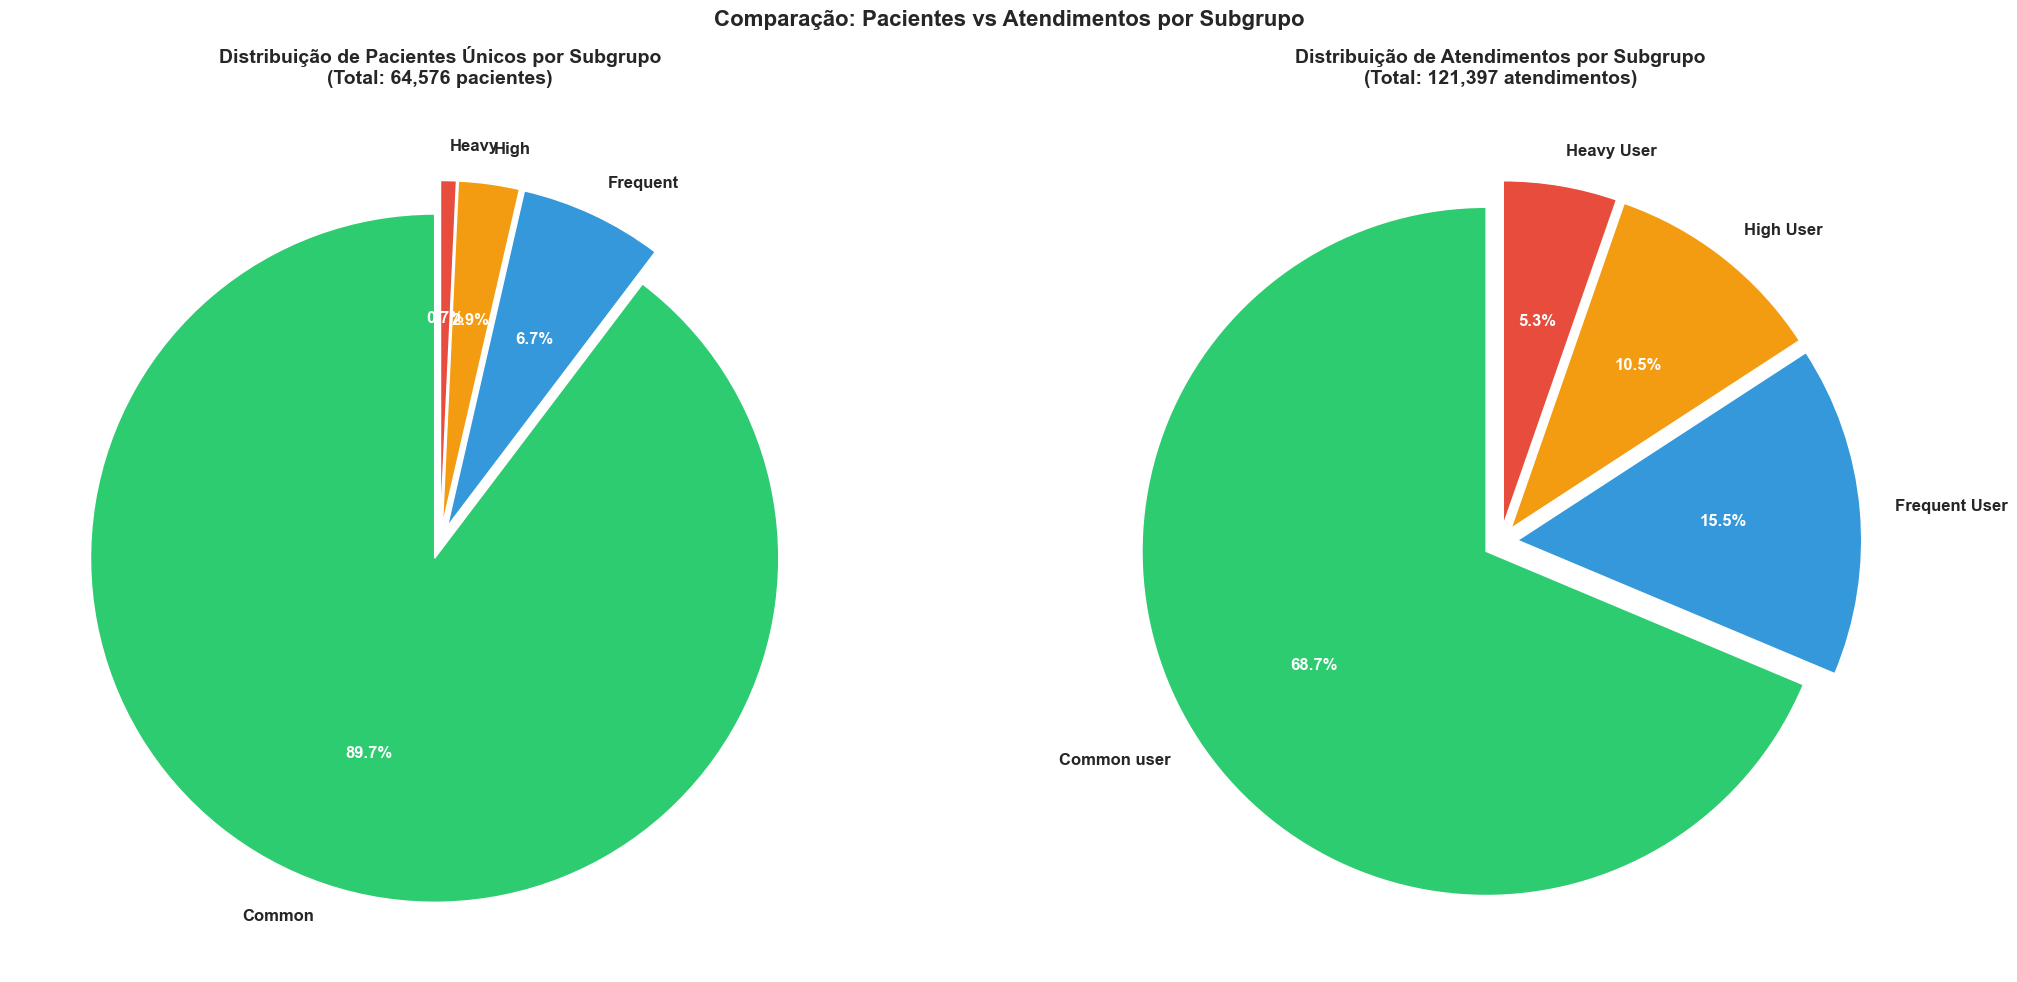

In [246]:
# Gráfico de pizza - Distribuição de pacientes únicos por subgrupo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))

# Pizza 1: Pacientes únicos
cores_pizza = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
wedges1, texts1, autotexts1 = ax1.pie(
    pacientes_por_subgrupo.values, 
    labels=['Common', 'Frequent', 'High', 'Heavy'], # TODO ALTERAÇÃO PARA NÃO TRUNCAR AS LABELS  - labels=ordem_subgrupos,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores_pizza,
    textprops={'fontsize': 12, 'weight': 'bold'},
    explode=(0.05, 0.05, 0.05, 0.05)
)

for autotext in autotexts1:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

ax1.set_title(f'Distribuição de Pacientes Únicos por Subgrupo\n(Total: {total_pacientes:,} pacientes)', 
              fontsize=14, fontweight='bold', pad=20)

# Pizza 2: Total de atendimentos
total_atend_por_sub = [len(df[df['Sottogruppo Pazienti'] == sub]) for sub in ordem_subgrupos]
wedges2, texts2, autotexts2 = ax2.pie(
    total_atend_por_sub, 
    labels=ordem_subgrupos,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores_pizza,
    textprops={'fontsize': 12, 'weight': 'bold'},
    explode=(0.05, 0.05, 0.05, 0.05)
)

for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

ax2.set_title(f'Distribuição de Atendimentos por Subgrupo\n(Total: {len(df):,} atendimentos)', 
              fontsize=14, fontweight='bold', pad=20)

plt.suptitle('Comparação: Pacientes vs Atendimentos por Subgrupo', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

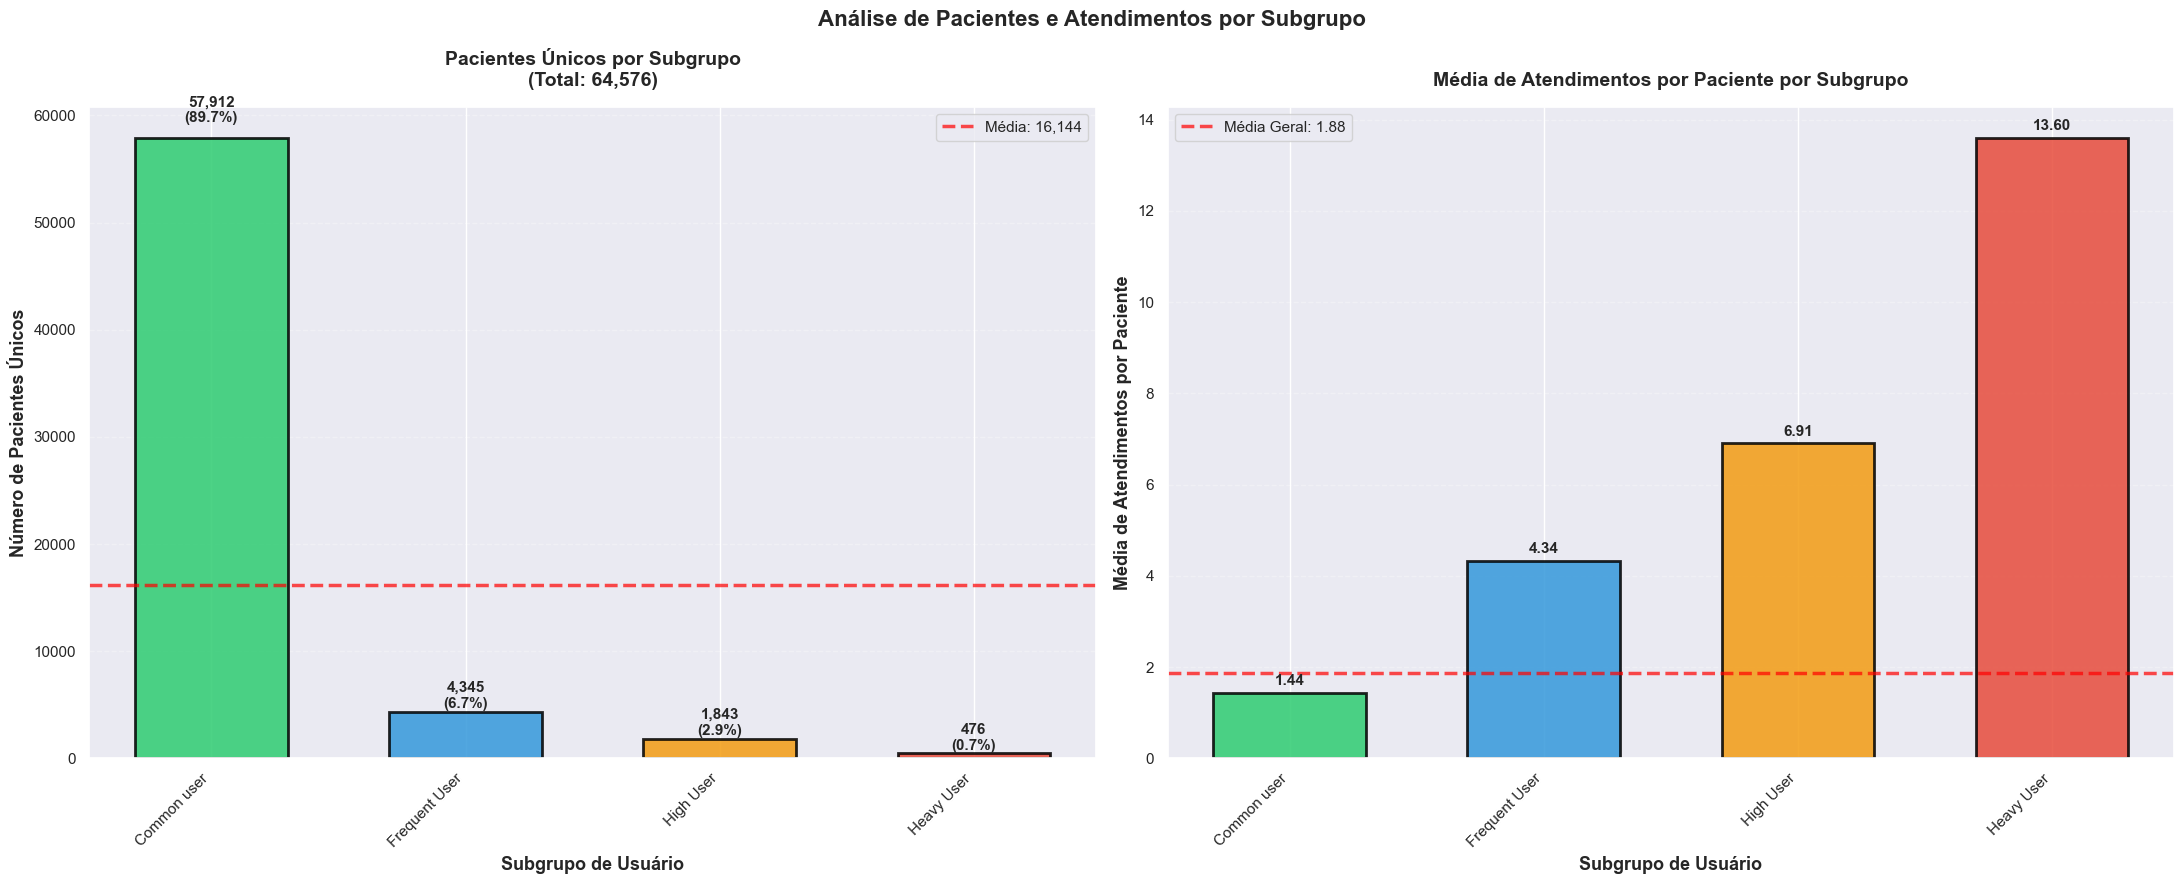

In [247]:
# Gráfico de barras comparativo - Pacientes vs Atendimentos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 9))

# Gráfico 1: Pacientes únicos
bars1 = ax1.bar(range(len(ordem_subgrupos)), pacientes_por_subgrupo.values,
                color=cores_pizza, edgecolor='black', linewidth=2, alpha=0.85, width=0.6)

ax1.set_xlabel('Subgrupo de Usuário', fontsize=13, fontweight='bold')
ax1.set_ylabel('Número de Pacientes Únicos', fontsize=13, fontweight='bold')
ax1.set_title(f'Pacientes Únicos por Subgrupo\n(Total: {total_pacientes:,})', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(range(len(ordem_subgrupos)))
ax1.set_xticklabels(ordem_subgrupos, rotation=45, ha='right', fontsize=11)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Adicionar valores nas barras
for i, (bar, valor, perc) in enumerate(zip(bars1, pacientes_por_subgrupo.values, 
                                             percentuais_pacientes.values)):
    ax1.text(bar.get_x() + bar.get_width()/2, valor + (valor * 0.02), 
             f'{valor:,}\n({perc:.1f}%)', ha='center', va='bottom', 
             fontsize=11, fontweight='bold')

# Linha de média
media_pac = pacientes_por_subgrupo.mean()
ax1.axhline(y=media_pac, color='red', linestyle='--', linewidth=2.5, 
            label=f'Média: {media_pac:,.0f}', alpha=0.7)
ax1.legend(fontsize=11)

# Gráfico 2: Média de atendimentos por paciente
medias_atend = resumo_pacientes['Média Atend/Paciente'].values
bars2 = ax2.bar(range(len(ordem_subgrupos)), medias_atend,
                color=cores_pizza, edgecolor='black', linewidth=2, alpha=0.85, width=0.6)

ax2.set_xlabel('Subgrupo de Usuário', fontsize=13, fontweight='bold')
ax2.set_ylabel('Média de Atendimentos por Paciente', fontsize=13, fontweight='bold')
ax2.set_title('Média de Atendimentos por Paciente por Subgrupo', 
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xticks(range(len(ordem_subgrupos)))
ax2.set_xticklabels(ordem_subgrupos, rotation=45, ha='right', fontsize=11)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Adicionar valores nas barras
for i, (bar, valor) in enumerate(zip(bars2, medias_atend)):
    ax2.text(bar.get_x() + bar.get_width()/2, valor + 0.1, 
             f'{valor:.2f}', ha='center', va='bottom', 
             fontsize=11, fontweight='bold')

# Linha de média
media_geral_atend = len(df) / total_pacientes
ax2.axhline(y=media_geral_atend, color='red', linestyle='--', linewidth=2.5, 
            label=f'Média Geral: {media_geral_atend:.2f}', alpha=0.7)
ax2.legend(fontsize=11)

plt.suptitle('Análise de Pacientes e Atendimentos por Subgrupo', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [248]:
# Insights finais
print("\n" + "="*110)
print("💡 INSIGHTS PRINCIPAIS DA ANÁLISE POR SUBGRUPOS")
print("="*110)

# 1. Subgrupo com mais pacientes
subgrupo_mais_pac = resumo_pacientes.loc[resumo_pacientes['Pacientes Únicos'].idxmax()]
print(f"\n1️⃣ SUBGRUPO COM MAIS PACIENTES:")
print(f"   • {subgrupo_mais_pac['Subgrupo']}: {subgrupo_mais_pac['Pacientes Únicos']:,} pacientes ({subgrupo_mais_pac['Percentual (%)']:.1f}%)")

# 2. Subgrupo com maior média de atendimentos/paciente
subgrupo_maior_media = resumo_pacientes.loc[resumo_pacientes['Média Atend/Paciente'].idxmax()]
print(f"\n2️⃣ SUBGRUPO COM MAIOR MÉDIA DE ATENDIMENTOS/PACIENTE:")
print(f"   • {subgrupo_maior_media['Subgrupo']}: {subgrupo_maior_media['Média Atend/Paciente']:.2f} atendimentos/paciente")

# 3. Comparação Heavy Users
heavy_users = resumo_pacientes[resumo_pacientes['Subgrupo'] == 'Heavy User'].iloc[0]
print(f"\n3️⃣ ANÁLISE DOS HEAVY USERS:")
print(f"   • Representam {heavy_users['Percentual (%)']:.1f}% dos pacientes ({heavy_users['Pacientes Únicos']:,} pessoas)")
print(f"   • Geraram {heavy_users['Total Atendimentos']:,} atendimentos")
print(f"   • Percentual dos atendimentos totais: {(heavy_users['Total Atendimentos'] / len(df) * 100):.1f}%")

# 4. Eficiência do sistema
common_users = resumo_pacientes[resumo_pacientes['Subgrupo'] == 'Common user'].iloc[0]
print(f"\n4️⃣ COMMON USERS (MAIORIA):")
print(f"   • Representam {common_users['Percentual (%)']:.1f}% dos pacientes ({common_users['Pacientes Únicos']:,} pessoas)")
print(f"   • Geraram {common_users['Total Atendimentos']:,} atendimentos")
print(f"   • Média de {common_users['Média Atend/Paciente']:.2f} atendimentos/paciente")

print("\n" + "="*110)


💡 INSIGHTS PRINCIPAIS DA ANÁLISE POR SUBGRUPOS

1️⃣ SUBGRUPO COM MAIS PACIENTES:
   • Common user: 57,912 pacientes (89.7%)

2️⃣ SUBGRUPO COM MAIOR MÉDIA DE ATENDIMENTOS/PACIENTE:
   • Heavy User: 13.60 atendimentos/paciente

3️⃣ ANÁLISE DOS HEAVY USERS:
   • Representam 0.7% dos pacientes (476 pessoas)
   • Geraram 6,474 atendimentos
   • Percentual dos atendimentos totais: 5.3%

4️⃣ COMMON USERS (MAIORIA):
   • Representam 89.7% dos pacientes (57,912 pessoas)
   • Geraram 83,361 atendimentos
   • Média de 1.44 atendimentos/paciente

